In [1]:
import pandas as pd
import numpy as np

import json
import random

import matplotlib.pyplot as plt
from matplotlib.pyplot import Text
from matplotlib.patches import Patch
import seaborn as sns

from src.stats import bootstrap_pvalue
from statsmodels.stats.multitest import multipletests
from itertools import combinations
from scipy import stats

In [2]:
dataset = pd.read_csv("./data/dataset_final.tsv", sep="\t")

public_case_ids = [x for x in dataset.case_id if "public" in x]
private_case_ids = [x for x in dataset.case_id if "private" in x]

public_dataset = dataset[dataset.case_id.str.contains("public")]
private_dataset = dataset[dataset.case_id.str.contains("private")]

len(public_case_ids), len(private_case_ids), public_dataset.shape, private_dataset.shape

(100, 40, (100, 18), (40, 18))

# Load Data

### Vignette + MCQ/MCQ_all/FRQ

In [3]:
vignette_res = json.load(open("./results/final_results_vignette.json","r"))

mcq_gpt3 = []
mcq_gpt4 = []
mcqall_gpt3 = []
mcqall_gpt4 = []
mcqall_gpt3_multiple = []
mcqall_gpt4_multiple = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in public_case_ids:
    mcq_gpt3.append(vignette_res["gpt-3.5"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(vignette_res["gpt-4"][case]["mcq_4"]["autoeval_raw"])
    
    mcqall_gpt3.append([x[0] for x in vignette_res["gpt-3.5"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4.append([x[0] for x in vignette_res["gpt-4"][case]["mcq_many"]["autoeval_raw"]])

    mcqall_gpt3_multiple.append([max(x) for x in vignette_res["gpt-3.5"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4_multiple.append([max(x) for x in vignette_res["gpt-4"][case]["mcq_many"]["autoeval_raw"]])
    
    frq_gpt3.append([x[0] for x in vignette_res["gpt-3.5"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in vignette_res["gpt-4"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in vignette_res["gpt-3.5"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in vignette_res["gpt-4"][case]["frq"]["autoeval_raw"]])
    
vignette_mcq_public_gpt3_df = pd.DataFrame(mcq_gpt3).T
vignette_mcq_public_gpt3_df.columns = public_case_ids

vignette_mcqall_public_gpt3_df = pd.DataFrame(mcqall_gpt3).T
vignette_mcqall_public_gpt3_df.columns = public_case_ids
vignette_mcqall_public_gpt3_df_multiple = pd.DataFrame(mcqall_gpt3_multiple).T
vignette_mcqall_public_gpt3_df_multiple.columns = public_case_ids

vignette_frq_public_gpt3_df = pd.DataFrame(frq_gpt3).T
vignette_frq_public_gpt3_df.columns = public_case_ids
vignette_frq_public_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
vignette_frq_public_gpt3_df_multiple.columns = public_case_ids

vignette_mcq_public_gpt4_df = pd.DataFrame(mcq_gpt4).T
vignette_mcq_public_gpt4_df.columns = public_case_ids

vignette_mcqall_public_gpt4_df = pd.DataFrame(mcqall_gpt4).T
vignette_mcqall_public_gpt4_df.columns = public_case_ids
vignette_mcqall_public_gpt4_df_multiple = pd.DataFrame(mcqall_gpt4_multiple).T
vignette_mcqall_public_gpt4_df_multiple.columns = public_case_ids

vignette_frq_public_gpt4_df = pd.DataFrame(frq_gpt4).T
vignette_frq_public_gpt4_df.columns = public_case_ids
vignette_frq_public_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
vignette_frq_public_gpt4_df_multiple.columns = public_case_ids

In [4]:
vignette_res = json.load(open("./results/final_results_vignette.json","r"))

mcq_gpt3 = []
mcq_gpt4 = []
mcqall_gpt3 = []
mcqall_gpt4 = []
mcqall_gpt3_multiple = []
mcqall_gpt4_multiple = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in private_case_ids:
    mcq_gpt3.append(vignette_res["gpt-3.5"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(vignette_res["gpt-4"][case]["mcq_4"]["autoeval_raw"])
    
    mcqall_gpt3.append([x[0] for x in vignette_res["gpt-3.5"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4.append([x[0] for x in vignette_res["gpt-4"][case]["mcq_many"]["autoeval_raw"]])

    mcqall_gpt3_multiple.append([max(x) for x in vignette_res["gpt-3.5"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4_multiple.append([max(x) for x in vignette_res["gpt-4"][case]["mcq_many"]["autoeval_raw"]])
    
    frq_gpt3.append([x[0] for x in vignette_res["gpt-3.5"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in vignette_res["gpt-4"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in vignette_res["gpt-3.5"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in vignette_res["gpt-4"][case]["frq"]["autoeval_raw"]])
    
vignette_mcq_private_gpt3_df = pd.DataFrame(mcq_gpt3).T
vignette_mcq_private_gpt3_df.columns = private_case_ids

vignette_mcqall_private_gpt3_df = pd.DataFrame(mcqall_gpt3).T
vignette_mcqall_private_gpt3_df.columns = private_case_ids
vignette_mcqall_private_gpt3_df_multiple = pd.DataFrame(mcqall_gpt3_multiple).T
vignette_mcqall_private_gpt3_df_multiple.columns = private_case_ids

vignette_frq_private_gpt3_df = pd.DataFrame(frq_gpt3).T
vignette_frq_private_gpt3_df.columns = private_case_ids
vignette_frq_private_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
vignette_frq_private_gpt3_df_multiple.columns = private_case_ids

vignette_mcq_private_gpt4_df = pd.DataFrame(mcq_gpt4).T
vignette_mcq_private_gpt4_df.columns = private_case_ids

vignette_mcqall_private_gpt4_df = pd.DataFrame(mcqall_gpt4).T
vignette_mcqall_private_gpt4_df.columns = private_case_ids
vignette_mcqall_private_gpt4_df_multiple = pd.DataFrame(mcqall_gpt4_multiple).T
vignette_mcqall_private_gpt4_df_multiple.columns = private_case_ids

vignette_frq_private_gpt4_df = pd.DataFrame(frq_gpt4).T
vignette_frq_private_gpt4_df.columns = private_case_ids
vignette_frq_private_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
vignette_frq_private_gpt4_df_multiple.columns = private_case_ids

### Conversations

In [5]:
convo_res = json.load(open("./results/final_results_conversation.json","r"))

#### Multi-turn + MCQ/MCQ_all/FRQ

In [6]:
mcq_gpt3 = []
mcq_gpt4 = []
mcqall_gpt3 = []
mcqall_gpt4 = []
mcqall_gpt3_multiple = []
mcqall_gpt4_multiple = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in public_case_ids:
    mcq_gpt3.append(convo_res["gpt-3.5"]["multi-turn"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(convo_res["gpt-4"]["multi-turn"][case]["mcq_4"]["autoeval_raw"])
    
    mcqall_gpt3.append([x[0] for x in convo_res["gpt-3.5"]["multi-turn"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4.append([x[0] for x in convo_res["gpt-4"]["multi-turn"][case]["mcq_many"]["autoeval_raw"]])

    mcqall_gpt3_multiple.append([max(x) for x in convo_res["gpt-3.5"]["multi-turn"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4_multiple.append([max(x) for x in convo_res["gpt-4"]["multi-turn"][case]["mcq_many"]["autoeval_raw"]])
    
    frq_gpt3.append([x[0] for x in convo_res["gpt-3.5"]["multi-turn"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in convo_res["gpt-4"]["multi-turn"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in convo_res["gpt-3.5"]["multi-turn"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in convo_res["gpt-4"]["multi-turn"][case]["frq"]["autoeval_raw"]])
    
convo_mcq_public_gpt3_df = pd.DataFrame(mcq_gpt3).T
convo_mcq_public_gpt3_df.columns = public_case_ids

convo_mcqall_public_gpt3_df = pd.DataFrame(mcqall_gpt3).T
convo_mcqall_public_gpt3_df.columns = public_case_ids
convo_mcqall_public_gpt3_df_multiple = pd.DataFrame(mcqall_gpt3_multiple).T
convo_mcqall_public_gpt3_df_multiple.columns = public_case_ids

convo_frq_public_gpt3_df = pd.DataFrame(frq_gpt3).T
convo_frq_public_gpt3_df.columns = public_case_ids
convo_frq_public_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
convo_frq_public_gpt3_df_multiple.columns = public_case_ids

convo_mcq_public_gpt4_df = pd.DataFrame(mcq_gpt4).T
convo_mcq_public_gpt4_df.columns = public_case_ids

convo_mcqall_public_gpt4_df = pd.DataFrame(mcqall_gpt4).T
convo_mcqall_public_gpt4_df.columns = public_case_ids
convo_mcqall_public_gpt4_df_multiple = pd.DataFrame(mcqall_gpt4_multiple).T
convo_mcqall_public_gpt4_df_multiple.columns = public_case_ids

convo_frq_public_gpt4_df = pd.DataFrame(frq_gpt4).T
convo_frq_public_gpt4_df.columns = public_case_ids
convo_frq_public_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
convo_frq_public_gpt4_df_multiple.columns = public_case_ids

In [7]:
mcq_gpt3 = []
mcq_gpt4 = []
mcqall_gpt3 = []
mcqall_gpt4 = []
mcqall_gpt3_multiple = []
mcqall_gpt4_multiple = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in private_case_ids:
    mcq_gpt3.append(convo_res["gpt-3.5"]["multi-turn"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(convo_res["gpt-4"]["multi-turn"][case]["mcq_4"]["autoeval_raw"])
    
    mcqall_gpt3.append([x[0] for x in convo_res["gpt-3.5"]["multi-turn"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4.append([x[0] for x in convo_res["gpt-4"]["multi-turn"][case]["mcq_many"]["autoeval_raw"]])

    mcqall_gpt3_multiple.append([max(x) for x in convo_res["gpt-3.5"]["multi-turn"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4_multiple.append([max(x) for x in convo_res["gpt-4"]["multi-turn"][case]["mcq_many"]["autoeval_raw"]])
    
    frq_gpt3.append([x[0] for x in convo_res["gpt-3.5"]["multi-turn"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in convo_res["gpt-4"]["multi-turn"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in convo_res["gpt-3.5"]["multi-turn"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in convo_res["gpt-4"]["multi-turn"][case]["frq"]["autoeval_raw"]])
    
convo_mcq_private_gpt3_df = pd.DataFrame(mcq_gpt3).T
convo_mcq_private_gpt3_df.columns = private_case_ids

convo_mcqall_private_gpt3_df = pd.DataFrame(mcqall_gpt3).T
convo_mcqall_private_gpt3_df.columns = private_case_ids
convo_mcqall_private_gpt3_df_multiple = pd.DataFrame(mcqall_gpt3_multiple).T
convo_mcqall_private_gpt3_df_multiple.columns = private_case_ids

convo_frq_private_gpt3_df = pd.DataFrame(frq_gpt3).T
convo_frq_private_gpt3_df.columns = private_case_ids
convo_frq_private_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
convo_frq_private_gpt3_df_multiple.columns = private_case_ids

convo_mcq_private_gpt4_df = pd.DataFrame(mcq_gpt4).T
convo_mcq_private_gpt4_df.columns = private_case_ids

convo_mcqall_private_gpt4_df = pd.DataFrame(mcqall_gpt4).T
convo_mcqall_private_gpt4_df.columns = private_case_ids
convo_mcqall_private_gpt4_df_multiple = pd.DataFrame(mcqall_gpt4_multiple).T
convo_mcqall_private_gpt4_df_multiple.columns = private_case_ids

convo_frq_private_gpt4_df = pd.DataFrame(frq_gpt4).T
convo_frq_private_gpt4_df.columns = private_case_ids
convo_frq_private_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
convo_frq_private_gpt4_df_multiple.columns = private_case_ids

#### Single-turn + MCQ/FRQ

In [8]:
mcq_gpt3 = []
mcq_gpt4 = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in public_case_ids:
    mcq_gpt3.append(convo_res["gpt-3.5"]["single-turn"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(convo_res["gpt-4"]["single-turn"][case]["mcq_4"]["autoeval_raw"])
        
    frq_gpt3.append([x[0] for x in convo_res["gpt-3.5"]["single-turn"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in convo_res["gpt-4"]["single-turn"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in convo_res["gpt-3.5"]["single-turn"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in convo_res["gpt-4"]["single-turn"][case]["frq"]["autoeval_raw"]])
    
fd_mcq_public_gpt3_df = pd.DataFrame(mcq_gpt3).T
fd_mcq_public_gpt3_df.columns = public_case_ids

fd_frq_public_gpt3_df = pd.DataFrame(frq_gpt3).T
fd_frq_public_gpt3_df.columns = public_case_ids
fd_frq_public_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
fd_frq_public_gpt3_df_multiple.columns = public_case_ids

fd_mcq_public_gpt4_df = pd.DataFrame(mcq_gpt4).T
fd_mcq_public_gpt4_df.columns = public_case_ids

fd_frq_public_gpt4_df = pd.DataFrame(frq_gpt4).T
fd_frq_public_gpt4_df.columns = public_case_ids
fd_frq_public_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
fd_frq_public_gpt4_df_multiple.columns = public_case_ids

In [9]:
mcq_gpt3 = []
mcq_gpt4 = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in private_case_ids:
    mcq_gpt3.append(convo_res["gpt-3.5"]["single-turn"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(convo_res["gpt-4"]["single-turn"][case]["mcq_4"]["autoeval_raw"])
    
    frq_gpt3.append([x[0] for x in convo_res["gpt-3.5"]["single-turn"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in convo_res["gpt-4"]["single-turn"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in convo_res["gpt-3.5"]["single-turn"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in convo_res["gpt-4"]["single-turn"][case]["frq"]["autoeval_raw"]])
    
fd_mcq_private_gpt3_df = pd.DataFrame(mcq_gpt3).T
fd_mcq_private_gpt3_df.columns = private_case_ids

fd_frq_private_gpt3_df = pd.DataFrame(frq_gpt3).T
fd_frq_private_gpt3_df.columns = private_case_ids
fd_frq_private_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
fd_frq_private_gpt3_df_multiple.columns = private_case_ids

fd_mcq_private_gpt4_df = pd.DataFrame(mcq_gpt4).T
fd_mcq_private_gpt4_df.columns = private_case_ids

fd_frq_private_gpt4_df = pd.DataFrame(frq_gpt4).T
fd_frq_private_gpt4_df.columns = private_case_ids
fd_frq_private_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
fd_frq_private_gpt4_df_multiple.columns = private_case_ids

#### Summarized + MCQ/FRQ

In [10]:
mcq_gpt3 = []
mcq_gpt4 = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in public_case_ids:
    mcq_gpt3.append(convo_res["gpt-3.5"]["summarized"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(convo_res["gpt-4"]["summarized"][case]["mcq_4"]["autoeval_raw"])
        
    frq_gpt3.append([x[0] for x in convo_res["gpt-3.5"]["summarized"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in convo_res["gpt-4"]["summarized"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in convo_res["gpt-3.5"]["summarized"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in convo_res["gpt-4"]["summarized"][case]["frq"]["autoeval_raw"]])
    
summarisedconvoPEmcq_public_gpt3_df = pd.DataFrame(mcq_gpt3).T
summarisedconvoPEmcq_public_gpt3_df.columns = public_case_ids

summarisedconvoPEfrq_public_gpt3_df = pd.DataFrame(frq_gpt3).T
summarisedconvoPEfrq_public_gpt3_df.columns = public_case_ids
summarisedconvoPEfrq_public_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
summarisedconvoPEfrq_public_gpt3_df_multiple.columns = public_case_ids

summarisedconvoPEmcq_public_gpt4_df = pd.DataFrame(mcq_gpt4).T
summarisedconvoPEmcq_public_gpt4_df.columns = public_case_ids

summarisedconvoPEfrq_public_gpt4_df = pd.DataFrame(frq_gpt4).T
summarisedconvoPEfrq_public_gpt4_df.columns = public_case_ids
summarisedconvoPEfrq_public_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
summarisedconvoPEfrq_public_gpt4_df_multiple.columns = public_case_ids

In [11]:
mcq_gpt3 = []
mcq_gpt4 = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in private_case_ids:
    mcq_gpt3.append(convo_res["gpt-3.5"]["summarized"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(convo_res["gpt-4"]["summarized"][case]["mcq_4"]["autoeval_raw"])
    
    frq_gpt3.append([x[0] for x in convo_res["gpt-3.5"]["summarized"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in convo_res["gpt-4"]["summarized"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in convo_res["gpt-3.5"]["summarized"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in convo_res["gpt-4"]["summarized"][case]["frq"]["autoeval_raw"]])
    
summarisedconvoPEmcq_private_gpt3_df = pd.DataFrame(mcq_gpt3).T
summarisedconvoPEmcq_private_gpt3_df.columns = private_case_ids

summarisedconvoPEfrq_private_gpt3_df = pd.DataFrame(frq_gpt3).T
summarisedconvoPEfrq_private_gpt3_df.columns = private_case_ids
summarisedconvoPEfrq_private_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
summarisedconvoPEfrq_private_gpt3_df_multiple.columns = private_case_ids

summarisedconvoPEmcq_private_gpt4_df = pd.DataFrame(mcq_gpt4).T
summarisedconvoPEmcq_private_gpt4_df.columns = private_case_ids

summarisedconvoPEfrq_private_gpt4_df = pd.DataFrame(frq_gpt4).T
summarisedconvoPEfrq_private_gpt4_df.columns = private_case_ids
summarisedconvoPEfrq_private_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
summarisedconvoPEfrq_private_gpt4_df_multiple.columns = private_case_ids

#### OnlyPE + MCQ/FRQ

In [12]:
mcq_gpt3 = []
mcq_gpt4 = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in public_case_ids:
    mcq_gpt3.append(convo_res["gpt-3.5"]["onlyPE"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(convo_res["gpt-4"]["onlyPE"][case]["mcq_4"]["autoeval_raw"])
        
    frq_gpt3.append([x[0] for x in convo_res["gpt-3.5"]["onlyPE"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in convo_res["gpt-4"]["onlyPE"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in convo_res["gpt-3.5"]["onlyPE"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in convo_res["gpt-4"]["onlyPE"][case]["frq"]["autoeval_raw"]])
    
agesexpemcq_public_gpt3_df = pd.DataFrame(mcq_gpt3).T
agesexpemcq_public_gpt3_df.columns = public_case_ids

agesexpefrq_public_gpt3_df = pd.DataFrame(frq_gpt3).T
agesexpefrq_public_gpt3_df.columns = public_case_ids
agesexpefrq_public_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
agesexpefrq_public_gpt3_df_multiple.columns = public_case_ids

agesexpemcq_public_gpt4_df = pd.DataFrame(mcq_gpt4).T
agesexpemcq_public_gpt4_df.columns = public_case_ids

agesexpefrq_public_gpt4_df = pd.DataFrame(frq_gpt4).T
agesexpefrq_public_gpt4_df.columns = public_case_ids
agesexpefrq_public_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
agesexpefrq_public_gpt4_df_multiple.columns = public_case_ids

In [13]:
mcq_gpt3 = []
mcq_gpt4 = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in private_case_ids:
    mcq_gpt3.append(convo_res["gpt-3.5"]["onlyPE"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(convo_res["gpt-4"]["onlyPE"][case]["mcq_4"]["autoeval_raw"])
        
    frq_gpt3.append([x[0] for x in convo_res["gpt-3.5"]["onlyPE"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in convo_res["gpt-4"]["onlyPE"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in convo_res["gpt-3.5"]["onlyPE"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in convo_res["gpt-4"]["onlyPE"][case]["frq"]["autoeval_raw"]])
    
agesexpemcq_private_gpt3_df = pd.DataFrame(mcq_gpt3).T
agesexpemcq_private_gpt3_df.columns = private_case_ids

agesexpefrq_private_gpt3_df = pd.DataFrame(frq_gpt3).T
agesexpefrq_private_gpt3_df.columns = private_case_ids
agesexpefrq_private_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
agesexpefrq_private_gpt3_df_multiple.columns = private_case_ids

agesexpemcq_private_gpt4_df = pd.DataFrame(mcq_gpt4).T
agesexpemcq_private_gpt4_df.columns = private_case_ids

agesexpefrq_private_gpt4_df = pd.DataFrame(frq_gpt4).T
agesexpefrq_private_gpt4_df.columns = private_case_ids
agesexpefrq_private_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
agesexpefrq_private_gpt4_df_multiple.columns = private_case_ids

### Conversation without PE

In [14]:
convo_noPE_res = json.load(open("./results/final_results_conversation_withoutPE.json","r"))

In [15]:
mcq_gpt3 = []
mcq_gpt4 = []
mcqall_gpt3 = []
mcqall_gpt4 = []
mcqall_gpt3_multiple = []
mcqall_gpt4_multiple = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in public_case_ids:
    mcq_gpt3.append(convo_noPE_res["gpt-3.5"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(convo_noPE_res["gpt-4"][case]["mcq_4"]["autoeval_raw"])
    
    mcqall_gpt3.append([x[0] for x in convo_noPE_res["gpt-3.5"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4.append([x[0] for x in convo_noPE_res["gpt-4"][case]["mcq_many"]["autoeval_raw"]])

    mcqall_gpt3_multiple.append([max(x) for x in convo_noPE_res["gpt-3.5"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4_multiple.append([max(x) for x in convo_noPE_res["gpt-4"][case]["mcq_many"]["autoeval_raw"]])
    
    frq_gpt3.append([x[0] for x in convo_noPE_res["gpt-3.5"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in convo_noPE_res["gpt-4"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in convo_noPE_res["gpt-3.5"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in convo_noPE_res["gpt-4"][case]["frq"]["autoeval_raw"]])
    
convo_noPE_mcq_public_gpt3_df = pd.DataFrame(mcq_gpt3).T
convo_noPE_mcq_public_gpt3_df.columns = public_case_ids

convo_noPE_mcqall_public_gpt3_df = pd.DataFrame(mcqall_gpt3).T
convo_noPE_mcqall_public_gpt3_df.columns = public_case_ids
convo_noPE_mcqall_public_gpt3_df_multiple = pd.DataFrame(mcqall_gpt3_multiple).T
convo_noPE_mcqall_public_gpt3_df_multiple.columns = public_case_ids

convo_noPE_frq_public_gpt3_df = pd.DataFrame(frq_gpt3).T
convo_noPE_frq_public_gpt3_df.columns = public_case_ids
convo_noPE_frq_public_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
convo_noPE_frq_public_gpt3_df_multiple.columns = public_case_ids

convo_noPE_mcq_public_gpt4_df = pd.DataFrame(mcq_gpt4).T
convo_noPE_mcq_public_gpt4_df.columns = public_case_ids

convo_noPE_mcqall_public_gpt4_df = pd.DataFrame(mcqall_gpt4).T
convo_noPE_mcqall_public_gpt4_df.columns = public_case_ids
convo_noPE_mcqall_public_gpt4_df_multiple = pd.DataFrame(mcqall_gpt4_multiple).T
convo_noPE_mcqall_public_gpt4_df_multiple.columns = public_case_ids

convo_noPE_frq_public_gpt4_df = pd.DataFrame(frq_gpt4).T
convo_noPE_frq_public_gpt4_df.columns = public_case_ids
convo_noPE_frq_public_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
convo_noPE_frq_public_gpt4_df_multiple.columns = public_case_ids

In [16]:
mcq_gpt3 = []
mcq_gpt4 = []
mcqall_gpt3 = []
mcqall_gpt4 = []
mcqall_gpt3_multiple = []
mcqall_gpt4_multiple = []
frq_gpt3 = []
frq_gpt4 = []
frq_gpt3_multiple = []
frq_gpt4_multiple = []

for case in private_case_ids:
    mcq_gpt3.append(convo_noPE_res["gpt-3.5"][case]["mcq_4"]["autoeval_raw"])
    mcq_gpt4.append(convo_noPE_res["gpt-4"][case]["mcq_4"]["autoeval_raw"])
    
    mcqall_gpt3.append([x[0] for x in convo_noPE_res["gpt-3.5"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4.append([x[0] for x in convo_noPE_res["gpt-4"][case]["mcq_many"]["autoeval_raw"]])

    mcqall_gpt3_multiple.append([max(x) for x in convo_noPE_res["gpt-3.5"][case]["mcq_many"]["autoeval_raw"]])
    mcqall_gpt4_multiple.append([max(x) for x in convo_noPE_res["gpt-4"][case]["mcq_many"]["autoeval_raw"]])
    
    frq_gpt3.append([x[0] for x in convo_noPE_res["gpt-3.5"][case]["frq"]["autoeval_raw"]])
    frq_gpt4.append([x[0] for x in convo_noPE_res["gpt-4"][case]["frq"]["autoeval_raw"]])

    frq_gpt3_multiple.append([max(x) for x in convo_noPE_res["gpt-3.5"][case]["frq"]["autoeval_raw"]])
    frq_gpt4_multiple.append([max(x) for x in convo_noPE_res["gpt-4"][case]["frq"]["autoeval_raw"]])
    
convo_noPE_mcq_private_gpt3_df = pd.DataFrame(mcq_gpt3).T
convo_noPE_mcq_private_gpt3_df.columns = private_case_ids

convo_noPE_mcqall_private_gpt3_df = pd.DataFrame(mcqall_gpt3).T
convo_noPE_mcqall_private_gpt3_df.columns = private_case_ids
convo_noPE_mcqall_private_gpt3_df_multiple = pd.DataFrame(mcqall_gpt3_multiple).T
convo_noPE_mcqall_private_gpt3_df_multiple.columns = private_case_ids

convo_noPE_frq_private_gpt3_df = pd.DataFrame(frq_gpt3).T
convo_noPE_frq_private_gpt3_df.columns = private_case_ids
convo_noPE_frq_private_gpt3_df_multiple = pd.DataFrame(frq_gpt3_multiple).T
convo_noPE_frq_private_gpt3_df_multiple.columns = private_case_ids

convo_noPE_mcq_private_gpt4_df = pd.DataFrame(mcq_gpt4).T
convo_noPE_mcq_private_gpt4_df.columns = private_case_ids

convo_noPE_mcqall_private_gpt4_df = pd.DataFrame(mcqall_gpt4).T
convo_noPE_mcqall_private_gpt4_df.columns = private_case_ids
convo_noPE_mcqall_private_gpt4_df_multiple = pd.DataFrame(mcqall_gpt4_multiple).T
convo_noPE_mcqall_private_gpt4_df_multiple.columns = private_case_ids

convo_noPE_frq_private_gpt4_df = pd.DataFrame(frq_gpt4).T
convo_noPE_frq_private_gpt4_df.columns = private_case_ids
convo_noPE_frq_private_gpt4_df_multiple = pd.DataFrame(frq_gpt4_multiple).T
convo_noPE_frq_private_gpt4_df_multiple.columns = private_case_ids

### Top3 multi-turn conversations

In [17]:
top3_gpt3 = []
top3_gpt4 = []

combined_case_ids = public_case_ids + private_case_ids[:10]
for case in combined_case_ids:
    top3_gpt3.append([max(x) for x in convo_res["gpt-3.5"]["multi-turn"][case]["top3"]["autoeval_raw"]])
    top3_gpt4.append([max(x) for x in convo_res["gpt-4"]["multi-turn"][case]["top3"]["autoeval_raw"]])
    
top3convoPE_gpt3_df = pd.DataFrame(top3_gpt3).T
top3convoPE_gpt3_df.columns = combined_case_ids
top3convoPE_gpt3_df.index = [f"trial_{i}" for i in range(10)]

top3convoPE_gpt4_df = pd.DataFrame(top3_gpt4).T
top3convoPE_gpt4_df.columns = combined_case_ids
top3convoPE_gpt4_df.index = [f"trial_{i}" for i in range(10)]

### Case QC (categories)

In [18]:
unique_ans = pd.read_csv("./results/expert_annotations/dermatologist_annotations_case_vignette_qc.tsv",sep="\t")
dmap1 = {"category1":[], "category2":[], "category3":[]}
dmap2 = {}
for i in range(unique_ans.shape[0]):
    if unique_ans.loc[i,"only_possible_answer"]=="Yes":
        dmap1["category1"].append(unique_ans.loc[i,"case_id"])
        dmap2[unique_ans.case_id[i]] = "category1"
    elif unique_ans.loc[i,"only_possible_answer"]=="No":
        if unique_ans.loc[i,"single_most_likely_answer"]=="Yes":
            dmap1["category2"].append(unique_ans.loc[i,"case_id"])
            dmap2[unique_ans.case_id[i]] = "category2"
        else:
            dmap1["category3"].append(unique_ans.loc[i,"case_id"])
            dmap2[unique_ans.case_id[i]] = "category3"
    else:
        print(i)

In [19]:
# To remove conversations which are incomplete (this only happens in GPT-4, no such occurence in GPT-3.5)

count_full = []
res = json.load(open(f"./results/conversations_raw/conversations_gpt4.json","r"))

i=0
for key in res.keys():
    if "public" in key:
        temp=10
        for j in range(10):
            if len(res[key][f"trial_{j}_doctor_responses_with_exam"])<=3:
                
                fd_mcq_public_gpt4_df.iloc[j,i] = 0
                fd_frq_public_gpt4_df.iloc[j,i] = 0
                fd_frq_public_gpt4_df_multiple.iloc[j,i] = 0

                convo_mcq_public_gpt4_df.iloc[j,i] = 0
                convo_mcqall_public_gpt4_df.iloc[j,i] = 0
                convo_frq_public_gpt4_df.iloc[j,i] = 0

                convo_mcqall_public_gpt4_df_multiple.iloc[j,i] = 0
                convo_frq_public_gpt4_df_multiple.iloc[j,i] = 0

                summarisedconvoPEmcq_public_gpt4_df.iloc[j,i] = 0
                summarisedconvoPEfrq_public_gpt4_df.iloc[j,i] = 0

                summarisedconvoPEfrq_public_gpt4_df_multiple.iloc[j,i] = 0

                convo_noPE_mcq_public_gpt4_df.iloc[j,i] = 0
                convo_noPE_mcqall_public_gpt4_df.iloc[j,i] = 0
                convo_noPE_frq_public_gpt4_df.iloc[j,i] = 0

                convo_noPE_mcqall_public_gpt4_df_multiple.iloc[j,i] = 0
                convo_noPE_frq_public_gpt4_df_multiple.iloc[j,i] = 0

                temp-=1
        count_full.append(temp)     
    else:
        temp=10
        for j in range(10):
            if len(res[key][f"trial_{j}_doctor_responses_with_exam"])<=3:
                fd_mcq_private_gpt4_df.iloc[j,i] = 0
                fd_frq_private_gpt4_df.iloc[j,i] = 0
                fd_frq_private_gpt4_df_multiple.iloc[j,i] = 0

                convo_mcq_private_gpt4_df.iloc[j,i] = 0
                convo_mcqall_private_gpt4_df.iloc[j,i] = 0
                convo_frq_private_gpt4_df.iloc[j,i] = 0

                convo_mcqall_private_gpt4_df_multiple.iloc[j,i] = 0
                convo_frq_private_gpt4_df_multiple.iloc[j,i] = 0

                summarisedconvoPEmcq_private_gpt4_df.iloc[j,i] = 0
                summarisedconvoPEfrq_private_gpt4_df.iloc[j,i] = 0

                summarisedconvoPEfrq_private_gpt4_df_multiple.iloc[j,i] = 0

                convo_noPE_mcq_private_gpt4_df.iloc[j,i] = 0
                convo_noPE_mcqall_private_gpt4_df.iloc[j,i] = 0
                convo_noPE_frq_private_gpt4_df.iloc[j,i] = 0

                convo_noPE_mcqall_private_gpt4_df_multiple.iloc[j,i] = 0
                convo_noPE_frq_private_gpt4_df_multiple.iloc[j,i] = 0

                temp-=1
        count_full.append(temp)
        i+=1

# Figure 2

### Vignette + MCQ --> Conversation + MCQ

In [20]:
x1 = pd.concat([fd_mcq_public_gpt3_df.mean(), 
                fd_mcq_private_gpt3_df.mean()])
x2 = pd.concat([convo_mcq_public_gpt3_df.mean(), 
                convo_mcq_private_gpt3_df.mean()])
x3 = pd.concat([agesexpemcq_public_gpt3_df.mean(), 
                agesexpemcq_private_gpt3_df.mean()])
x4 = pd.concat([summarisedconvoPEmcq_public_gpt3_df.mean(), 
                summarisedconvoPEmcq_private_gpt3_df.mean()])
x5 = pd.concat([vignette_mcq_public_gpt3_df.mean(), 
                vignette_mcq_private_gpt3_df.mean()])

x6 = pd.concat([fd_mcq_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]),
                fd_mcq_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])
x7 = pd.concat([convo_mcq_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]),
                convo_mcq_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])
x8 = pd.concat([agesexpemcq_public_gpt4_df.mean(), 
                agesexpemcq_private_gpt4_df.mean()])
x9 = pd.concat([summarisedconvoPEmcq_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]), 
                summarisedconvoPEmcq_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])
x10 = pd.concat([vignette_mcq_public_gpt4_df.mean(), 
                vignette_mcq_private_gpt4_df.mean()])


plot_df_mcq = pd.DataFrame([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10],
                       index=["gpt3_singleturn_PE_MCQ","gpt3_multiturn_PE_MCQ",
                              "gpt3_PE_mcq","gpt3_summarisedconvo_PE_mcq",
                              "gpt3_vignette_mcq",
                              "gpt4_singleturn_PE_MCQ","gpt4_multiturn_PE_MCQ",
                              "gpt4_PE_mcq", "gpt4_summarisedconvo_PE_mcq", 
                              "gpt4_vignette_mcq"]).T

In [21]:
plot_df_mcq_df = pd.DataFrame(plot_df_mcq.stack()).reset_index()
plot_df_mcq_df.columns = ["case_id", "experiment", "Accuracy"]
plot_df_mcq_df["GPT_model"] = plot_df_mcq_df.experiment.apply(lambda x: x.split("_")[0])
plot_df_mcq_df["Experiment_name"] = plot_df_mcq_df.experiment.apply(lambda x: "_".join(x.split("_")[1:]))
plot_df_mcq_df.columns = ["case_id", "experiment", "Accuracy", "GPT_model", "Experiment_name"]

mapper1 = {"gpt3":"GPT-3.5", "gpt4":"GPT-4"}
mapper2 = {"singleturn_PE_MCQ": "Single-turn conversation",
          "multiturn_PE_MCQ": "Multi-turn conversation",
          "summarisedconvo_PE_mcq": "Summarized conversation",
          "vignette_mcq": "Vignette",
          "PE_mcq": "Physical Exam"
         }

plot_df_mcq_df["GPT_model"] = plot_df_mcq_df.GPT_model.map(mapper1)
plot_df_mcq_df["Experiment_name"] = plot_df_mcq_df.Experiment_name.map(mapper2)
plot_df_mcq_df

,case_id,experiment,Accuracy,GPT_model,Experiment_name
0,public_case01,gpt3_singleturn_PE_MCQ,0.9,GPT-3.5,Single-turn conversation
1,public_case01,gpt3_multiturn_PE_MCQ,0.9,GPT-3.5,Multi-turn conversation
2,public_case01,gpt3_PE_mcq,1.0,GPT-3.5,Physical Exam
3,public_case01,gpt3_summarisedconvo_PE_mcq,0.6,GPT-3.5,Summarized conversation
4,public_case01,gpt3_vignette_mcq,1.0,GPT-3.5,Vignette
...,...,...,...,...,...
1395,private_case40,gpt4_singleturn_PE_MCQ,1.0,GPT-4,Single-turn conversation
1396,private_case40,gpt4_multiturn_PE_MCQ,1.0,GPT-4,Multi-turn conversation
1397,private_case40,gpt4_PE_mcq,1.0,GPT-4,Physical Exam
1398,private_case40,gpt4_summarisedconvo_PE_mcq,1.0,GPT-4,Summarized conversation


/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/2012895925.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels(),size=12);


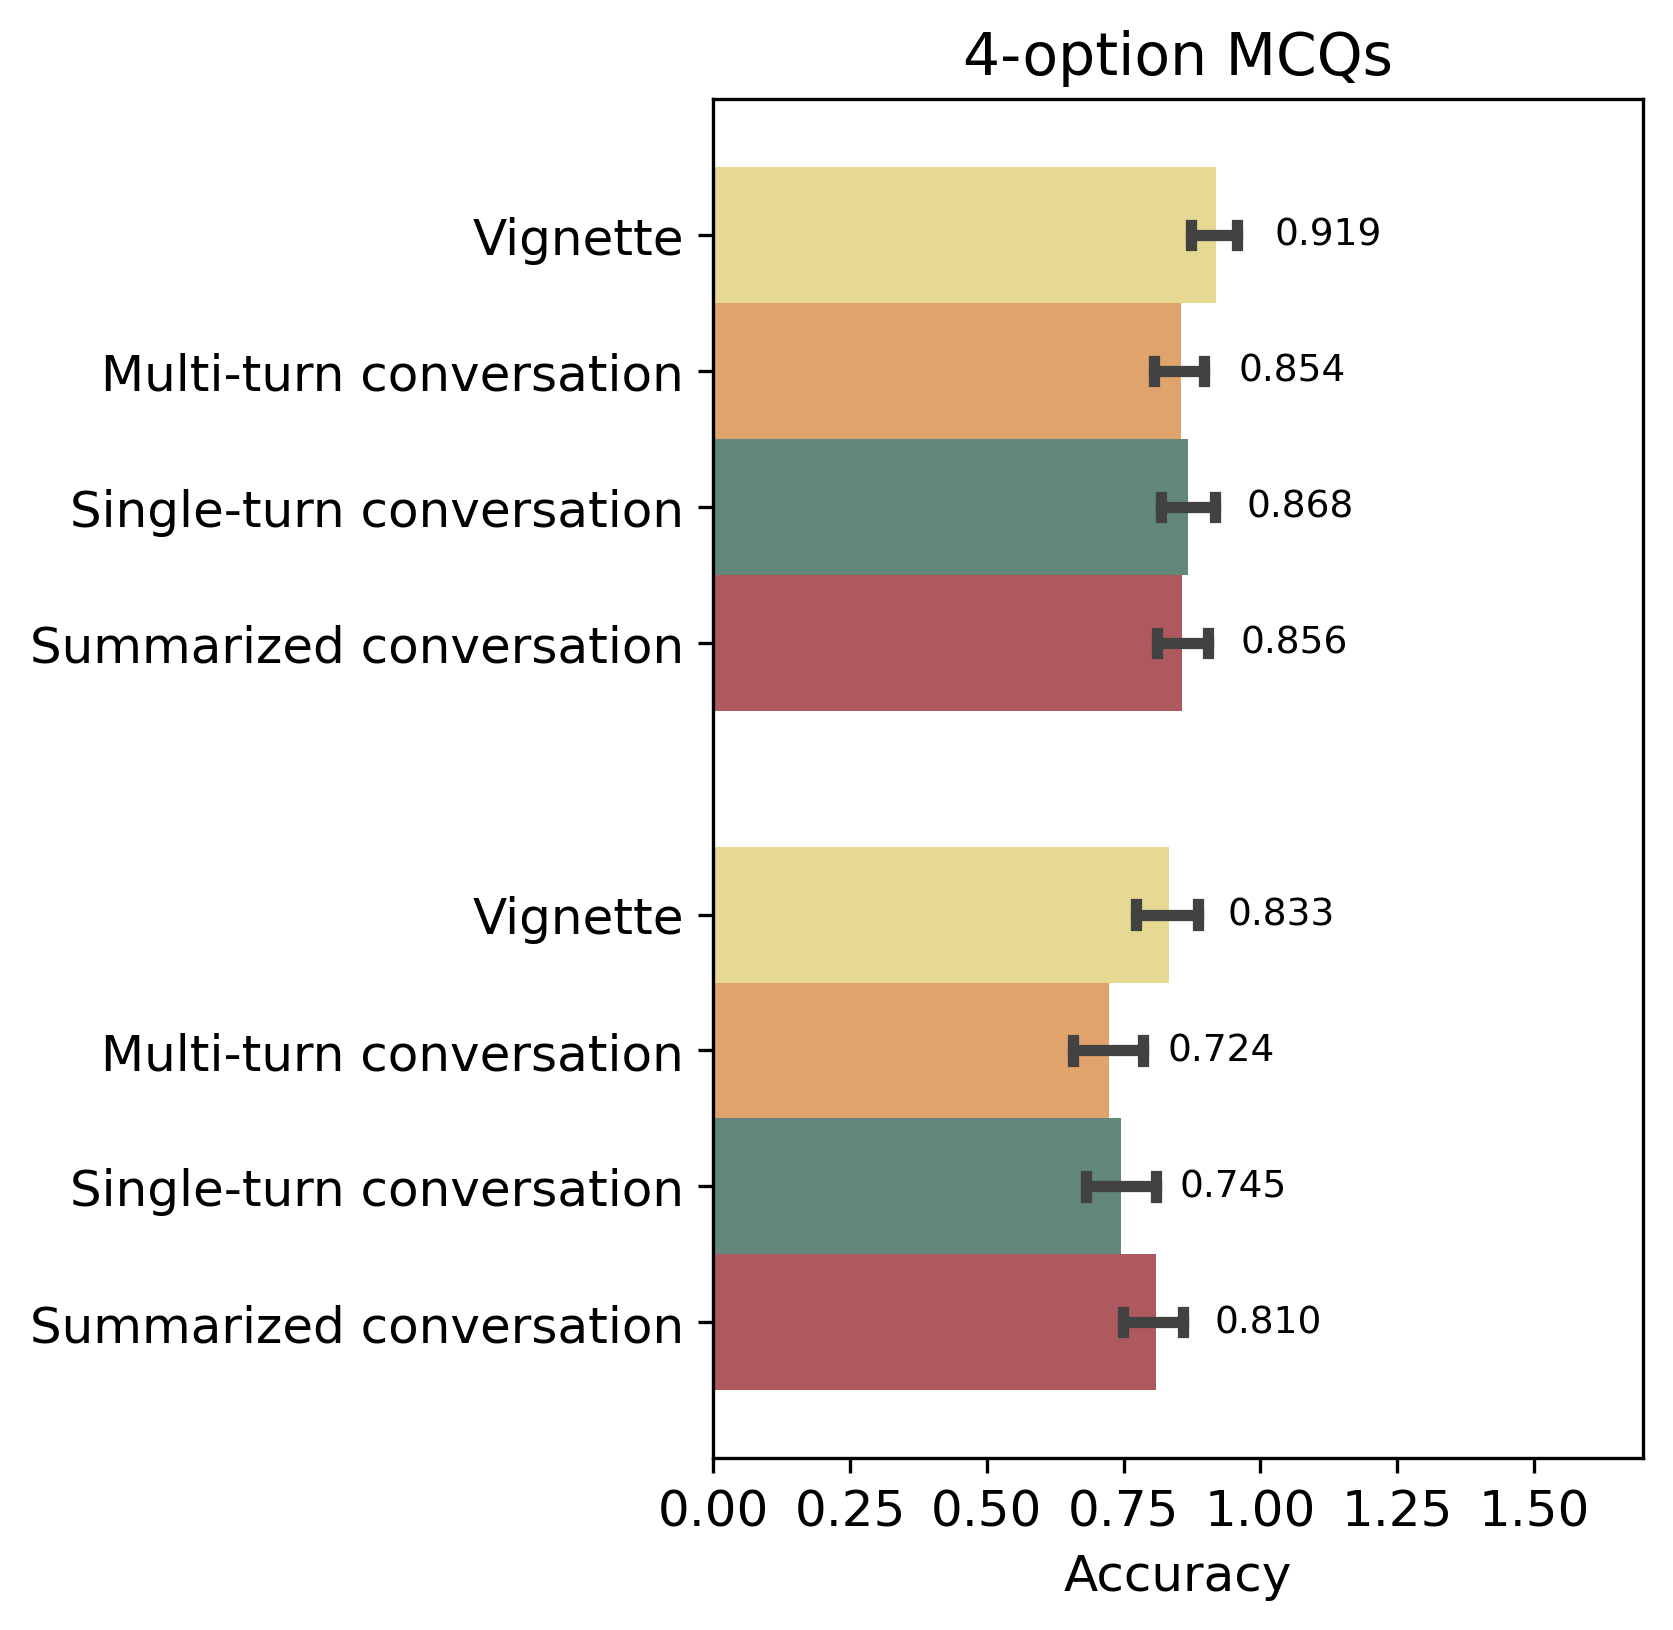

In [22]:
fig, axs = plt.subplots(1,1,figsize=(4,6), dpi=300)
# colors=["#8cb369", "#f4e285", "#f4a259", "#5b8e7d", "#bc4b51"]
bar_width = 0.8
colors=["#f4e285", "#f4a259", "#5b8e7d", "#bc4b51"]

exp_order = ["Vignette", "Multi-turn conversation", 
             "Single-turn conversation", "Summarized conversation"]
gpt_order = ["GPT-4", "GPT-3.5"]
sns.barplot(data = plot_df_mcq_df, y="GPT_model", x = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette=colors, errorbar='ci',
            capsize = 0.03,
            width=bar_width)
for i in range(len(exp_order)):
    axs.bar_label(axs.containers[i], fmt='%.3f', size=9, padding=14)
# axs.legend(bbox_to_anchor=(1.05,1))
axs.get_legend().remove()
axs.set_title("4-option MCQs", size=14)
axs.set_ylabel("")
axs.set_xlabel("Accuracy", size=12)
axs.set_xlim(0,1.7)
yticks = axs.get_yticks()
new_yticks = [yticks[0]-1.5*bar_width/4, yticks[0]-0.5*bar_width/4, 
              yticks[0]+0.5*bar_width/4, yticks[0]+1.5*bar_width/4] + [yticks[1]-1.5*bar_width/4, yticks[1]-0.5*bar_width/4, 
              yticks[1]+0.5*bar_width/4, yticks[1]+1.5*bar_width/4]
new_yticklabels = exp_order*2
axs.set_yticks(new_yticks)
axs.set_yticklabels(labels = new_yticklabels,size=12)
axs.set_xticklabels(axs.get_xticklabels(),size=12);
fig.savefig("fig2.svg", format="svg", dpi=1200);

### Calculate Stats

In [23]:
exp_order = ["Vignette", "Multi-turn conversation", 
             "Single-turn conversation", "Summarized conversation", "Physical Exam"]

tests1 = list(combinations(sorted(set(plot_df_mcq_df.loc[plot_df_mcq_df.GPT_model=="GPT-4", "experiment"])),2))
tests2 = list(combinations(sorted(set(plot_df_mcq_df.loc[plot_df_mcq_df.GPT_model=="GPT-3.5", "experiment"])),2))
tests3 = [tuple(sorted(set(plot_df_mcq_df[plot_df_mcq_df.Experiment_name==x].experiment))) for x in exp_order]

In [24]:
# GPT-4
res1 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_MCQ": "Single-turn conversation",
          "multiturn_PE_MCQ": "Multi-turn conversation",
          "summarisedconvo_PE_mcq": "Summarized conversation",
          "vignette_mcq": "Vignette",
          "PE_mcq": "Physical Exam"
         }
count=0
for t in tests1:
    pval = bootstrap_pvalue(plot_df_mcq_df.loc[plot_df_mcq_df.experiment==t[0], "Accuracy"].values, 
                     plot_df_mcq_df.loc[plot_df_mcq_df.experiment==t[1], "Accuracy"].values)
    gpt_model = t[0].split("_")[0].upper()
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res1.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res1["corrected_pvalue"] = multipletests(res1["pvalue"],alpha=0.05, method='holm')[1]

# GPT-3.5
res2 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_MCQ": "Single-turn conversation",
          "multiturn_PE_MCQ": "Multi-turn conversation",
          "summarisedconvo_PE_mcq": "Summarized conversation",
          "vignette_mcq": "Vignette",
          "PE_mcq": "Physical Exam"
         }
count=0
for t in tests2:
    pval = bootstrap_pvalue(plot_df_mcq_df.loc[plot_df_mcq_df.experiment==t[0], "Accuracy"].values, 
                     plot_df_mcq_df.loc[plot_df_mcq_df.experiment==t[1], "Accuracy"].values)
    gpt_model = "GPT-3.5"
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res2.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res2["corrected_pvalue"] = multipletests(res2["pvalue"],alpha=0.05, method='holm')[1]

res = pd.concat([res1,res2])
res.to_csv("./results/statistics/fig2c_stats.tsv", sep="\t")

/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/1721849380.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(),size=12)
/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/1721849380.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(),size=12);


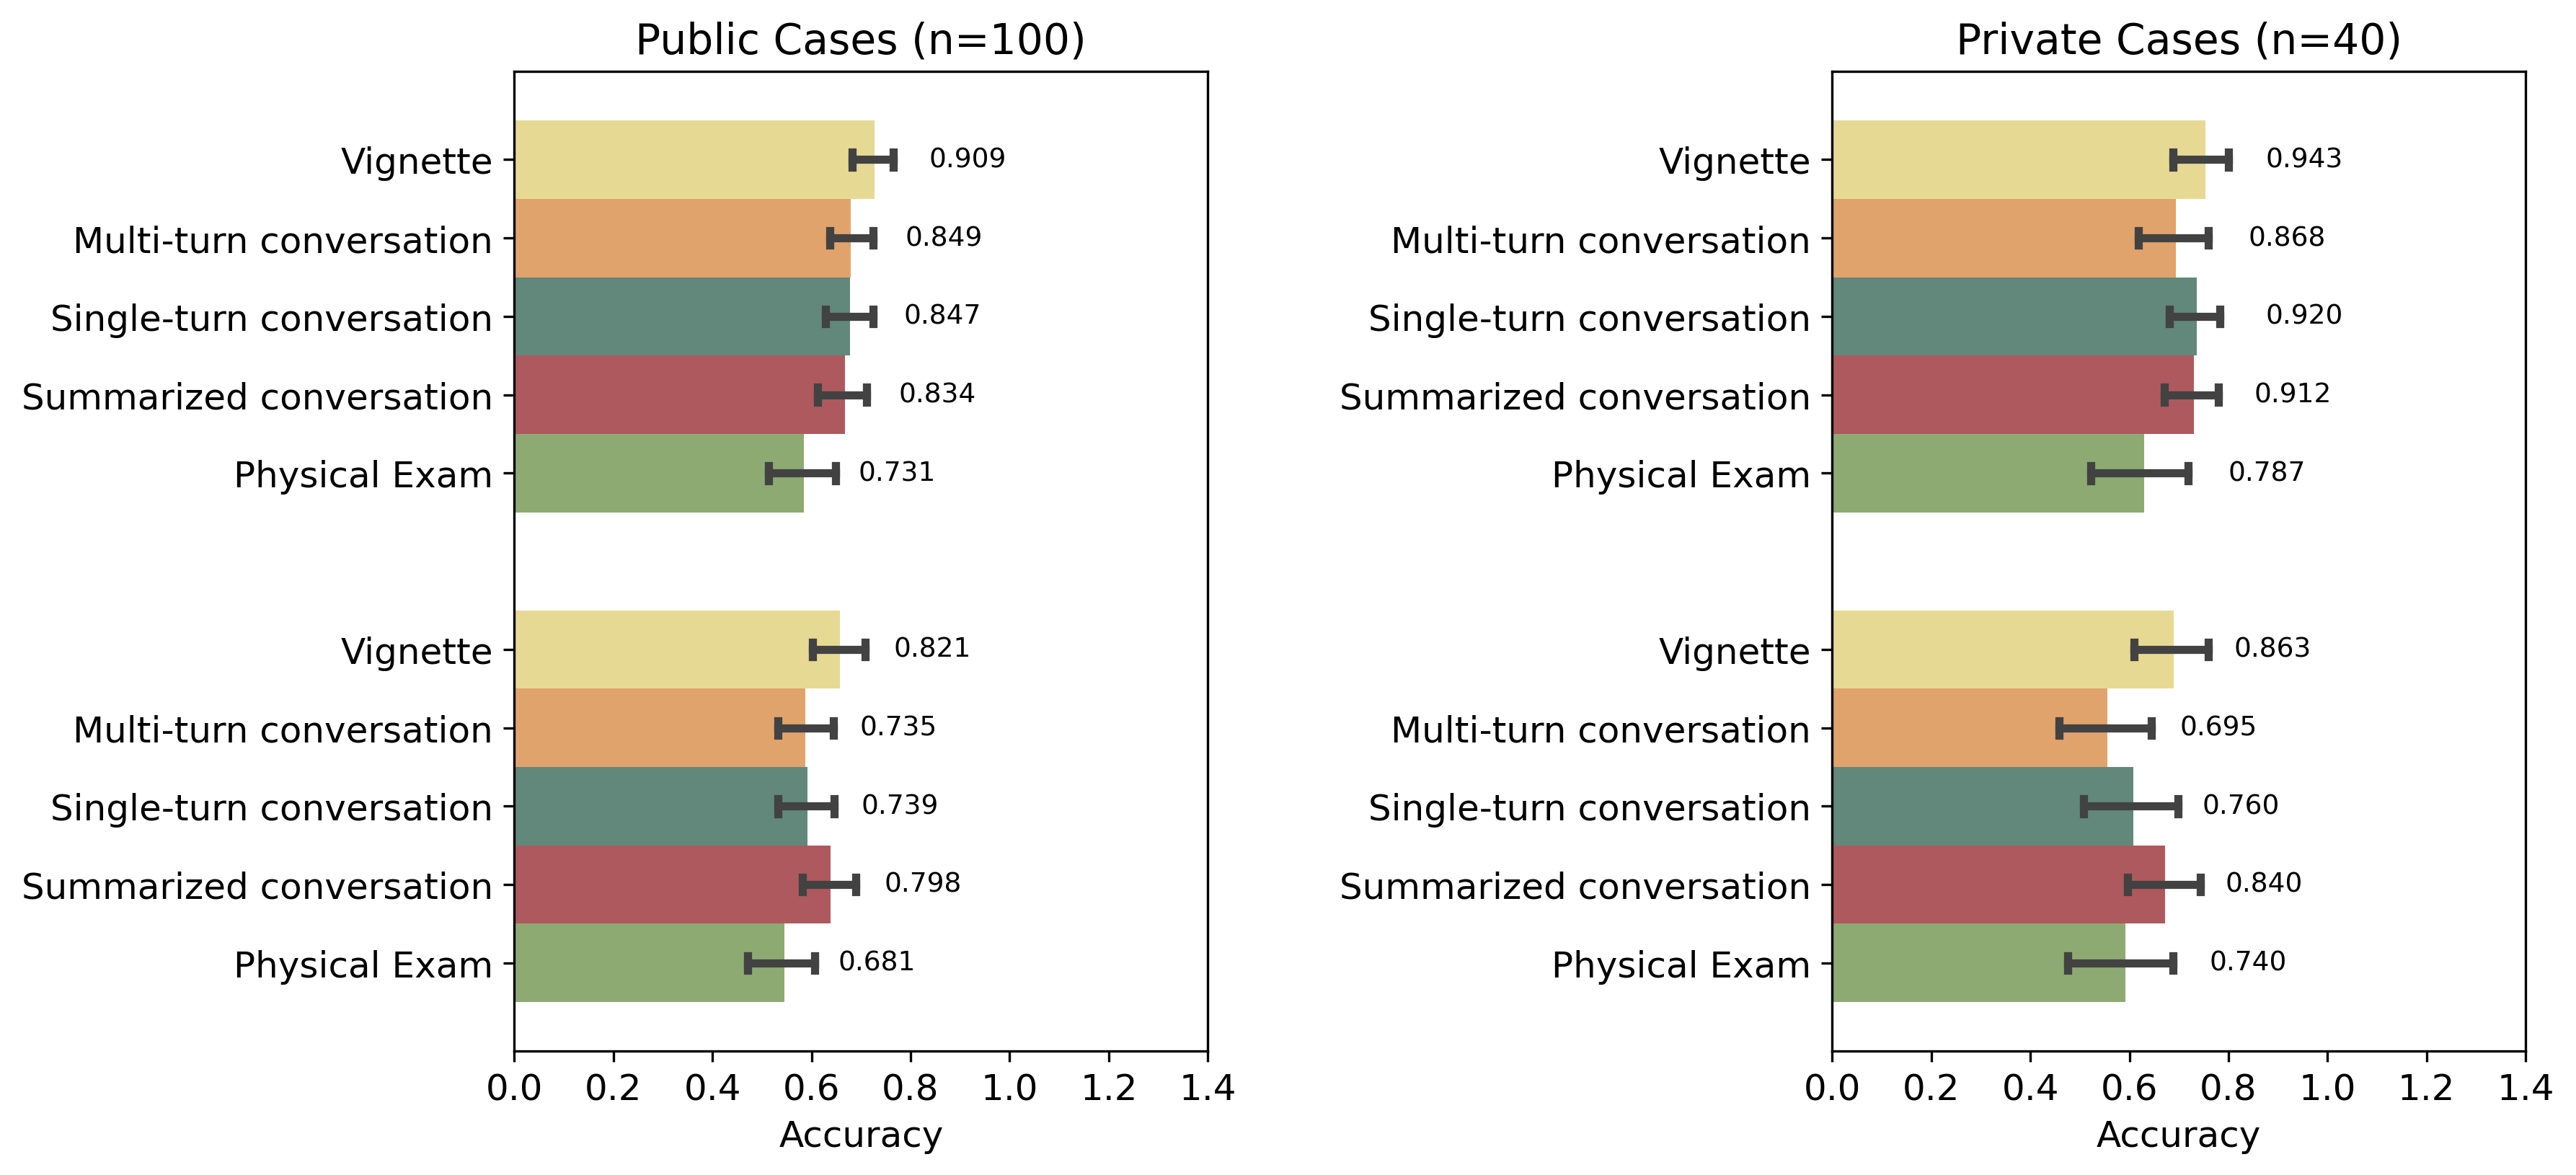

In [25]:
fig, axs = plt.subplots(1,2,figsize=(12,6), dpi=300)
# colors=[", "#f4e285", "#f4a259", "#5b8e7d", "#bc4b51"]
bar_width = 0.8
colors=["#f4e285", "#f4a259", "#5b8e7d", "#bc4b51", "#8cb369"]

exp_order = ["Vignette", "Multi-turn conversation", 
             "Single-turn conversation", "Summarized conversation", "Physical Exam"]
gpt_order = ["GPT-4", "GPT-3.5"]

public_df = plot_df_mcq_df[plot_df_mcq_df.case_id.str.contains("public")]
private_df = plot_df_mcq_df[plot_df_mcq_df.case_id.str.contains("private")]
sns.barplot(data = public_df, y="GPT_model", x = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette=colors, errorbar='ci',
            capsize = 0.03, width=bar_width, ax=axs[0])
for i in range(len(exp_order)):
    axs[0].bar_label(axs[0].containers[i], fmt='%.3f', size=9, padding=18)
# axs[0].legend(bbox_to_anchor=(1.05,1))
axs[0].get_legend().remove()
axs[0].set_title("Public Cases (n=100)", size=14)
axs[0].set_ylabel("")
axs[0].set_xlabel("Accuracy", size=12)
axs[0].set_xlim(0,1.75)
yticks = axs[0].get_yticks()
new_yticks = [yticks[0]-2*bar_width/5, yticks[0]-1*bar_width/5, yticks[0], yticks[0]+1*bar_width/5, 
              yticks[0]+2*bar_width/5] + [yticks[1]-2*bar_width/5, yticks[1]-1*bar_width/5, yticks[1], 
              yticks[1]+1*bar_width/5, yticks[1]+2*bar_width/5]
new_yticklabels = exp_order*2
axs[0].set_yticks(new_yticks)
axs[0].set_yticklabels(labels = new_yticklabels,size=12)
axs[0].set_xticklabels(axs[0].get_xticklabels(),size=12)

sns.barplot(data = private_df, y="GPT_model", x = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette=colors, errorbar='ci',
            capsize = 0.03, width=bar_width, ax=axs[1])
padding_list = [20, 24, 23, 20, 28]
for i in range(len(exp_order)):
    axs[1].bar_label(axs[1].containers[i], fmt='%.3f', size=9, padding=padding_list[i])
# axs[1].legend(bbox_to_anchor=(1.05,1))
axs[1].get_legend().remove()
axs[1].set_title("Private Cases (n=40)", size=14)
axs[1].set_ylabel("")
axs[1].set_xlabel("Accuracy", size=12)
axs[1].set_xlim(0,1.75)
yticks = axs[1].get_yticks()
new_yticks = [yticks[0]-2*bar_width/5, yticks[0]-1*bar_width/5, yticks[0], yticks[0]+1*bar_width/5, 
              yticks[0]+2*bar_width/5] + [yticks[1]-2*bar_width/5, yticks[1]-1*bar_width/5, yticks[1], 
              yticks[1]+1*bar_width/5, yticks[1]+2*bar_width/5]
new_yticklabels = exp_order*2
axs[1].set_yticks(new_yticks)
axs[1].set_yticklabels(labels = new_yticklabels,size=12)
axs[1].set_xticklabels(axs[1].get_xticklabels(),size=12);

fig.subplots_adjust(wspace=0.9)

In [26]:
exp_order = ["Vignette", "Multi-turn conversation", 
             "Single-turn conversation", "Summarized conversation", "Physical Exam"]

tests1 = list(combinations(sorted(set(public_df.loc[public_df.GPT_model=="GPT-4", "experiment"])),2))
tests2 = list(combinations(sorted(set(public_df.loc[public_df.GPT_model=="GPT-3.5", "experiment"])),2))
tests3 = [tuple(sorted(set(public_df[public_df.Experiment_name==x].experiment))) for x in exp_order]

In [27]:
# GPT-4
res1 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_MCQ": "Single-turn conversation",
          "multiturn_PE_MCQ": "Multi-turn conversation",
          "summarisedconvo_PE_mcq": "Summarized conversation",
          "vignette_mcq": "Vignette",
          "PE_mcq": "Physical Exam"
         }
count=0
for t in tests1:
    pval = bootstrap_pvalue(public_df.loc[public_df.experiment==t[0], "Accuracy"].values, 
                     public_df.loc[public_df.experiment==t[1], "Accuracy"].values)
    gpt_model = t[0].split("_")[0].upper()
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res1.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res1["corrected_pvalue"] = multipletests(res1["pvalue"],alpha=0.05, method='holm')[1]

# GPT-3.5
res2 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_MCQ": "Single-turn conversation",
          "multiturn_PE_MCQ": "Multi-turn conversation",
          "summarisedconvo_PE_mcq": "Summarized conversation",
          "vignette_mcq": "Vignette",
          "PE_mcq": "Physical Exam"
         }
count=0
for t in tests2:
    pval = bootstrap_pvalue(public_df.loc[public_df.experiment==t[0], "Accuracy"].values, 
                     public_df.loc[public_df.experiment==t[1], "Accuracy"].values)
    gpt_model = "GPT-3.5"
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res2.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res2["corrected_pvalue"] = multipletests(res2["pvalue"],alpha=0.05, method='holm')[1]

res = pd.concat([res1,res2])
res.to_csv("./results/statistics/figs1b_stats.tsv", sep="\t")

In [28]:
exp_order = ["Vignette", "Multi-turn conversation", 
             "Single-turn conversation", "Summarized conversation", "Physical Exam"]

tests1 = list(combinations(sorted(set(private_df.loc[private_df.GPT_model=="GPT-4", "experiment"])),2))
tests2 = list(combinations(sorted(set(private_df.loc[private_df.GPT_model=="GPT-3.5", "experiment"])),2))
tests3 = [tuple(sorted(set(private_df[private_df.Experiment_name==x].experiment))) for x in exp_order]

In [29]:
# GPT-4
res1 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_MCQ": "Single-turn conversation",
          "multiturn_PE_MCQ": "Multi-turn conversation",
          "summarisedconvo_PE_mcq": "Summarized conversation",
          "vignette_mcq": "Vignette",
          "PE_mcq": "Physical Exam"
         }
count=0
for t in tests1:
    pval = bootstrap_pvalue(private_df.loc[private_df.experiment==t[0], "Accuracy"].values, 
                     private_df.loc[private_df.experiment==t[1], "Accuracy"].values)
    gpt_model = t[0].split("_")[0].upper()
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res1.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res1["corrected_pvalue"] = multipletests(res1["pvalue"],alpha=0.05, method='holm')[1]

# GPT-3.5
res2 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_MCQ": "Single-turn conversation",
          "multiturn_PE_MCQ": "Multi-turn conversation",
          "summarisedconvo_PE_mcq": "Summarized conversation",
          "vignette_mcq": "Vignette",
          "PE_mcq": "Physical Exam"
         }
count=0
for t in tests2:
    pval = bootstrap_pvalue(private_df.loc[private_df.experiment==t[0], "Accuracy"].values, 
                     private_df.loc[private_df.experiment==t[1], "Accuracy"].values)
    gpt_model = "GPT-3.5"
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res2.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res2["corrected_pvalue"] = multipletests(res2["pvalue"],alpha=0.05, method='holm')[1]

res = pd.concat([res1,res2])
res.to_csv("./results/statistics/figs1c_stats.tsv", sep="\t")

(0.0, 1.0)

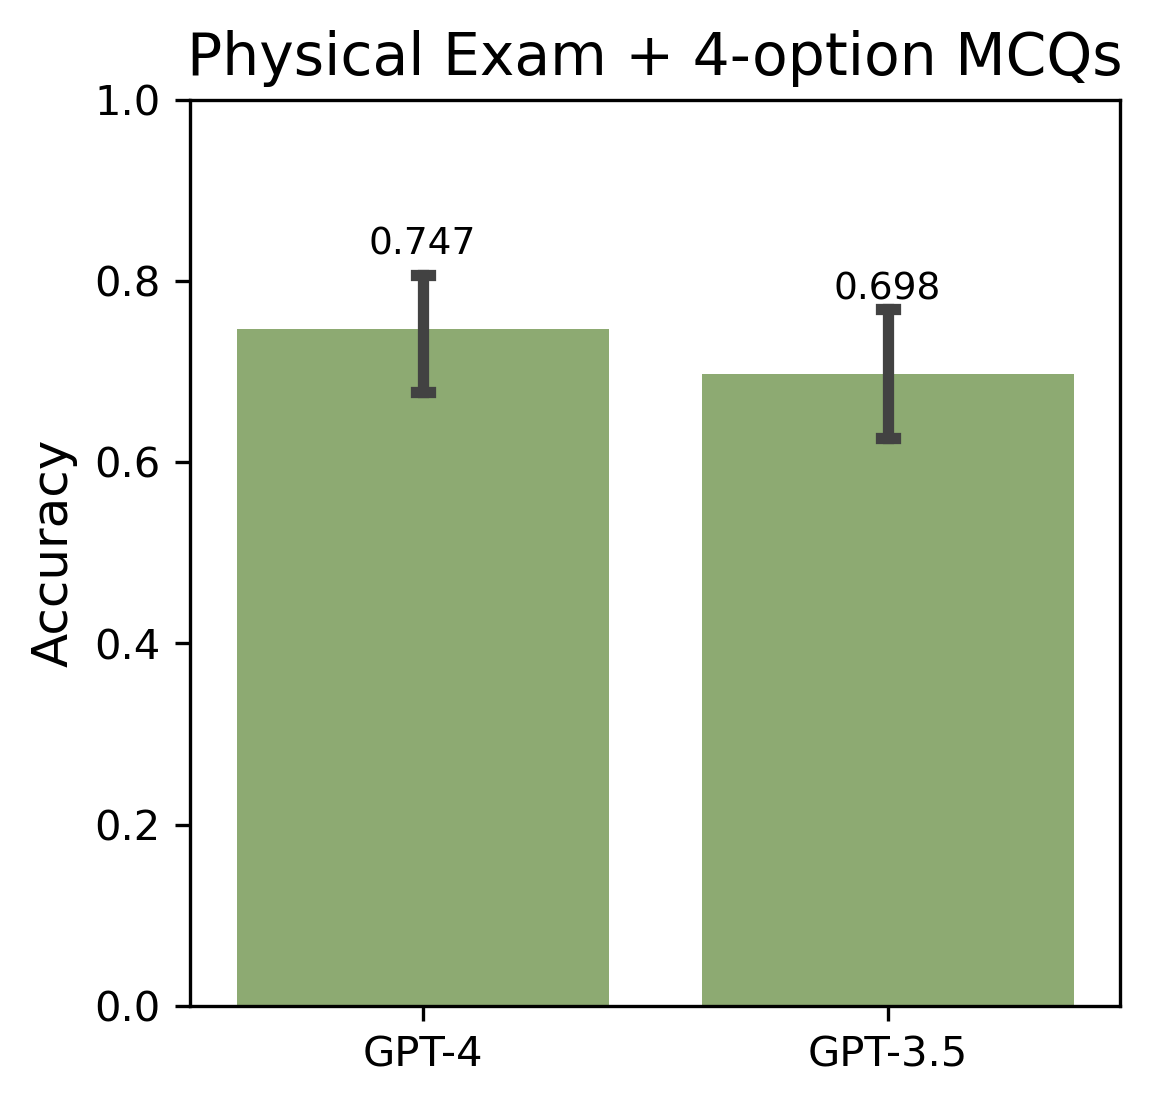

In [30]:
fig, axs = plt.subplots(1,1,figsize=(4,4), dpi=300)
colors=["#8cb369", "#f4e285", "#f4a259", "#5b8e7d", "#bc4b51"]
bar_width = 0.8
# colors=["#f4e285", "#f4a259", "#5b8e7d", "#bc4b51"]

exp_order = ["Physical Exam"]
gpt_order = ["GPT-4", "GPT-3.5"]
sns.barplot(data = plot_df_mcq_df, x="GPT_model", y = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette=colors, errorbar='ci',
            capsize = 0.03,
            width=bar_width)
for i in range(len(exp_order)):
    axs.bar_label(axs.containers[i], fmt='%.3f', size=9, padding=16)
# axs.legend(bbox_to_anchor=(1.05,1))
axs.get_legend().remove()
axs.set_title("Physical Exam + 4-option MCQs", size=14)
axs.set_xlabel("")
axs.set_ylabel("Accuracy", size=12)
axs.set_ylim(0,1)
# yticks = axs.get_yticks()
# new_yticks = [yticks[0]-2*bar_width/5, yticks[0]-1*bar_width/5, yticks[0],  
#               yticks[0]+1*bar_width/5, yticks[0]+2*bar_width/5] + [yticks[1]-2*bar_width/5, yticks[1]-1*bar_width/5, 
#               yticks[1], yticks[1]+1*bar_width/5, yticks[1]+2*bar_width/5]
# new_yticklabels = exp_order*2
# axs.set_yticks(new_yticks)
# axs.set_yticklabels(labels = new_yticklabels,size=12)
# axs.set_xticklabels(axs.get_xticklabels(),size=12);

In [31]:
derm_annots_gpt3 = pd.read_csv("./results/expert_annotations/dermatologist_analysis_conversation_PE_frq_gpt3.tsv",sep="\t", index_col=0)
derm_annots_gpt3 = derm_annots_gpt3.drop("notes",axis=1).dropna(axis=0)
for col in derm_annots_gpt3.columns[1:]:
    if col!="q4":
        derm_annots_gpt3[col] = derm_annots_gpt3[col].map({"Yes":1, "No":0})
    else:
        derm_annots_gpt3[col] = derm_annots_gpt3[col].map({"Yes":0, "No":1})

derm_annots_gpt3.columns = ["trial_id", "diagnosis_possible_from_conversation", 
                    "complete_med_history", "medical_terminology"]

derm_annots_gpt3["singleturn_mcq"]=None
derm_annots_gpt3["multiturn_mcq"]=None
derm_annots_gpt3["onlyPE_mcq"]=None
derm_annots_gpt3["summarizedconvo_mcq"]=None
derm_annots_gpt3["vignette_mcq"]=None

for case_id in derm_annots_gpt3.index:
    trial_id = derm_annots_gpt3.loc[case_id,"trial_id"]
    if case_id.split("_")[0]=="public":
        derm_annots_gpt3.loc[case_id,"singleturn_mcq"] = fd_mcq_public_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"multiturn_mcq"] = convo_mcq_public_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"onlyPE_mcq"] = agesexpemcq_public_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"summarizedconvo_mcq"] = summarisedconvoPEmcq_public_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"vignette_mcq"] = vignette_mcq_public_gpt3_df[case_id][int(trial_id.split("_")[1])]
    elif case_id.split("_")[0]=="private":
        derm_annots_gpt3.loc[case_id,"singleturn_mcq"] = fd_mcq_private_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"multiturn_mcq"] = convo_mcq_private_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"onlyPE_mcq"] = agesexpemcq_private_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"summarizedconvo_mcq"] = summarisedconvoPEmcq_private_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"vignette_mcq"] = vignette_mcq_private_gpt3_df[case_id][int(trial_id.split("_")[1])]
        
derm_annots_gpt3["category"] = derm_annots_gpt3.index.map(dmap2)
# derm_annots_gpt3

In [32]:
derm_annots_gpt4 = pd.read_csv("./results/expert_annotations/dermatologist_analysis_conversation_PE_frq_gpt4.tsv",sep="\t", index_col=0)
derm_annots_gpt4 = derm_annots_gpt4.drop("notes",axis=1).dropna(axis=0)
for col in derm_annots_gpt4.columns[1:]:
    if col!="q4":
        derm_annots_gpt4[col] = derm_annots_gpt4[col].map({"Yes":1, "No":0})
    else:
        derm_annots_gpt4[col] = derm_annots_gpt4[col].map({"Yes":0, "No":1})

derm_annots_gpt4.columns = ["trial_id", "diagnosis_possible_from_conversation", 
                    "complete_med_history", "medical_terminology"]

derm_annots_gpt4["singleturn_mcq"]=None
derm_annots_gpt4["multiturn_mcq"]=None
derm_annots_gpt4["onlyPE_mcq"]=None
derm_annots_gpt4["summarizedconvo_mcq"]=None
derm_annots_gpt4["vignette_mcq"]=None

for case_id in derm_annots_gpt4.index:
    trial_id = derm_annots_gpt4.loc[case_id,"trial_id"]
    if case_id.split("_")[0]=="public":
        derm_annots_gpt4.loc[case_id,"singleturn_mcq"] = fd_mcq_public_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"multiturn_mcq"] = convo_mcq_public_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"onlyPE_mcq"] = agesexpemcq_public_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"summarizedconvo_mcq"] = summarisedconvoPEmcq_public_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"vignette_mcq"] = vignette_mcq_public_gpt4_df[case_id][int(trial_id.split("_")[1])]
    elif case_id.split("_")[0]=="private":
        derm_annots_gpt4.loc[case_id,"singleturn_mcq"] = fd_mcq_private_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"multiturn_mcq"] = convo_mcq_private_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"onlyPE_mcq"] = agesexpemcq_private_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"summarizedconvo_mcq"] = summarisedconvoPEmcq_private_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"vignette_mcq"] = vignette_mcq_private_gpt4_df[case_id][int(trial_id.split("_")[1])]
        
derm_annots_gpt4["category"] = derm_annots_gpt4.index.map(dmap2)
# derm_annots_gpt4

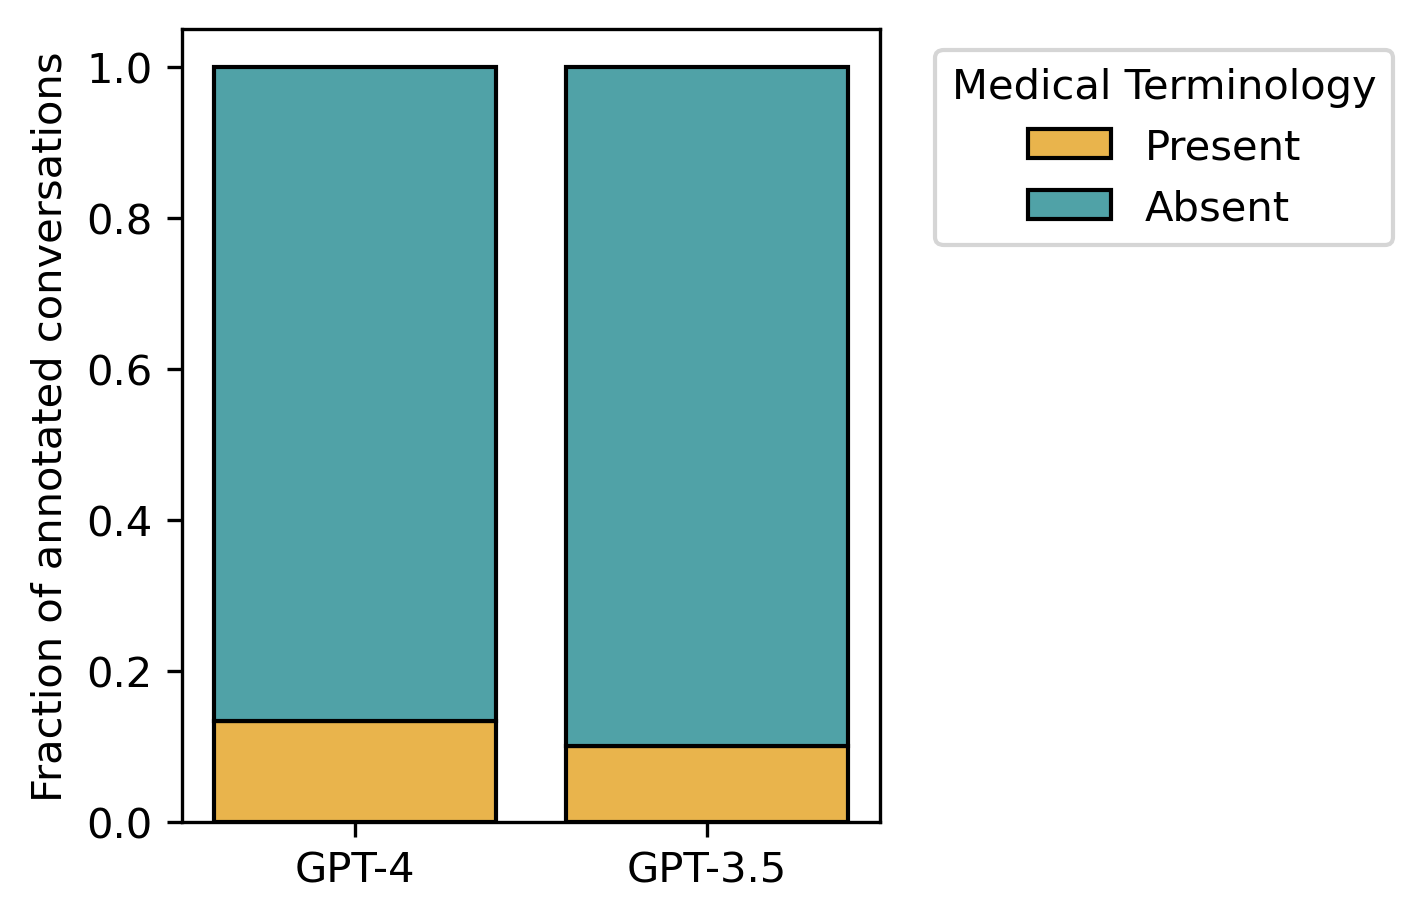

In [33]:
fig, axs = plt.subplots(1,1, figsize=(3,3.5), dpi=300)
colors = ["#E9B44C","#50A2A7"]

heights = [[derm_annots_gpt3.medical_terminology.sum()/derm_annots_gpt3.shape[0], derm_annots_gpt4.medical_terminology.sum()/derm_annots_gpt4.shape[0]],
          [1-(derm_annots_gpt3.medical_terminology.sum()/derm_annots_gpt3.shape[0]), 1-(derm_annots_gpt4.medical_terminology.sum()/derm_annots_gpt4.shape[0])]]
xs = ["GPT-4","GPT-3.5"]
labels = ["Present", "Absent"]
temp = [0,0]
for i in range(2):
    axs.bar(x=xs, height=heights[i], bottom=temp, color=colors[i], 
            label=labels[i], edgecolor="black")
    temp = heights[i]

axs.set_ylabel("Fraction of annotated conversations")
axs.legend(title = "Medical Terminology", bbox_to_anchor=(1.05,1));

In [34]:
heights

[[0.13333333333333333, 0.1], [0.8666666666666667, 0.9]]

In [35]:
# fig, axs = plt.subplots(1,5, figsize=(15,5), dpi=300)

plot_df_raw = pd.DataFrame(columns=["experiment", "medical_history", "diagnosis", "proportion", "GPT_model"])

medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]
experiment = ["vignette_mcq", "multiturn_mcq", "singleturn_mcq", "summarizedconvo_mcq", "onlyPE_mcq"]

count = 0
for exp in experiment:
    tot = derm_annots_gpt3.shape[0]
    
    # complete medical history, correct diagnosis
    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==1) & (derm_annots_gpt3[exp]==1)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "complete", "correct", r, "GPT-3.5"]
    count+=1
    
    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==1) & (derm_annots_gpt3[exp]==0)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "complete", "incorrect", r, "GPT-3.5"]
    count+=1

    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==0) & (derm_annots_gpt3[exp]==1)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "incomplete", "correct", r, "GPT-3.5"]
    count+=1
    
    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==0) & (derm_annots_gpt3[exp]==0)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "incomplete", "incorrect", r, "GPT-3.5"]
    count+=1
    
for exp in experiment:
    tot = derm_annots_gpt4.shape[0]
    
    # complete medical history, correct diagnosis
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==1) & (derm_annots_gpt4[exp]==1)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "complete", "correct", r, "GPT-4"]
    count+=1
    
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==1) & (derm_annots_gpt4[exp]==0)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "complete", "incorrect", r, "GPT-4"]
    count+=1
    
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==0) & (derm_annots_gpt4[exp]==1)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "incomplete", "correct", r, "GPT-4"]
    count+=1
    
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==0) & (derm_annots_gpt4[exp]==0)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "incomplete", "incorrect", r, "GPT-4"]
    count+=1

In [36]:
cfmat1 = []
medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]

# [(complete, correct), (complete, incorrect), (incomplete, correct), (incomplete, incorrect)]
for med in medhis:
    temp = []
    for diag in diagnosis:
        temp.append(plot_df_raw.loc[((plot_df_raw.experiment=="multiturn_mcq") 
                    & (plot_df_raw.medical_history==med)
                    & (plot_df_raw.diagnosis==diag)
                    & (plot_df_raw.GPT_model=="GPT-4")), "proportion"].values[0])
    cfmat1.append(temp)
    
    
cfmat2 = []
medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]

# [(complete, correct), (complete, incorrect), (incomplete, correct), (incomplete, incorrect)]
for med in medhis:
    temp = []
    for diag in diagnosis:
        temp.append(plot_df_raw.loc[((plot_df_raw.experiment=="multiturn_mcq") 
                    & (plot_df_raw.medical_history==med)
                    & (plot_df_raw.diagnosis==diag)
                    & (plot_df_raw.GPT_model=="GPT-3.5")), "proportion"].values[0])
    cfmat2.append(temp)
    
cfmat3 = []
medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]

# [(complete, correct), (complete, incorrect), (incomplete, correct), (incomplete, incorrect)]
for med in medhis:
    temp = []
    for diag in diagnosis:
        temp.append(plot_df_raw.loc[((plot_df_raw.experiment=="summarizedconvo_mcq") 
                    & (plot_df_raw.medical_history==med)
                    & (plot_df_raw.diagnosis==diag)
                    & (plot_df_raw.GPT_model=="GPT-4")), "proportion"].values[0])
    cfmat3.append(temp)
    
    
cfmat4 = []
medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]

# [(complete, correct), (complete, incorrect), (incomplete, correct), (incomplete, incorrect)]
for med in medhis:
    temp = []
    for diag in diagnosis:
        temp.append(plot_df_raw.loc[((plot_df_raw.experiment=="summarizedconvo_mcq") 
                    & (plot_df_raw.medical_history==med)
                    & (plot_df_raw.diagnosis==diag)
                    & (plot_df_raw.GPT_model=="GPT-3.5")), "proportion"].values[0])
    cfmat4.append(temp)

In [37]:
cfmat1, cfmat2, cfmat3, cfmat4

([[40, 4], [12, 4]],
 [[30, 12], [15, 3]],
 [[39, 5], [11, 5]],
 [[33, 9], [15, 3]])

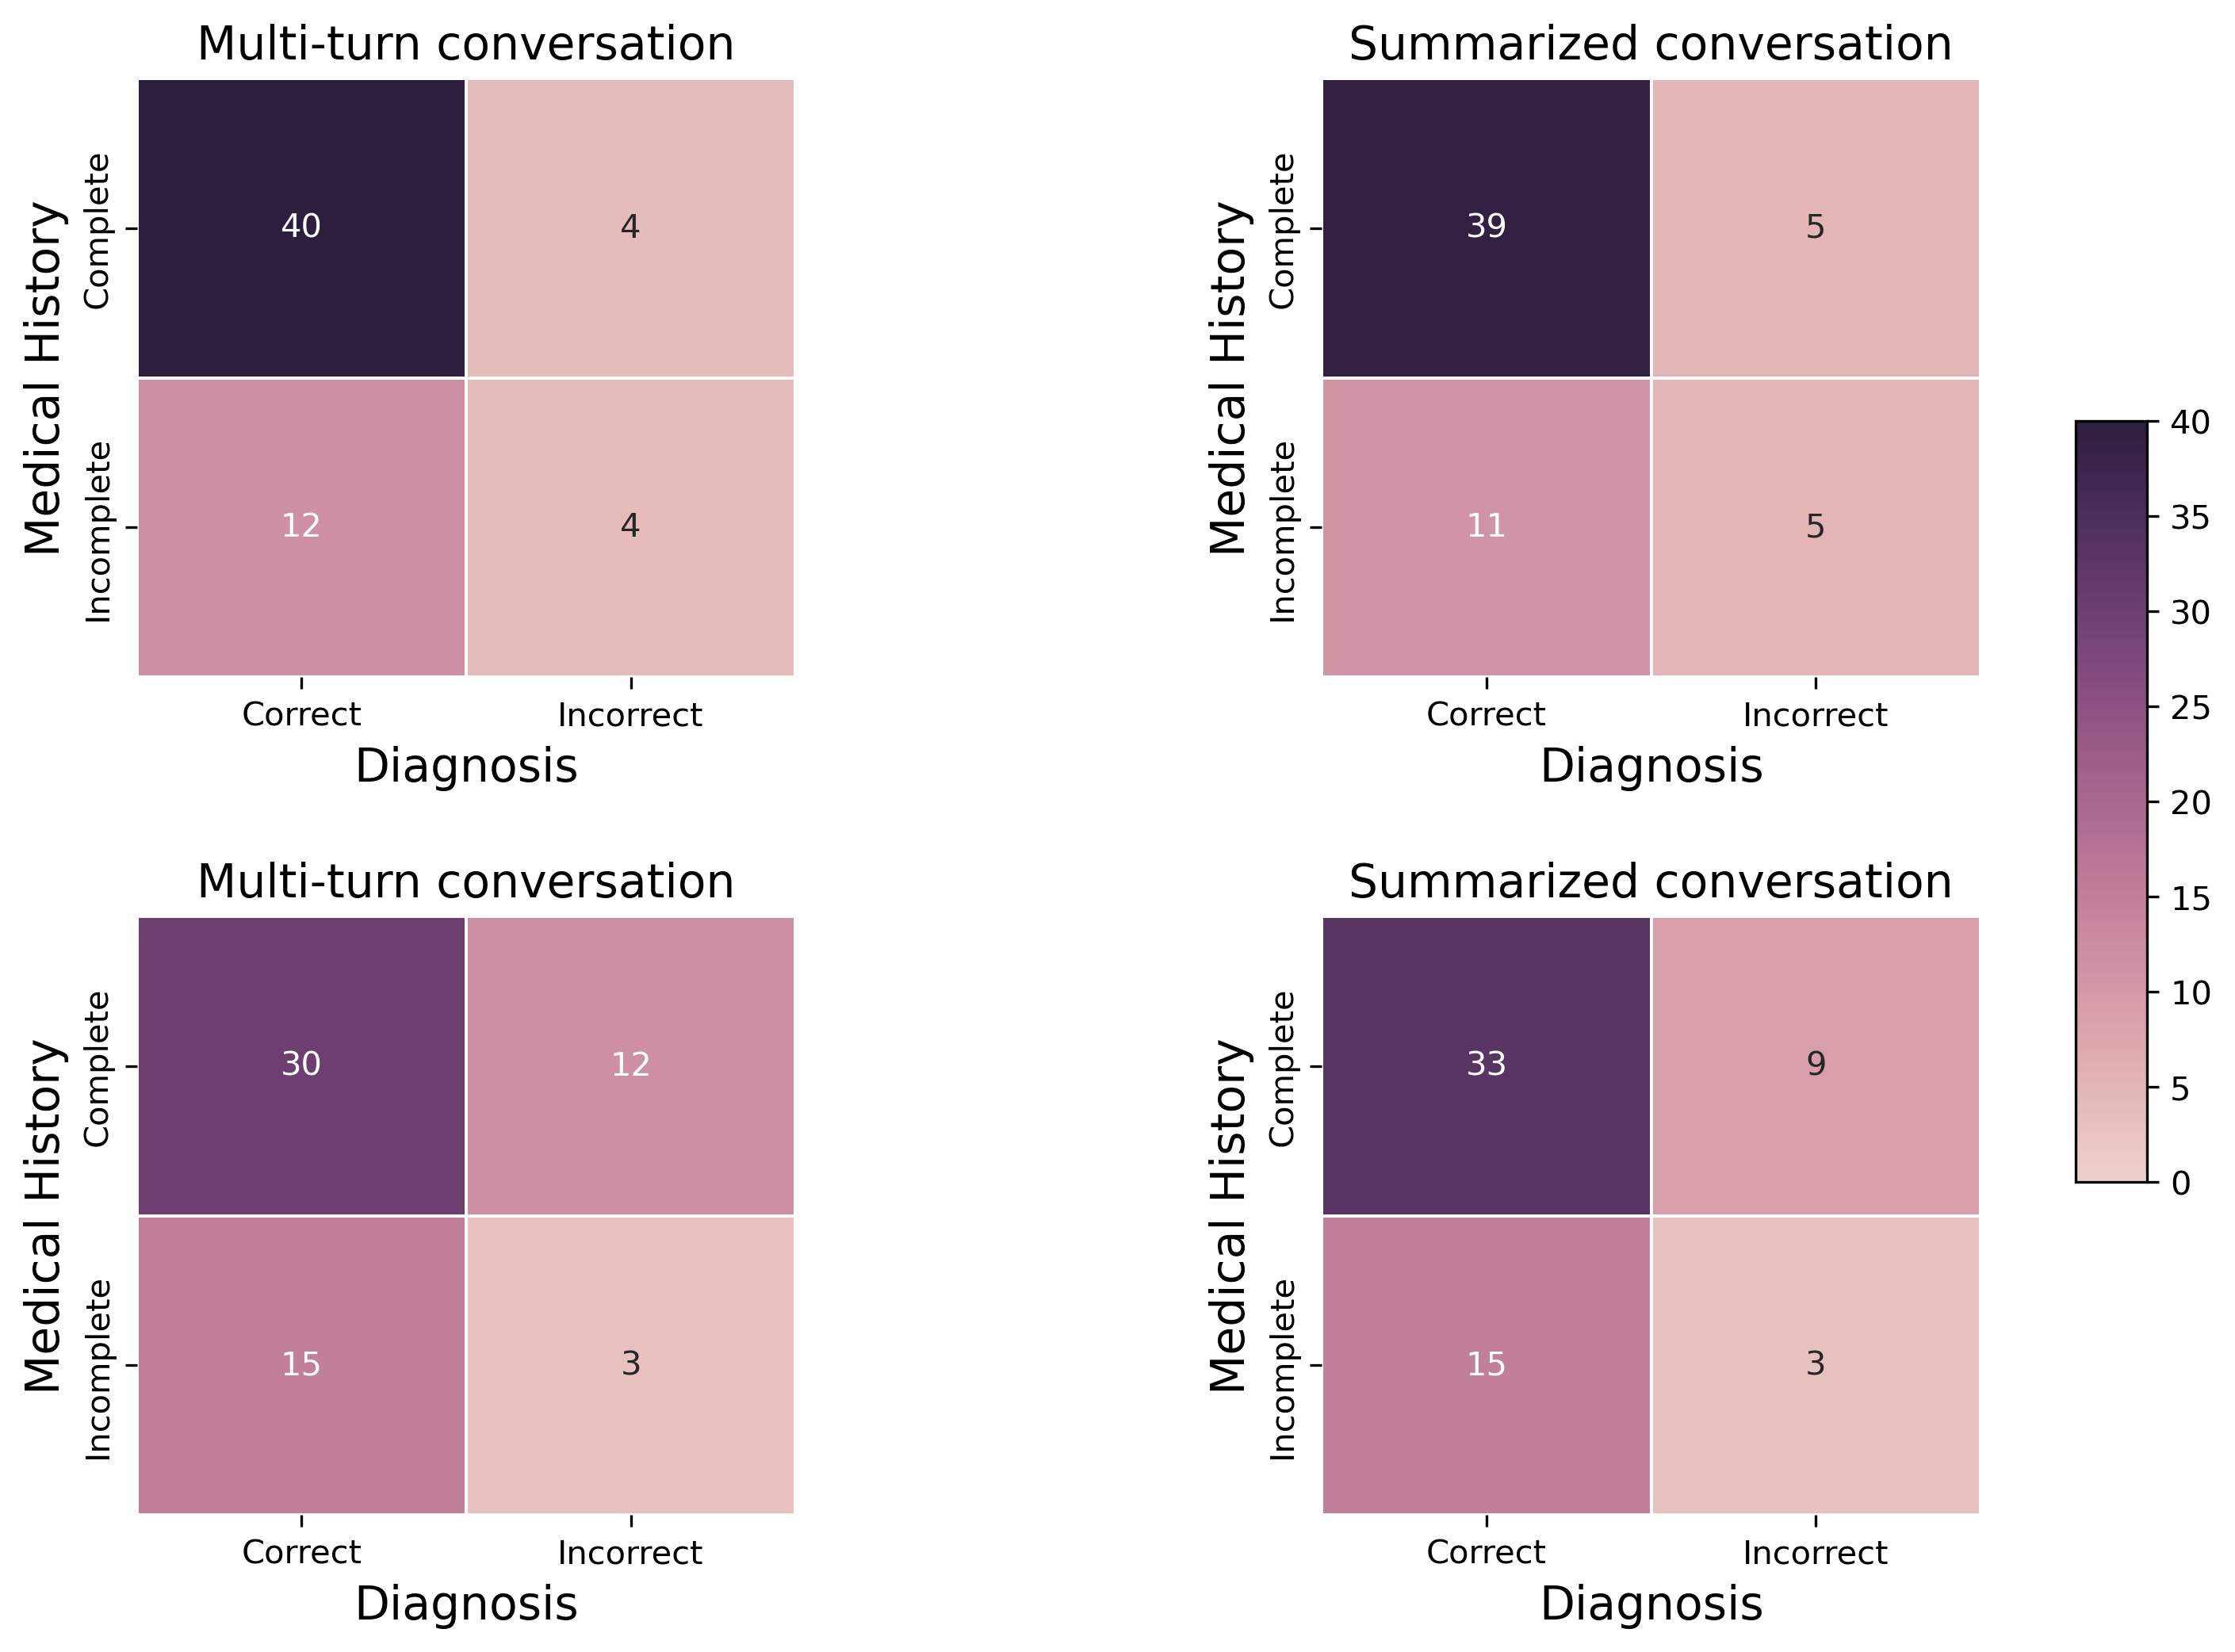

In [38]:
fig, axs = plt.subplots(2,2,figsize=(10,8), dpi=300)

exp = ["Multi-turn conversation", "Summarized conversation"]
gpt = ["GPT-4", "GPT-3.5"]
cfs = [cfmat1, cfmat2, cfmat3, cfmat4]
cbar_ax = fig.add_axes([0.94, .3, .03, .4])

count=0
for cf in cfs:
    sns.heatmap(cf, annot=True, linewidth=.5, 
                cmap=sns.cubehelix_palette(as_cmap=True), vmax=40, vmin=0, ax=axs[count%2][int(count/2)],
                cbar=False)
#     axs[count%2][int(count/2)].set_title(f"{exp[int(count/2)]} ({gpt[count%2]})", size=14)
    axs[count%2][int(count/2)].set_title(f"{exp[int(count/2)]}", size=14)
    axs[count%2][int(count/2)].set_xticklabels(["Correct", "Incorrect"])
    axs[count%2][int(count/2)].set_xlabel("Diagnosis", size=14)
    axs[count%2][int(count/2)].set_yticklabels(["Complete", "Incomplete"])
    axs[count%2][int(count/2)].set_ylabel("Medical History", size=14)
    count+=1
    
norm = plt.Normalize(0, 40)
# Use cax parameter to superimpose the colorbar on the defined cbar_ax
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=sns.cubehelix_palette(as_cmap=True)), cax=cbar_ax)
# Set the label for the colorbar
# cbar.set_label('Frequency', size=14)

fig.subplots_adjust(wspace=0.8, hspace=0.4)

# Figure 3

### Conversation + MCQ --> Conversation + MCQ_all --> Conversation + FRQ

### Single answer evaluations

In [39]:
x1 = pd.concat([convo_mcq_public_gpt3_df.mean(), 
                convo_mcq_private_gpt3_df.mean()])
x2 = pd.concat([convo_mcqall_public_gpt3_df.mean(), 
                convo_mcqall_private_gpt3_df.mean()])
x3 = pd.concat([convo_frq_public_gpt3_df.mean(), 
                convo_frq_private_gpt3_df.mean()])

x4 = pd.concat([convo_mcq_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_mcq_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])
x5 = pd.concat([convo_mcqall_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_mcqall_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])
x6 = pd.concat([convo_frq_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_frq_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])


plot_df_convos = pd.DataFrame([x1, x2, x3, x4, x5, x6],
                       index=["gpt3_multiturn_PE_MCQ",
                              "gpt3_multiturn_PE_MCQall",
                              "gpt3_multiturn_PE_FRQ",
                              "gpt4_multiturn_PE_MCQ",
                              "gpt4_multiturn_PE_MCQall",
                              "gpt4_multiturn_PE_FRQ",
                              ]).T

In [40]:
plot_df_convo_df = pd.DataFrame(plot_df_convos.stack()).reset_index()
plot_df_convo_df.columns = ["case_id", "experiment", "Accuracy"]
plot_df_convo_df["GPT_model"] = plot_df_convo_df.experiment.apply(lambda x: x.split("_")[0])
plot_df_convo_df["Experiment_name"] = plot_df_convo_df.experiment.apply(lambda x: "_".join(x.split("_")[1:]))
plot_df_convo_df.columns = ["case_id", "experiment", "Accuracy", "GPT_model", "Experiment_name"]

mapper1 = {"gpt3":"GPT-3.5", "gpt4":"GPT-4"}
mapper2 = {"multiturn_PE_MCQ": "4-choice MCQ",
          "multiturn_PE_MCQall": "many-choice MCQ",
          "multiturn_PE_FRQ": "no-choice MCQ"}

plot_df_convo_df["GPT_model"] = plot_df_convo_df.GPT_model.map(mapper1)
plot_df_convo_df["Experiment_name"] = plot_df_convo_df.Experiment_name.map(mapper2)
plot_df_convo_df

,case_id,experiment,Accuracy,GPT_model,Experiment_name
0,public_case01,gpt3_multiturn_PE_MCQ,0.9,GPT-3.5,4-choice MCQ
1,public_case01,gpt3_multiturn_PE_MCQall,0.0,GPT-3.5,many-choice MCQ
2,public_case01,gpt3_multiturn_PE_FRQ,0.0,GPT-3.5,no-choice MCQ
3,public_case01,gpt4_multiturn_PE_MCQ,0.5,GPT-4,4-choice MCQ
4,public_case01,gpt4_multiturn_PE_MCQall,0.2,GPT-4,many-choice MCQ
...,...,...,...,...,...
835,private_case40,gpt3_multiturn_PE_MCQall,0.1,GPT-3.5,many-choice MCQ
836,private_case40,gpt3_multiturn_PE_FRQ,0.9,GPT-3.5,no-choice MCQ
837,private_case40,gpt4_multiturn_PE_MCQ,1.0,GPT-4,4-choice MCQ
838,private_case40,gpt4_multiturn_PE_MCQall,1.0,GPT-4,many-choice MCQ


/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/2766627461.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(axs.get_yticklabels(),size=12);


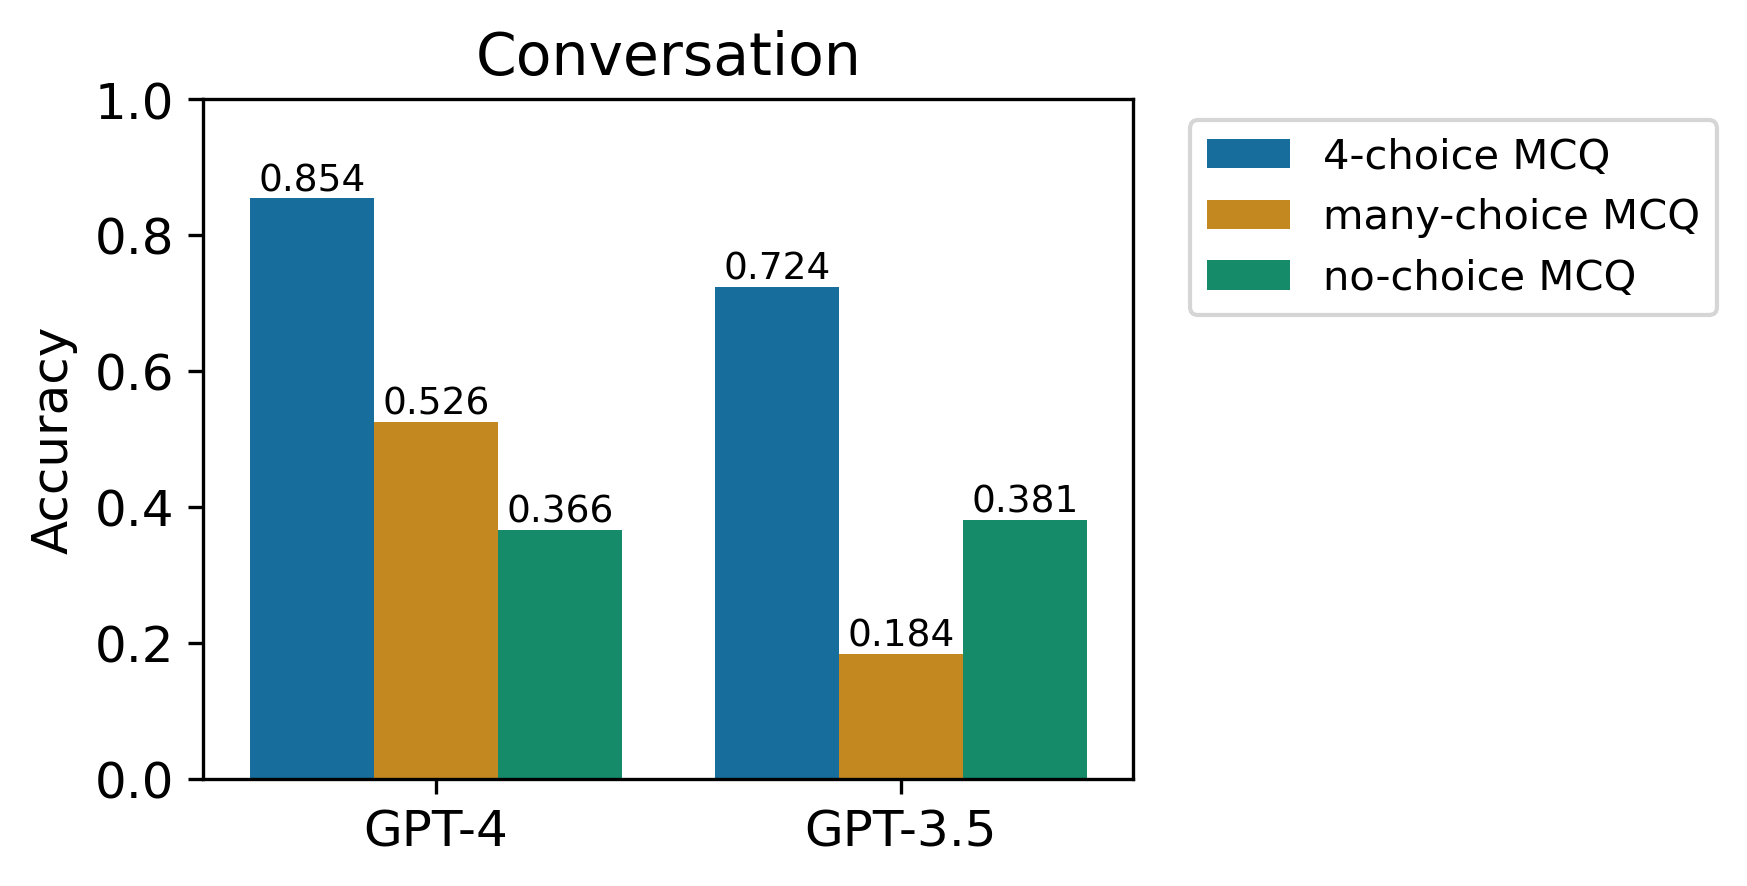

In [41]:
fig, axs = plt.subplots(1,1,figsize=(4,3), dpi=300)

exp_order = ["4-choice MCQ", "many-choice MCQ", "no-choice MCQ"]
gpt_order = ["GPT-4", "GPT-3.5"]
sns.barplot(data = plot_df_convo_df, x="GPT_model", y = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette="colorblind", errorbar=None)
for i in range(3):
    axs.bar_label(axs.containers[i], fmt='%.3f', size=9)
axs.legend(bbox_to_anchor=(1.65,1))
axs.set_title("Conversation", size=14)
axs.set_xlabel("")
axs.set_ylabel("Accuracy", size=12)
axs.set_ylim(0,1)
axs.set_xticklabels(axs.get_xticklabels(),size=12)
axs.set_yticklabels(axs.get_yticklabels(),size=12);

### Multiple answer evaluations

In [42]:
x1 = pd.concat([convo_mcq_public_gpt3_df.mean(), 
                convo_mcq_private_gpt3_df.mean()])
x2 = pd.concat([convo_mcqall_public_gpt3_df_multiple.mean(), 
                convo_mcqall_private_gpt3_df_multiple.mean()])
x3 = pd.concat([convo_frq_public_gpt3_df_multiple.mean(), 
                convo_frq_private_gpt3_df_multiple.mean()])

x4 = pd.concat([convo_mcq_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_mcq_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])
x5 = pd.concat([convo_mcqall_public_gpt4_df_multiple.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_mcqall_private_gpt4_df_multiple.sum()/(count_full[public_dataset.shape[0]:])])
x6 = pd.concat([convo_frq_public_gpt4_df_multiple.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_frq_private_gpt4_df_multiple.sum()/(count_full[public_dataset.shape[0]:])])


plot_df_convos = pd.DataFrame([x1, x2, x3, x4, x5, x6],
                       index=["gpt3_multiturn_PE_MCQ",
                              "gpt3_multiturn_PE_MCQall",
                              "gpt3_multiturn_PE_FRQ",
                              "gpt4_multiturn_PE_MCQ",
                              "gpt4_multiturn_PE_MCQall",
                              "gpt4_multiturn_PE_FRQ",
                              ]).T

In [43]:
plot_df_convo_df = pd.DataFrame(plot_df_convos.stack()).reset_index()
plot_df_convo_df.columns = ["case_id", "experiment", "Accuracy"]
plot_df_convo_df["GPT_model"] = plot_df_convo_df.experiment.apply(lambda x: x.split("_")[0])
plot_df_convo_df["Experiment_name"] = plot_df_convo_df.experiment.apply(lambda x: "_".join(x.split("_")[1:]))
plot_df_convo_df.columns = ["case_id", "experiment", "Accuracy", "GPT_model", "Experiment_name"]

mapper1 = {"gpt3":"GPT-3.5", "gpt4":"GPT-4"}
mapper2 = {"multiturn_PE_MCQ": "4-choice MCQ",
          "multiturn_PE_MCQall": "Many-choice MCQ",
          "multiturn_PE_FRQ": "FRQ"}

plot_df_convo_df["GPT_model"] = plot_df_convo_df.GPT_model.map(mapper1)
plot_df_convo_df["Experiment_name"] = plot_df_convo_df.Experiment_name.map(mapper2)
plot_df_convo_df

,case_id,experiment,Accuracy,GPT_model,Experiment_name
0,public_case01,gpt3_multiturn_PE_MCQ,0.9,GPT-3.5,4-choice MCQ
1,public_case01,gpt3_multiturn_PE_MCQall,0.0,GPT-3.5,Many-choice MCQ
2,public_case01,gpt3_multiturn_PE_FRQ,0.0,GPT-3.5,FRQ
3,public_case01,gpt4_multiturn_PE_MCQ,0.5,GPT-4,4-choice MCQ
4,public_case01,gpt4_multiturn_PE_MCQall,0.2,GPT-4,Many-choice MCQ
...,...,...,...,...,...
835,private_case40,gpt3_multiturn_PE_MCQall,0.1,GPT-3.5,Many-choice MCQ
836,private_case40,gpt3_multiturn_PE_FRQ,0.9,GPT-3.5,FRQ
837,private_case40,gpt4_multiturn_PE_MCQ,1.0,GPT-4,4-choice MCQ
838,private_case40,gpt4_multiturn_PE_MCQall,1.0,GPT-4,Many-choice MCQ


/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/2302487683.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels(),size=12);


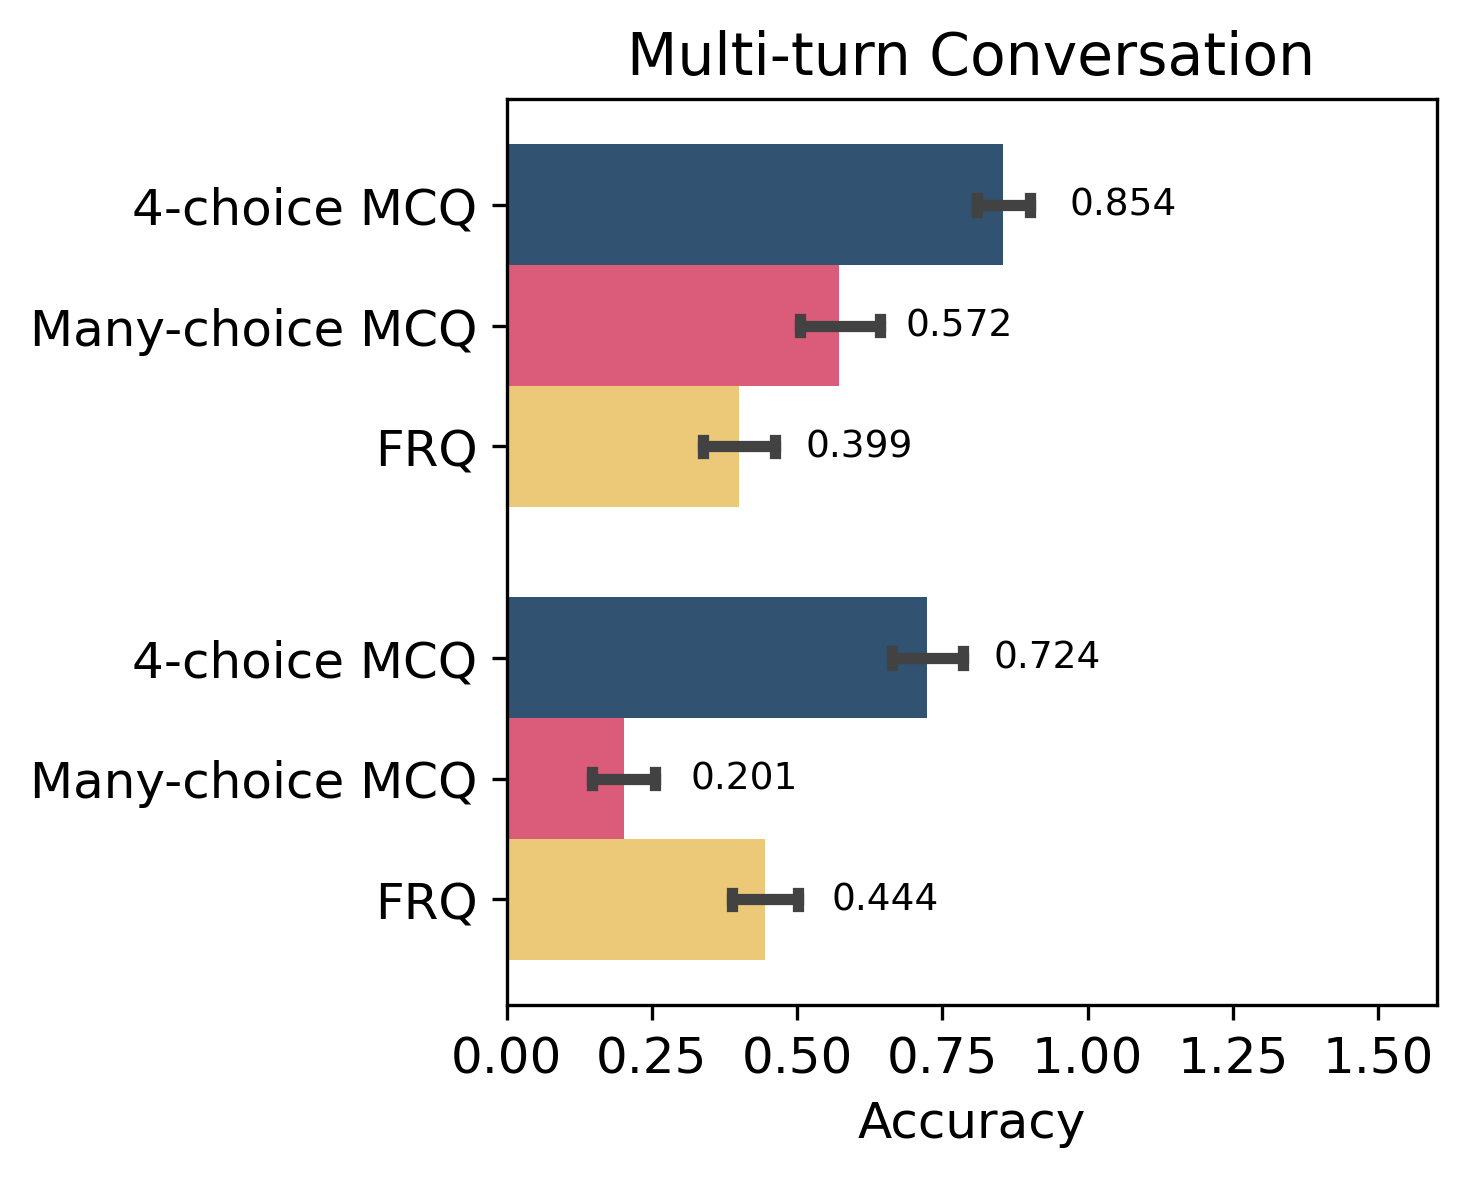

In [44]:
fig, axs = plt.subplots(1,1,figsize=(4,4), dpi=300)

colors = ["#26547c", "#ef476f", "#ffd166"]
exp_order = ["4-choice MCQ", "Many-choice MCQ", "FRQ"]
gpt_order = ["GPT-4", "GPT-3.5"]
sns.barplot(data = plot_df_convo_df, y="GPT_model", x = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette=colors, errorbar='ci', 
            capsize=0.03, orient="h")
for i in range(3):
    axs.bar_label(axs.containers[i], fmt='%.3f', size=9, padding=16)
# axs.legend(bbox_to_anchor=(1.61,1))
axs.get_legend().remove()
axs.set_title("Multi-turn Conversation", size=14)
axs.set_ylabel("")
axs.set_xlabel("Accuracy", size=12)
axs.set_xlim(0,1.6)

yticks = axs.get_yticks()
new_yticks = [yticks[0]-1*bar_width/3, yticks[0], 
              yticks[0]+1*bar_width/3] + [yticks[1]-1*bar_width/3, yticks[1], 
              yticks[1]+1*bar_width/3]
new_yticklabels = exp_order*2
axs.set_yticks(new_yticks)
axs.set_yticklabels(labels = new_yticklabels,size=12, rotation=0)
axs.set_xticklabels(axs.get_xticklabels(),size=12);
# axs.set_xticklabels(axs.get_xticklabels(),size=12)
# axs.set_yticklabels(axs.get_yticklabels(),size=12);

In [45]:
exp_order = ["4-choice MCQ", "Many-choice MCQ", "FRQ"]

tests1 = list(combinations(sorted(set(plot_df_convo_df.loc[plot_df_convo_df.GPT_model=="GPT-4", "experiment"])),2))
tests2 = list(combinations(sorted(set(plot_df_convo_df.loc[plot_df_convo_df.GPT_model=="GPT-3.5", "experiment"])),2))
tests3 = [tuple(sorted(set(plot_df_convo_df[plot_df_convo_df.Experiment_name==x].experiment))) for x in exp_order]

In [46]:
# GPT-4
res1 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"multiturn_PE_MCQ": "4-choice MCQ",
          "multiturn_PE_MCQall": "Many-choice MCQ",
          "multiturn_PE_FRQ": "FRQ"}
count=0
for t in tests1:
    pval = bootstrap_pvalue(plot_df_convo_df.loc[plot_df_convo_df.experiment==t[0], "Accuracy"].values, 
                     plot_df_convo_df.loc[plot_df_convo_df.experiment==t[1], "Accuracy"].values)
    gpt_model = t[0].split("_")[0].upper()
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res1.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res1["corrected_pvalue"] = multipletests(res1["pvalue"],alpha=0.05, method='holm')[1]

# GPT-3.5
res2 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"multiturn_PE_MCQ": "4-choice MCQ",
          "multiturn_PE_MCQall": "Many-choice MCQ",
          "multiturn_PE_FRQ": "FRQ"}
count=0
for t in tests2:
    pval = bootstrap_pvalue(plot_df_convo_df.loc[plot_df_convo_df.experiment==t[0], "Accuracy"].values, 
                     plot_df_convo_df.loc[plot_df_convo_df.experiment==t[1], "Accuracy"].values)
    gpt_model = "GPT-3.5"
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res2.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res2["corrected_pvalue"] = multipletests(res2["pvalue"],alpha=0.05, method='holm')[1]

res = pd.concat([res1,res2])
res.to_csv("./results/statistics/fig3c_stats.tsv", sep="\t")

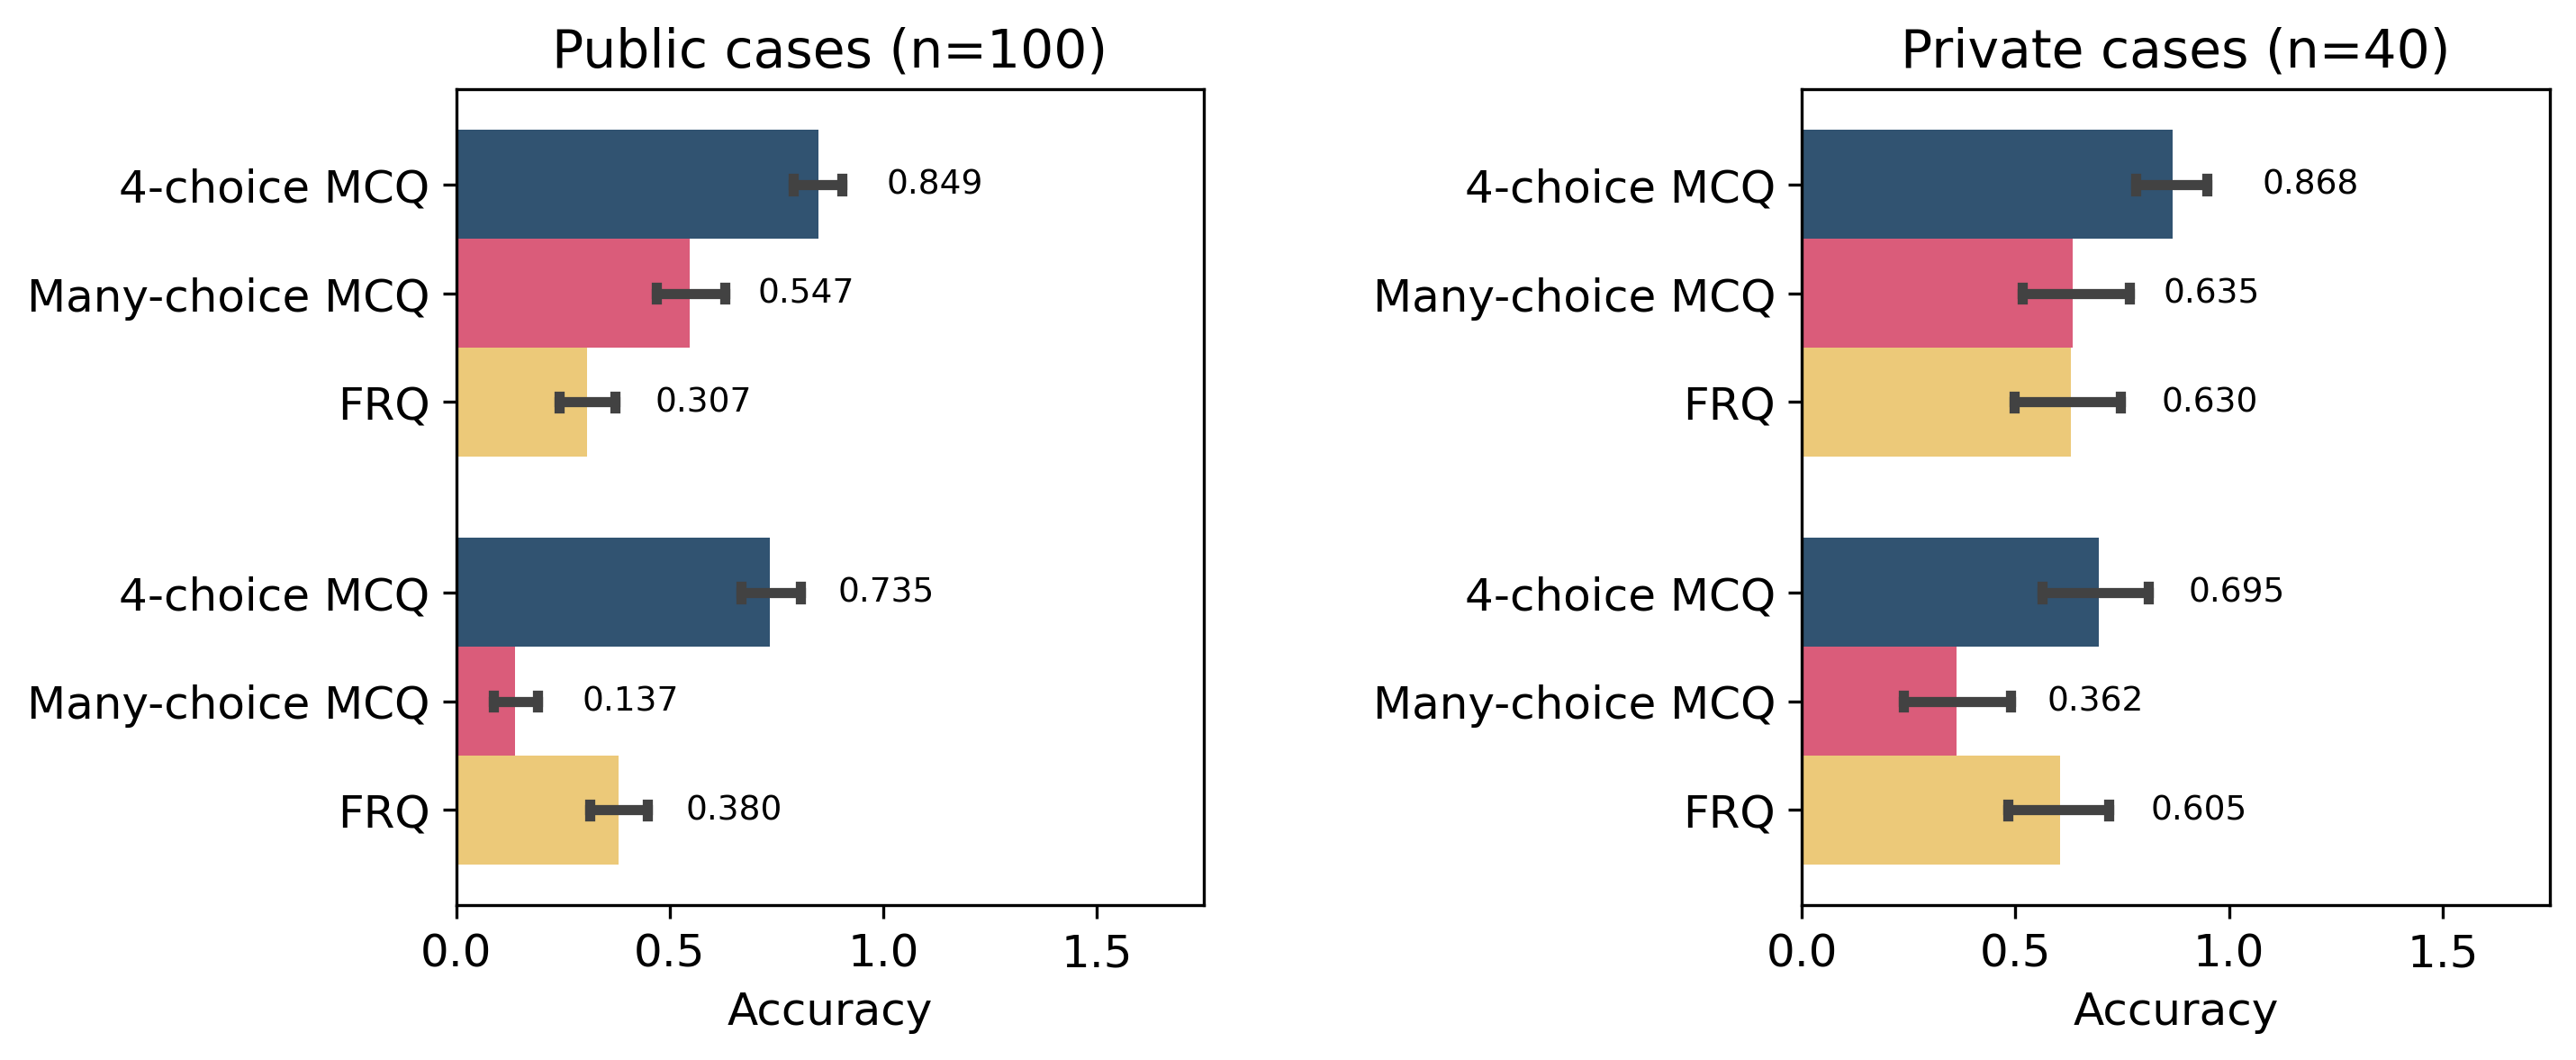

In [47]:
fig, axs = plt.subplots(1,2,figsize=(10,4), dpi=300)

colors = ["#26547c", "#ef476f", "#ffd166"]
exp_order = ["4-choice MCQ", "Many-choice MCQ", "FRQ"]
gpt_order = ["GPT-4", "GPT-3.5"]

public_df = plot_df_convo_df[plot_df_convo_df.case_id.str.contains("public")]
private_df = plot_df_convo_df[plot_df_convo_df.case_id.str.contains("private")]

sns.barplot(data = public_df, y="GPT_model", x = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette=colors, errorbar='ci', 
            capsize=0.03, orient="h", ax=axs[0])
for i in range(3):
    axs[0].bar_label(axs[0].containers[i], fmt='%.3f', size=9, padding=18)
# axs[0].legend(bbox_to_anchor=(1.61,1))
axs[0].get_legend().remove()
axs[0].set_title("Public cases (n=100)", size=14)
axs[0].set_ylabel("")
axs[0].set_xlabel("Accuracy", size=12)
axs[0].set_xlim(0,1.75)

yticks = axs[0].get_yticks()
new_yticks = [yticks[0]-1*bar_width/3, yticks[0], 
              yticks[0]+1*bar_width/3] + [yticks[1]-1*bar_width/3, yticks[1], 
              yticks[1]+1*bar_width/3]
new_yticklabels = exp_order*2
axs[0].set_yticks(new_yticks)
axs[0].set_yticklabels(labels = new_yticklabels,size=12, rotation=0)
axs[0].xaxis.set_tick_params(labelsize=12)
# axs[0].set_xticklabels(axs[0].get_xticklabels(),size=12);
# axs[0].set_xticklabels(axs[0].get_xticklabels(),size=12)
# axs[0].set_yticklabels(axs[0].get_yticklabels(),size=12);

sns.barplot(data = private_df, y="GPT_model", x = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette=colors, errorbar='ci', 
            capsize=0.03, orient="h", ax=axs[1])
for i in range(3):
    axs[1].bar_label(axs[1].containers[i], fmt='%.3f', size=9, padding=24)
# axs[1].legend(bbox_to_anchor=(1.61,1))
axs[1].get_legend().remove()
axs[1].set_title("Private cases (n=40)", size=14)
axs[1].set_ylabel("")
axs[1].set_xlabel("Accuracy", size=12)
axs[1].set_xlim(0,1.75)

yticks = axs[1].get_yticks()
new_yticks = [yticks[0]-1*bar_width/3, yticks[0], 
              yticks[0]+1*bar_width/3] + [yticks[1]-1*bar_width/3, yticks[1], 
              yticks[1]+1*bar_width/3]
new_yticklabels = exp_order*2
axs[1].set_yticks(new_yticks)
axs[1].set_yticklabels(labels = new_yticklabels,size=12, rotation=0)
axs[1].xaxis.set_tick_params(labelsize=12)
# axs[1].set_xticklabels(axs[1].get_xticklabels(),size=12);
# axs[1].set_xticklabels(axs[1].get_xticklabels(),size=12)
# axs[1].set_yticklabels(axs[1].get_yticklabels(),size=12);

# fig.suptitle("Multi-turn conversation", size=16)
fig.subplots_adjust(wspace=0.8)

In [48]:
exp_order = ["4-choice MCQ", "Many-choice MCQ", "FRQ"]

tests1 = list(combinations(sorted(set(public_df.loc[public_df.GPT_model=="GPT-4", "experiment"])),2))
tests2 = list(combinations(sorted(set(public_df.loc[public_df.GPT_model=="GPT-3.5", "experiment"])),2))
tests3 = [tuple(sorted(set(public_df[public_df.Experiment_name==x].experiment))) for x in exp_order]

In [49]:
# GPT-4
res1 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"multiturn_PE_MCQ": "4-choice MCQ",
          "multiturn_PE_MCQall": "Many-choice MCQ",
          "multiturn_PE_FRQ": "FRQ"}
count=0
for t in tests1:
    pval = bootstrap_pvalue(public_df.loc[public_df.experiment==t[0], "Accuracy"].values, 
                     public_df.loc[public_df.experiment==t[1], "Accuracy"].values)
    gpt_model = t[0].split("_")[0].upper()
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res1.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res1["corrected_pvalue"] = multipletests(res1["pvalue"],alpha=0.05, method='holm')[1]

# GPT-3.5
res2 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"multiturn_PE_MCQ": "4-choice MCQ",
          "multiturn_PE_MCQall": "Many-choice MCQ",
          "multiturn_PE_FRQ": "FRQ"}
count=0
for t in tests2:
    pval = bootstrap_pvalue(public_df.loc[public_df.experiment==t[0], "Accuracy"].values, 
                     public_df.loc[public_df.experiment==t[1], "Accuracy"].values)
    gpt_model = "GPT-3.5"
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res2.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res2["corrected_pvalue"] = multipletests(res2["pvalue"],alpha=0.05, method='holm')[1]

res = pd.concat([res1,res2])
res.to_csv("./results/statistics/figs3a_stats.tsv", sep="\t")

In [50]:
exp_order = ["4-choice MCQ", "Many-choice MCQ", "FRQ"]

tests1 = list(combinations(sorted(set(private_df.loc[private_df.GPT_model=="GPT-4", "experiment"])),2))
tests2 = list(combinations(sorted(set(private_df.loc[private_df.GPT_model=="GPT-3.5", "experiment"])),2))
tests3 = [tuple(sorted(set(private_df[private_df.Experiment_name==x].experiment))) for x in exp_order]

In [51]:
# GPT-4
res1 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"multiturn_PE_MCQ": "4-choice MCQ",
          "multiturn_PE_MCQall": "Many-choice MCQ",
          "multiturn_PE_FRQ": "FRQ"}
count=0
for t in tests1:
    pval = bootstrap_pvalue(private_df.loc[private_df.experiment==t[0], "Accuracy"].values, 
                     private_df.loc[private_df.experiment==t[1], "Accuracy"].values)
    gpt_model = t[0].split("_")[0].upper()
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res1.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res1["corrected_pvalue"] = multipletests(res1["pvalue"],alpha=0.05, method='holm')[1]

# GPT-3.5
res2 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"multiturn_PE_MCQ": "4-choice MCQ",
          "multiturn_PE_MCQall": "Many-choice MCQ",
          "multiturn_PE_FRQ": "FRQ"}
count=0
for t in tests2:
    pval = bootstrap_pvalue(private_df.loc[private_df.experiment==t[0], "Accuracy"].values, 
                     private_df.loc[private_df.experiment==t[1], "Accuracy"].values)
    gpt_model = "GPT-3.5"
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res2.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res2["corrected_pvalue"] = multipletests(res2["pvalue"], alpha=0.05, method='holm')[1]

res = pd.concat([res1,res2])
res.to_csv("./results/statistics/figs3b_stats.tsv", sep="\t")

In [52]:
x1 = pd.concat([fd_frq_public_gpt3_df_multiple.mean(), 
                fd_frq_private_gpt3_df_multiple.mean()])
x2 = pd.concat([convo_frq_public_gpt3_df.mean(), 
                convo_frq_private_gpt3_df.mean()])
x3 = pd.concat([agesexpefrq_public_gpt3_df_multiple.mean(), 
                agesexpefrq_private_gpt3_df_multiple.mean()])
x4 = pd.concat([summarisedconvoPEfrq_public_gpt3_df_multiple.mean(), 
                summarisedconvoPEfrq_private_gpt3_df_multiple.mean()])
x5 = pd.concat([vignette_frq_public_gpt3_df_multiple.mean(), 
                vignette_frq_private_gpt3_df_multiple.mean()])

x6 = pd.concat([fd_frq_public_gpt4_df_multiple.sum()/(count_full[:public_dataset.shape[0]]),
                fd_frq_private_gpt4_df_multiple.sum()/(count_full[public_dataset.shape[0]:])])
x7 = pd.concat([convo_frq_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]),
                convo_frq_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])
x8 = pd.concat([agesexpefrq_public_gpt4_df_multiple.mean(), 
                agesexpefrq_private_gpt4_df_multiple.mean()])
x9 = pd.concat([summarisedconvoPEfrq_public_gpt4_df_multiple.sum()/(count_full[:public_dataset.shape[0]]), 
                summarisedconvoPEfrq_private_gpt4_df_multiple.sum()/(count_full[public_dataset.shape[0]:])])
x10 = pd.concat([vignette_frq_public_gpt4_df_multiple.mean(), 
                vignette_frq_private_gpt4_df_multiple.mean()])


plot_df_frq = pd.DataFrame([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10],
                       index=["gpt3_singleturn_PE_frq","gpt3_multiturn_PE_frq",
                              "gpt3_PE_frq","gpt3_summarisedconvo_PE_frq",
                              "gpt3_vignette_frq",
                              "gpt4_singleturn_PE_frq","gpt4_multiturn_PE_frq",
                              "gpt4_PE_frq", "gpt4_summarisedconvo_PE_frq", 
                              "gpt4_vignette_frq"]).T

In [53]:
plot_df_frq_df = pd.DataFrame(plot_df_frq.stack()).reset_index()
plot_df_frq_df.columns = ["case_id", "experiment", "Accuracy"]
plot_df_frq_df["GPT_model"] = plot_df_frq_df.experiment.apply(lambda x: x.split("_")[0])
plot_df_frq_df["Experiment_name"] = plot_df_frq_df.experiment.apply(lambda x: "_".join(x.split("_")[1:]))
plot_df_frq_df.columns = ["case_id", "experiment", "Accuracy", "GPT_model", "Experiment_name"]

mapper1 = {"gpt3":"GPT-3.5", "gpt4":"GPT-4"}
mapper2 = {"singleturn_PE_frq": "Single-turn conversation",
          "multiturn_PE_frq": "Multi-turn conversation",
          "summarisedconvo_PE_frq": "Summarized conversation",
          "vignette_frq": "Vignette",
          "PE_frq": "Physical Exam"
         }

plot_df_frq_df["GPT_model"] = plot_df_frq_df.GPT_model.map(mapper1)
plot_df_frq_df["Experiment_name"] = plot_df_frq_df.Experiment_name.map(mapper2)
plot_df_frq_df

,case_id,experiment,Accuracy,GPT_model,Experiment_name
0,public_case01,gpt3_singleturn_PE_frq,0.0,GPT-3.5,Single-turn conversation
1,public_case01,gpt3_multiturn_PE_frq,0.0,GPT-3.5,Multi-turn conversation
2,public_case01,gpt3_PE_frq,0.4,GPT-3.5,Physical Exam
3,public_case01,gpt3_summarisedconvo_PE_frq,0.0,GPT-3.5,Summarized conversation
4,public_case01,gpt3_vignette_frq,0.2,GPT-3.5,Vignette
...,...,...,...,...,...
1395,private_case40,gpt4_singleturn_PE_frq,1.0,GPT-4,Single-turn conversation
1396,private_case40,gpt4_multiturn_PE_frq,0.9,GPT-4,Multi-turn conversation
1397,private_case40,gpt4_PE_frq,1.0,GPT-4,Physical Exam
1398,private_case40,gpt4_summarisedconvo_PE_frq,1.0,GPT-4,Summarized conversation


/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/1514747647.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticklabels(),size=12);
/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/1514747647.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticklabels(),size=12);


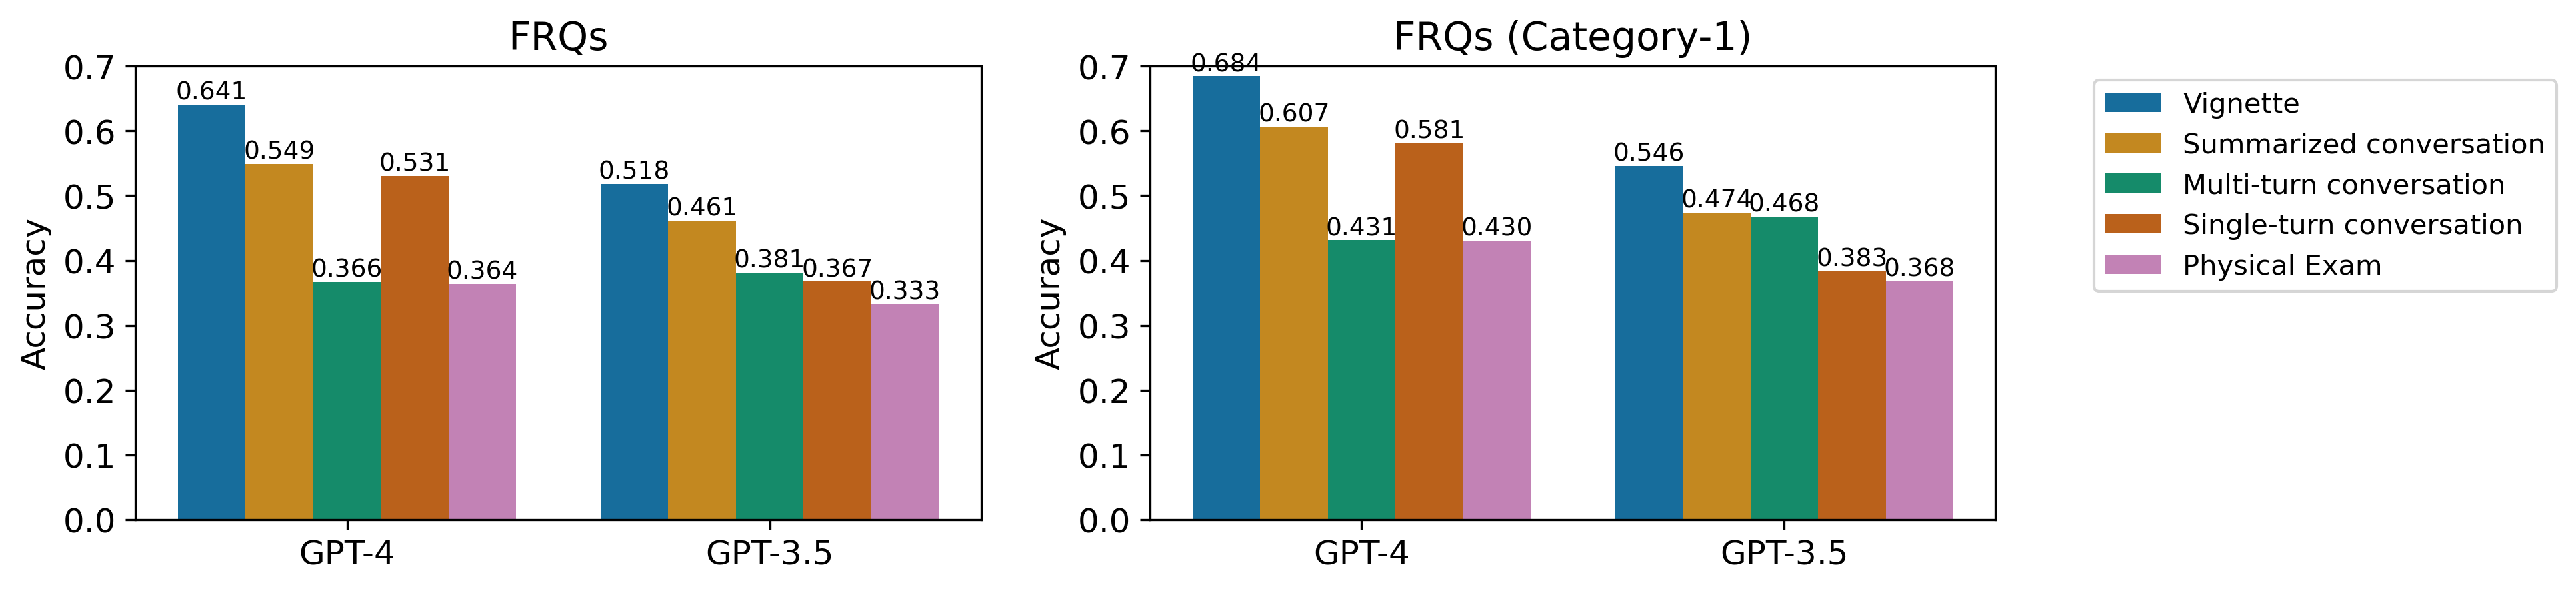

In [54]:
fig, axs = plt.subplots(1,2,figsize=(12,3), dpi=300)

exp_order = ["Vignette", "Summarized conversation", 
             "Multi-turn conversation", "Single-turn conversation", 
             "Physical Exam"]
gpt_order = ["GPT-4", "GPT-3.5"]
sns.barplot(data = plot_df_frq_df, x="GPT_model", y = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette="colorblind", errorbar=None, ax=axs[0])
for i in range(5):
    axs[0].bar_label(axs[0].containers[i], fmt='%.3f', size=9)
axs[0].get_legend().remove()
axs[0].set_title("FRQs", size=14)
axs[0].set_xlabel("")
axs[0].set_ylabel("Accuracy", size=12)
axs[0].set_ylim(0,0.7)
axs[0].set_xticklabels(axs[0].get_xticklabels(),size=12)
axs[0].set_yticklabels(axs[0].get_yticklabels(),size=12);

sns.barplot(data = plot_df_frq_df[plot_df_frq_df.case_id.isin(dmap1["category1"])], 
            x="GPT_model", y = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette="colorblind", errorbar=None, ax=axs[1])
for i in range(5):
    axs[1].bar_label(axs[1].containers[i], fmt='%.3f', size=9)
axs[1].legend(bbox_to_anchor=(1.1,1))
axs[1].set_title("FRQs (Category-1)", size=14)
axs[1].set_xlabel("")
axs[1].set_ylabel("Accuracy", size=12)
axs[1].set_ylim(0,0.7)
axs[1].set_xticklabels(axs[1].get_xticklabels(),size=12)
axs[1].set_yticklabels(axs[1].get_yticklabels(),size=12);

/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/3745386217.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels(),size=12);


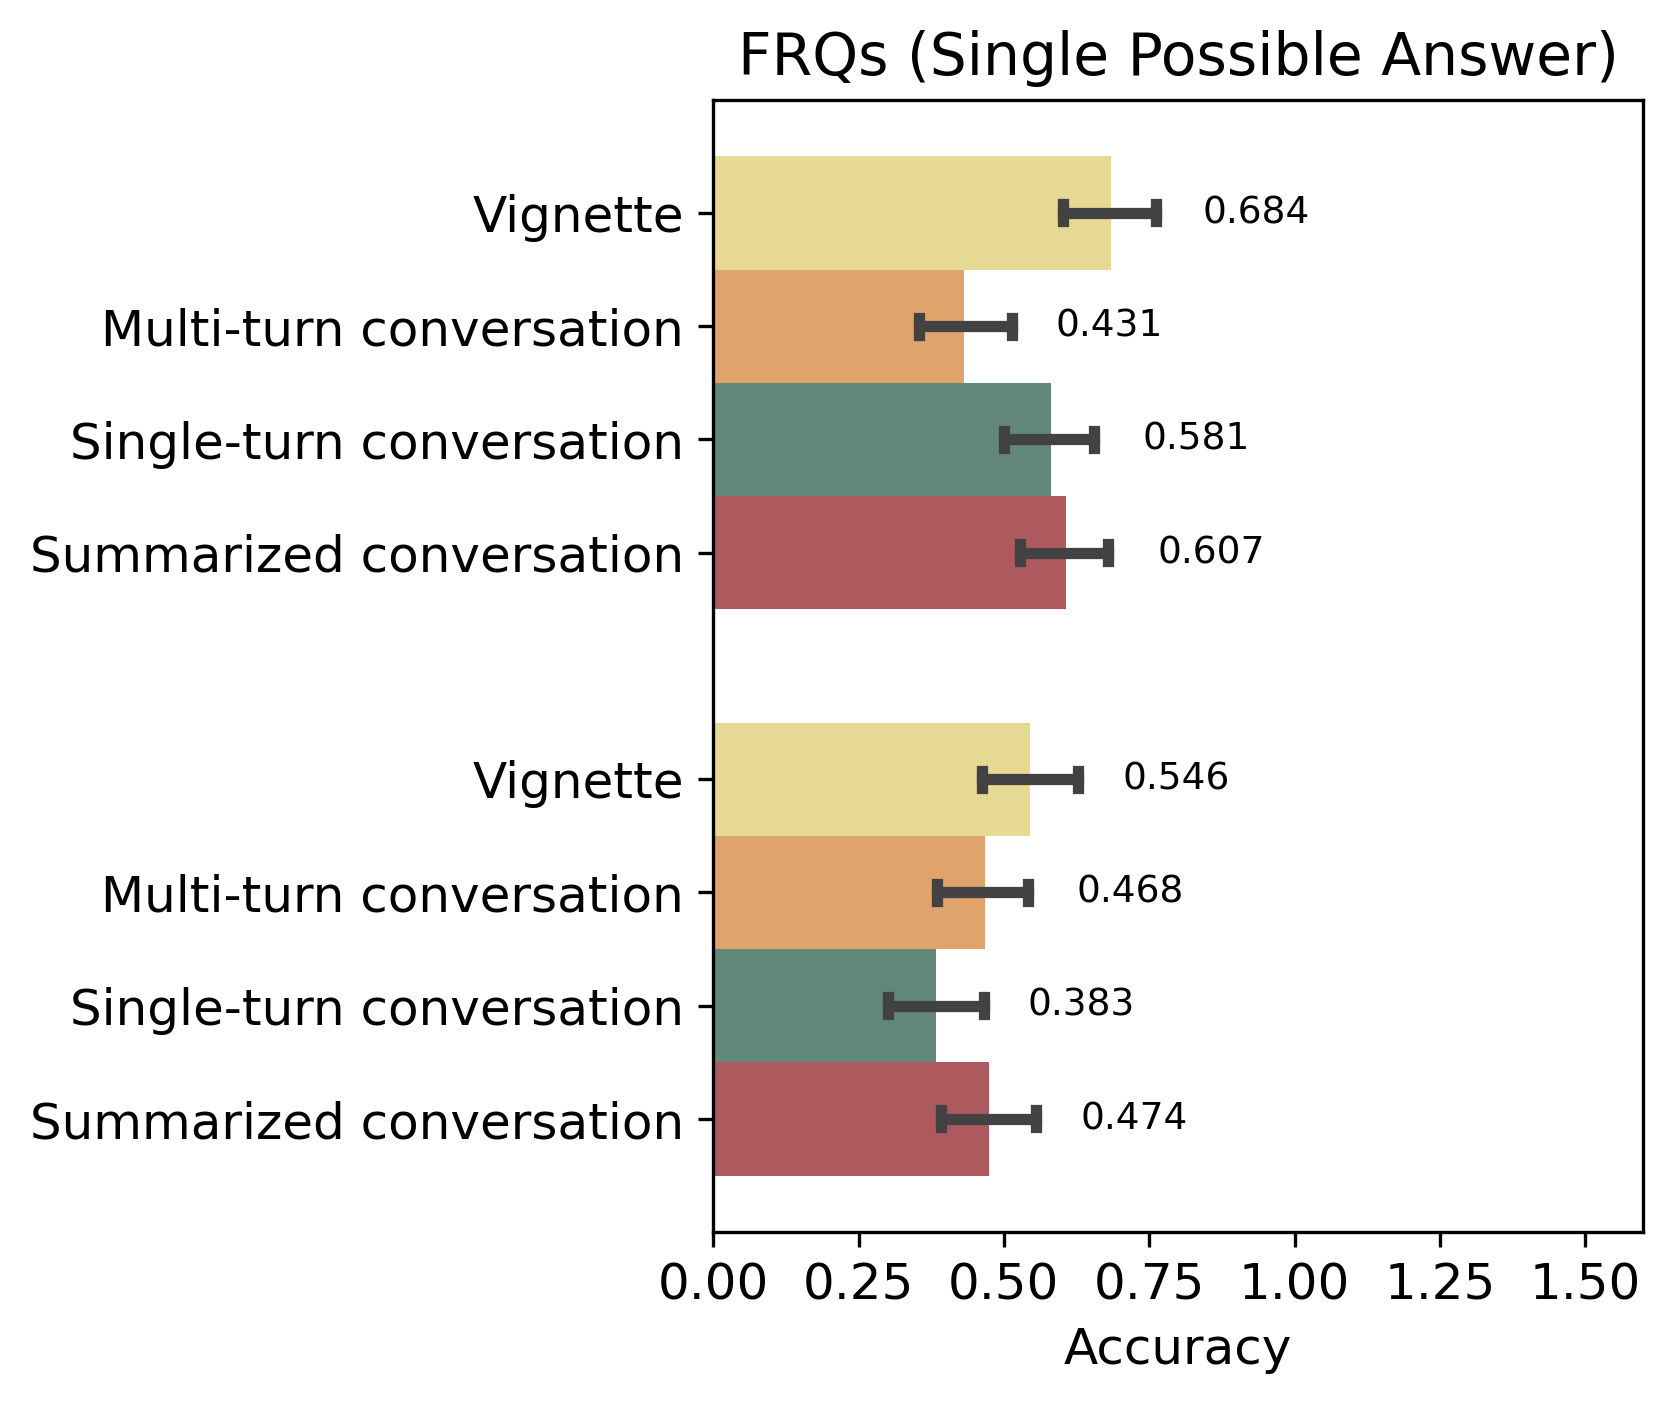

In [55]:
fig, axs = plt.subplots(1,1,figsize=(4,5), dpi=300)

bar_width=0.8
# colors=["#8cb369", "#f4e285", "#f4a259", "#5b8e7d", "#bc4b51"]
colors = ["#f4e285", "#f4a259", "#5b8e7d", "#bc4b51"]
exp_order = ["Vignette", "Multi-turn conversation", 
             "Single-turn conversation", "Summarized conversation"]
gpt_order = ["GPT-4", "GPT-3.5"]

sns.barplot(data = plot_df_frq_df[plot_df_frq_df.case_id.isin(dmap1["category1"])], 
            y="GPT_model", x = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette=colors, errorbar='ci', 
            orient="h", capsize=0.03, width=bar_width, ax=axs)
for i in range(4):
    axs.bar_label(axs.containers[i], fmt='%.3f', size=9, padding=22)
# axs.legend(bbox_to_anchor=(1.55,1))
axs.get_legend().remove()
axs.set_title("FRQs (Single Possible Answer)", size=14)
axs.set_ylabel("")
axs.set_xlabel("Accuracy", size=12)
axs.set_xlim(0,1.6)
# axs.set_xticklabels(axs.get_xticklabels(),size=12)
# axs.set_yticklabels(axs.get_yticklabels(),size=12);

yticks = axs.get_yticks()
new_yticks = [yticks[0]-1.5*bar_width/4, yticks[0]-0.5*bar_width/4, 
              yticks[0]+0.5*bar_width/4, yticks[0]+1.5*bar_width/4] + [yticks[1]-1.5*bar_width/4, yticks[1]-0.5*bar_width/4, 
              yticks[1]+0.5*bar_width/4, yticks[1]+1.5*bar_width/4]
new_yticklabels = exp_order*2
axs.set_yticks(new_yticks)
axs.set_yticklabels(labels = new_yticklabels,size=12, rotation=0)
axs.set_xticklabels(axs.get_xticklabels(),size=12);

In [56]:
exp_order = ["Vignette", "Multi-turn conversation", 
             "Single-turn conversation", "Summarized conversation", "Physical Exam"]

plot_df_frq_df_category1 = plot_df_frq_df[plot_df_frq_df.case_id.isin(dmap1["category1"])]
tests1 = list(combinations(sorted(set(plot_df_frq_df_category1.loc[plot_df_frq_df_category1.GPT_model=="GPT-4", "experiment"])),2))
tests2 = list(combinations(sorted(set(plot_df_frq_df_category1.loc[plot_df_frq_df_category1.GPT_model=="GPT-3.5", "experiment"])),2))
tests3 = [tuple(sorted(set(plot_df_frq_df_category1[plot_df_frq_df_category1.Experiment_name==x].experiment))) for x in exp_order]

In [57]:
# GPT-4
res1 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_frq": "Single-turn conversation",
          "multiturn_PE_frq": "Multi-turn conversation",
          "summarisedconvo_PE_frq": "Summarized conversation",
          "vignette_frq": "Vignette",
          "PE_frq": "Physical Exam"
         }
count=0
for t in tests1:
    pval = bootstrap_pvalue(plot_df_frq_df_category1.loc[plot_df_frq_df_category1.experiment==t[0], "Accuracy"].values, 
                     plot_df_frq_df_category1.loc[plot_df_frq_df_category1.experiment==t[1], "Accuracy"].values)
    gpt_model = t[0].split("_")[0].upper()
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res1.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res1["corrected_pvalue"] = multipletests(res1["pvalue"],alpha=0.05, method='holm')[1]

# GPT-3.5
res2 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_frq": "Single-turn conversation",
          "multiturn_PE_frq": "Multi-turn conversation",
          "summarisedconvo_PE_frq": "Summarized conversation",
          "vignette_frq": "Vignette",
          "PE_frq": "Physical Exam"
         }
count=0
for t in tests2:
    pval = bootstrap_pvalue(plot_df_frq_df_category1.loc[plot_df_frq_df_category1.experiment==t[0], "Accuracy"].values, 
                     plot_df_frq_df_category1.loc[plot_df_frq_df_category1.experiment==t[1], "Accuracy"].values)
    gpt_model = "GPT-3.5"
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res2.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res2["corrected_pvalue"] = multipletests(res2["pvalue"],alpha=0.05, method='holm')[1]

res = pd.concat([res1,res2])
res.to_csv("./results/statistics/fig3d.tsv", sep="\t")

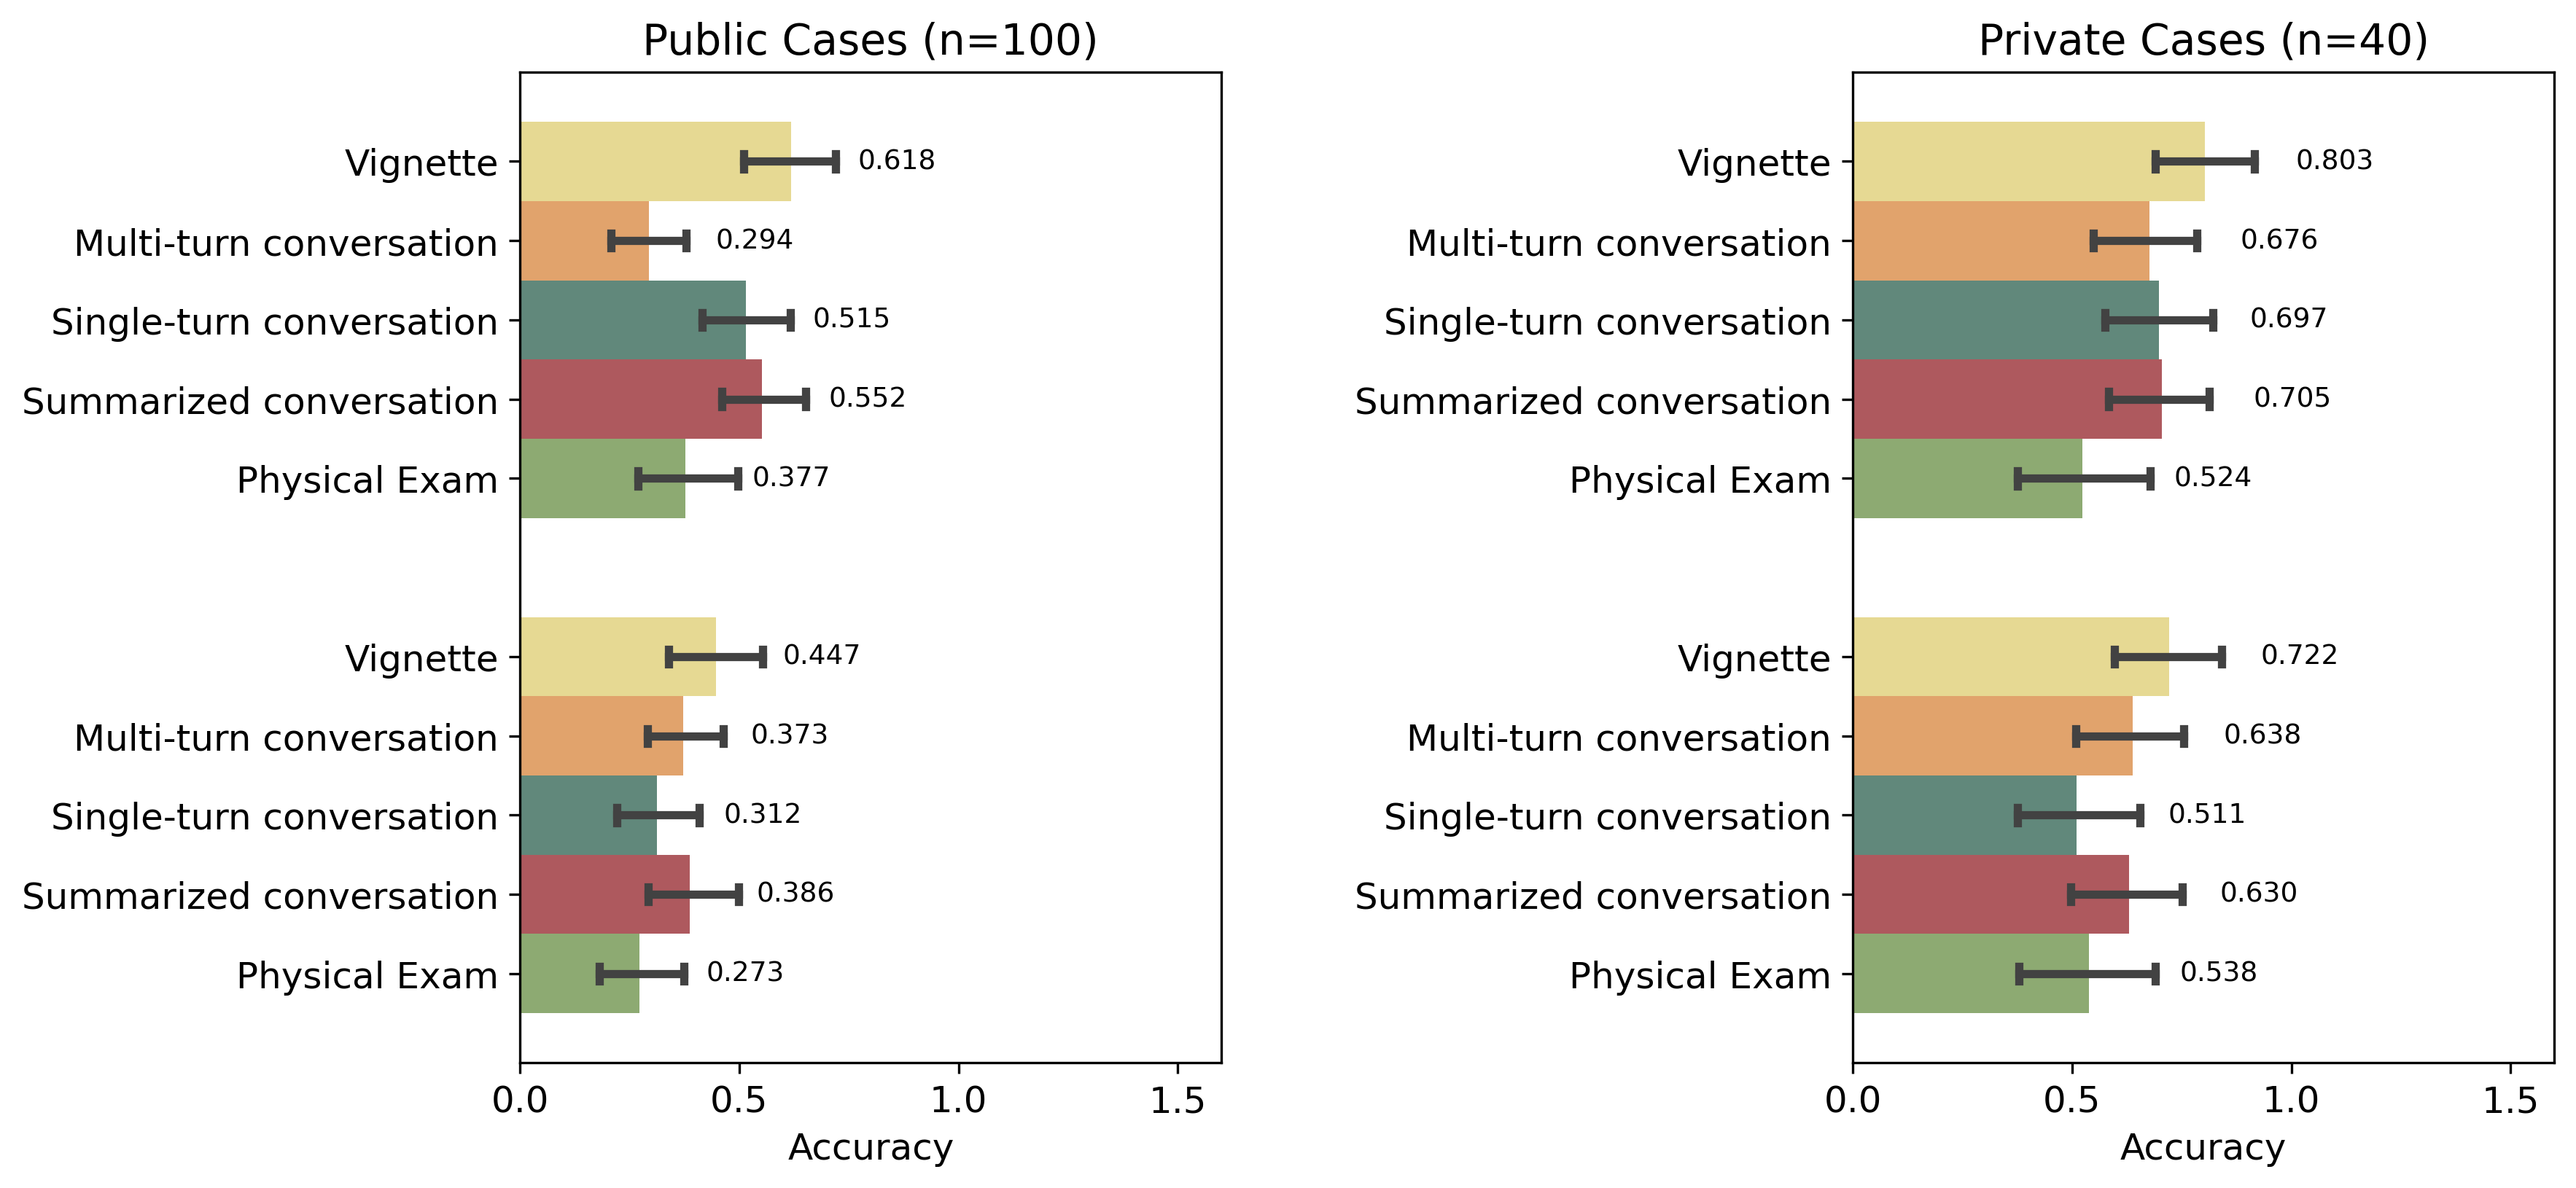

In [58]:
fig, axs = plt.subplots(1,2,figsize=(12,6), dpi=300)
# colors=[", "#f4e285", "#f4a259", "#5b8e7d", "#bc4b51"]
bar_width = 0.8
colors=["#f4e285", "#f4a259", "#5b8e7d", "#bc4b51", "#8cb369"]

exp_order = ["Vignette", "Multi-turn conversation", 
             "Single-turn conversation", "Summarized conversation", "Physical Exam"]
gpt_order = ["GPT-4", "GPT-3.5"]

public_df = plot_df_frq_df[(plot_df_frq_df.case_id.isin(dmap1["category1"])) & (plot_df_frq_df.case_id.str.contains("public"))]
private_df = plot_df_frq_df[(plot_df_frq_df.case_id.isin(dmap1["category1"])) & (plot_df_frq_df.case_id.str.contains("private"))]
sns.barplot(data = public_df, y="GPT_model", x = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette=colors, errorbar='ci',
            capsize = 0.03, width=bar_width, ax=axs[0])
for i in range(len(exp_order)):
    axs[0].bar_label(axs[0].containers[i], fmt='%.3f', size=9, padding=22)
# axs[0].legend(bbox_to_anchor=(1.05,1))
axs[0].get_legend().remove()
axs[0].set_title("Public Cases (n=100)", size=14)
axs[0].set_ylabel("")
axs[0].set_xlabel("Accuracy", size=12)
axs[0].set_xlim(0,1.6)
yticks = axs[0].get_yticks()
new_yticks = [yticks[0]-2*bar_width/5, yticks[0]-1*bar_width/5, yticks[0], yticks[0]+1*bar_width/5, 
              yticks[0]+2*bar_width/5] + [yticks[1]-2*bar_width/5, yticks[1]-1*bar_width/5, yticks[1], 
              yticks[1]+1*bar_width/5, yticks[1]+2*bar_width/5]
new_yticklabels = exp_order*2
axs[0].set_yticks(new_yticks)
axs[0].set_yticklabels(labels = new_yticklabels,size=12)
# axs[0].set_xticklabels(axs[0].get_xticklabels(),size=12)
axs[0].xaxis.set_tick_params(labelsize=12)

sns.barplot(data = private_df, y="GPT_model", x = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette=colors, errorbar='ci',
            capsize = 0.03, width=bar_width, ax=axs[1])
# padding_list = [20, 24, 23, 20, 34]
for i in range(len(exp_order)):
    axs[1].bar_label(axs[1].containers[i], fmt='%.3f', size=9, padding=30)
# axs[1].legend(bbox_to_anchor=(1.05,1))
axs[1].get_legend().remove()
axs[1].set_title("Private Cases (n=40)", size=14)
axs[1].set_ylabel("")
axs[1].set_xlabel("Accuracy", size=12)
axs[1].set_xlim(0,1.6)
yticks = axs[1].get_yticks()
new_yticks = [yticks[0]-2*bar_width/5, yticks[0]-1*bar_width/5, yticks[0], yticks[0]+1*bar_width/5, 
              yticks[0]+2*bar_width/5] + [yticks[1]-2*bar_width/5, yticks[1]-1*bar_width/5, yticks[1], 
              yticks[1]+1*bar_width/5, yticks[1]+2*bar_width/5]
new_yticklabels = exp_order*2
axs[1].set_yticks(new_yticks)
axs[1].set_yticklabels(labels = new_yticklabels,size=12)
# axs[1].set_xticklabels(axs[1].get_xticklabels(),size=12);
axs[1].xaxis.set_tick_params(labelsize=12)

fig.subplots_adjust(wspace=0.9)

In [59]:
exp_order = ["Vignette", "Multi-turn conversation", 
             "Single-turn conversation", "Summarized conversation", "Physical Exam"]

public_df = plot_df_frq_df[((plot_df_frq_df.case_id.isin(dmap1["category1"])) & (plot_df_frq_df.case_id.str.contains("public")))]
tests1 = list(combinations(sorted(set(public_df.loc[public_df.GPT_model=="GPT-4", "experiment"])),2))
tests2 = list(combinations(sorted(set(public_df.loc[public_df.GPT_model=="GPT-3.5", "experiment"])),2))
tests3 = [tuple(sorted(set(public_df[public_df.Experiment_name==x].experiment))) for x in exp_order]

In [60]:
# GPT-4
res1 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_frq": "Single-turn conversation",
          "multiturn_PE_frq": "Multi-turn conversation",
          "summarisedconvo_PE_frq": "Summarized conversation",
          "vignette_frq": "Vignette",
          "PE_frq": "Physical Exam"
         }
count=0
for t in tests1:
    pval = bootstrap_pvalue(public_df.loc[public_df.experiment==t[0], "Accuracy"].values, 
                     public_df.loc[public_df.experiment==t[1], "Accuracy"].values)
    gpt_model = t[0].split("_")[0].upper()
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res1.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res1["corrected_pvalue"] = multipletests(res1["pvalue"],alpha=0.05, method='holm')[1]

# GPT-3.5
res2 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_frq": "Single-turn conversation",
          "multiturn_PE_frq": "Multi-turn conversation",
          "summarisedconvo_PE_frq": "Summarized conversation",
          "vignette_frq": "Vignette",
          "PE_frq": "Physical Exam"
         }
count=0
for t in tests2:
    pval = bootstrap_pvalue(public_df.loc[public_df.experiment==t[0], "Accuracy"].values, 
                     public_df.loc[public_df.experiment==t[1], "Accuracy"].values)
    gpt_model = "GPT-3.5"
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res2.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res2["corrected_pvalue"] = multipletests(res2["pvalue"],alpha=0.05, method='holm')[1]

res = pd.concat([res1,res2])
res.to_csv("./results/statistics/figs3c_stats.tsv", sep="\t")

In [61]:
exp_order = ["Vignette", "Multi-turn conversation", 
             "Single-turn conversation", "Summarized conversation", "Physical Exam"]

private_df = plot_df_frq_df[((plot_df_frq_df.case_id.isin(dmap1["category1"])) & (plot_df_frq_df.case_id.str.contains("private")))]
tests1 = list(combinations(sorted(set(private_df.loc[private_df.GPT_model=="GPT-4", "experiment"])),2))
tests2 = list(combinations(sorted(set(private_df.loc[private_df.GPT_model=="GPT-3.5", "experiment"])),2))
tests3 = [tuple(sorted(set(private_df[private_df.Experiment_name==x].experiment))) for x in exp_order]

In [62]:
# GPT-4
res1 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_frq": "Single-turn conversation",
          "multiturn_PE_frq": "Multi-turn conversation",
          "summarisedconvo_PE_frq": "Summarized conversation",
          "vignette_frq": "Vignette",
          "PE_frq": "Physical Exam"
         }
count=0
for t in tests1:
    pval = bootstrap_pvalue(private_df.loc[private_df.experiment==t[0], "Accuracy"].values, 
                     private_df.loc[private_df.experiment==t[1], "Accuracy"].values)
    gpt_model = t[0].split("_")[0].upper()
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res1.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res1["corrected_pvalue"] = multipletests(res1["pvalue"],alpha=0.05, method='holm')[1]

# GPT-3.5
res2 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"singleturn_PE_frq": "Single-turn conversation",
          "multiturn_PE_frq": "Multi-turn conversation",
          "summarisedconvo_PE_frq": "Summarized conversation",
          "vignette_frq": "Vignette",
          "PE_frq": "Physical Exam"
         }
count=0
for t in tests2:
    pval = bootstrap_pvalue(private_df.loc[private_df.experiment==t[0], "Accuracy"].values, 
                     private_df.loc[private_df.experiment==t[1], "Accuracy"].values)
    gpt_model = "GPT-3.5"
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res2.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res2["corrected_pvalue"] = multipletests(res2["pvalue"],alpha=0.05, method='holm')[1]

res = pd.concat([res1,res2])
res.to_csv("./results/statistics/figs3d_stats.tsv", sep="\t")

(0.0, 1.0)

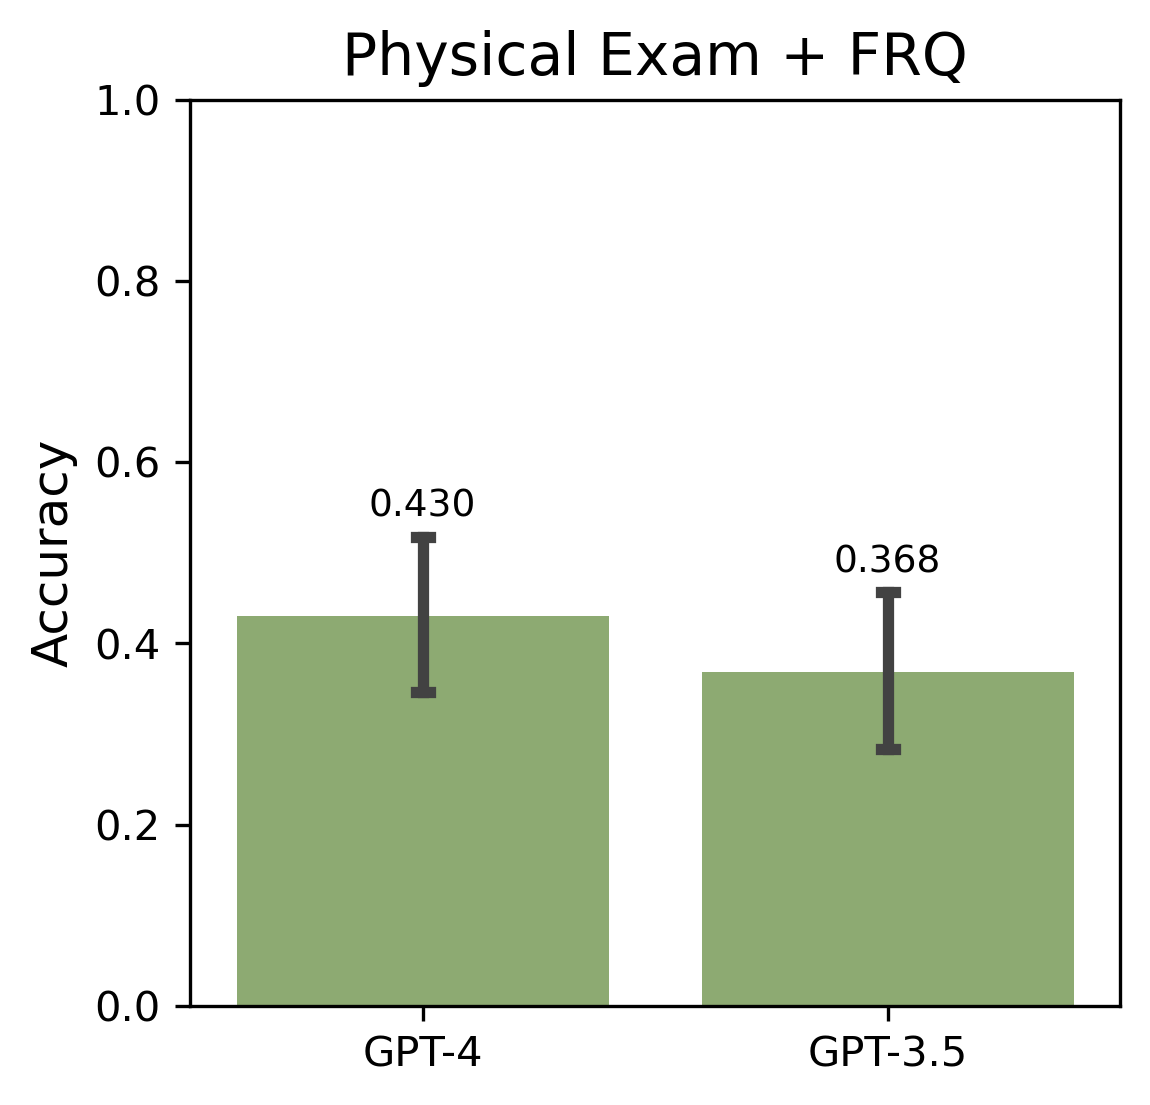

In [63]:
fig, axs = plt.subplots(1,1,figsize=(4,4), dpi=300)
colors=["#8cb369", "#f4e285", "#f4a259", "#5b8e7d", "#bc4b51"]
bar_width = 0.8
# colors=["#f4e285", "#f4a259", "#5b8e7d", "#bc4b51"]

exp_order = ["Physical Exam"]
gpt_order = ["GPT-4", "GPT-3.5"]
sns.barplot(data = plot_df_frq_df[plot_df_frq_df.case_id.isin(dmap1["category1"])], 
            x="GPT_model", y = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette=colors, errorbar='ci',
            capsize = 0.03,
            width=bar_width)
for i in range(len(exp_order)):
    axs.bar_label(axs.containers[i], fmt='%.3f', size=9, padding=22)
# axs.legend(bbox_to_anchor=(1.05,1))
axs.get_legend().remove()
axs.set_title("Physical Exam + FRQ", size=14)
axs.set_xlabel("")
axs.set_ylabel("Accuracy", size=12)
axs.set_ylim(0,1)
# yticks = axs.get_yticks()
# new_yticks = [yticks[0]-2*bar_width/5, yticks[0]-1*bar_width/5, yticks[0],  
#               yticks[0]+1*bar_width/5, yticks[0]+2*bar_width/5] + [yticks[1]-2*bar_width/5, yticks[1]-1*bar_width/5, 
#               yticks[1], yticks[1]+1*bar_width/5, yticks[1]+2*bar_width/5]
# new_yticklabels = exp_order*2
# axs.set_yticks(new_yticks)
# axs.set_yticklabels(labels = new_yticklabels,size=12)
# axs.set_xticklabels(axs.get_xticklabels(),size=12);

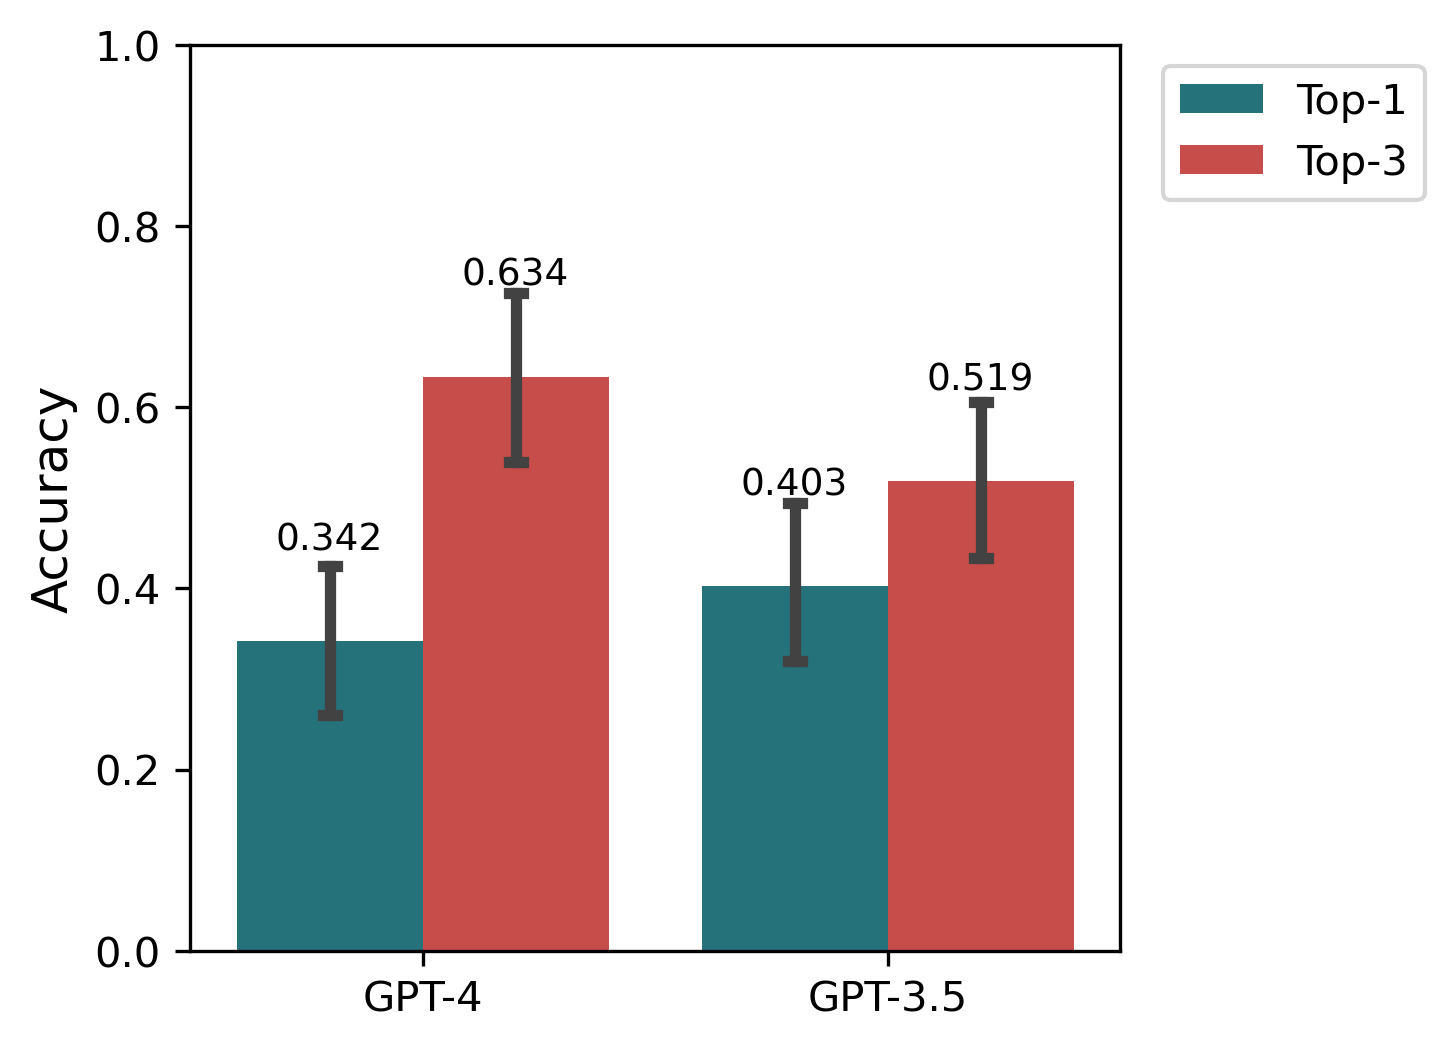

In [64]:
cidx = sorted(set(dmap1["category1"]).intersection(top3convoPE_gpt4_df))

df1 = plot_df_frq_df[((plot_df_frq_df.case_id.isin(cidx)) 
                   & (plot_df_frq_df.experiment=="gpt4_multiturn_PE_frq"))][["case_id","Accuracy","GPT_model"]]
df1["topk"] = "Top-1"

df2 = plot_df_frq_df[((plot_df_frq_df.case_id.isin(cidx)) 
                   & (plot_df_frq_df.experiment=="gpt3_multiturn_PE_frq"))][["case_id","Accuracy","GPT_model"]]
df2["topk"] = "Top-1"

df3 = pd.DataFrame(top3convoPE_gpt4_df.mean()[cidx]).reset_index()
df3.columns = ["case_id", "Accuracy"]
df3["GPT_model"] = "GPT-4"
df3["topk"] = "Top-3"

df4 = pd.DataFrame(top3convoPE_gpt3_df.mean()[cidx]).reset_index()
df4.columns = ["case_id", "Accuracy"]
df4["GPT_model"] = "GPT-3.5"
df4["topk"] = "Top-3"

plot_top3 = pd.concat([df1,df2,df3,df4])
fig, axs = plt.subplots(1,1, figsize=(4,4), dpi=300)

colors=["#177e89", "#db3a34"]
sns.barplot(data = plot_top3, x="GPT_model", y="Accuracy", hue="topk", 
            order=["GPT-4", "GPT-3.5"], hue_order=["Top-1", "Top-3"], 
            palette=colors, capsize=0.03)

for i in range(2):
    axs.bar_label(axs.containers[i], fmt='%.3f', size=9, padding=20)

axs.set_ylim(0,1)
axs.set_xlabel("")
axs.set_ylabel("Accuracy", size=12)
axs.legend(bbox_to_anchor=(1.35,1))

### Dermatologist annotations analysis

In [65]:
derm_annots_gpt3 = pd.read_csv("./results/expert_annotations/dermatologist_analysis_conversation_PE_frq_gpt3.tsv",sep="\t", index_col=0)
derm_annots_gpt3 = derm_annots_gpt3.drop("notes",axis=1).dropna(axis=0)
for col in derm_annots_gpt3.columns[1:]:
    if col!="q4":
        derm_annots_gpt3[col] = derm_annots_gpt3[col].map({"Yes":1, "No":0})
    else:
        derm_annots_gpt3[col] = derm_annots_gpt3[col].map({"Yes":0, "No":1})

derm_annots_gpt3.columns = ["trial_id", "diagnosis_possible_from_conversation", 
                    "complete_med_history", "medical_terminology"]

derm_annots_gpt3["singleturn_frq"]=None
derm_annots_gpt3["multiturn_frq"]=None
derm_annots_gpt3["onlyPE_frq"]=None
derm_annots_gpt3["summarizedconvo_frq"]=None
derm_annots_gpt3["vignette_frq"]=None
derm_annots_gpt3["top3convoPE_frq"]=None

for case_id in derm_annots_gpt3.index:
    trial_id = derm_annots_gpt3.loc[case_id,"trial_id"]
    if case_id.split("_")[0]=="public":
        derm_annots_gpt3.loc[case_id,"singleturn_frq"] = fd_frq_public_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"multiturn_frq"] = convo_frq_public_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"onlyPE_frq"] = agesexpefrq_public_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"summarizedconvo_frq"] = summarisedconvoPEfrq_public_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"vignette_frq"] = vignette_frq_public_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"top3convoPE_frq"] = top3convoPE_gpt3_df[case_id][trial_id]
    elif case_id.split("_")[0]=="private":
        derm_annots_gpt3.loc[case_id,"singleturn_frq"] = fd_frq_private_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"multiturn_frq"] = convo_frq_private_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"onlyPE_frq"] = agesexpefrq_private_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"summarizedconvo_frq"] = summarisedconvoPEfrq_private_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"vignette_frq"] = vignette_frq_private_gpt3_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt3.loc[case_id,"top3convoPE_frq"] = top3convoPE_gpt3_df[case_id][trial_id]
derm_annots_gpt3["category"] = derm_annots_gpt3.index.map(dmap2)
# derm_annots_gpt3

In [66]:
derm_annots_gpt4 = pd.read_csv("./results/expert_annotations/dermatologist_analysis_conversation_PE_frq_gpt4.tsv",sep="\t", index_col=0)
derm_annots_gpt4 = derm_annots_gpt4.drop("notes",axis=1).dropna(axis=0)
for col in derm_annots_gpt4.columns[1:]:
    if col!="q4":
        derm_annots_gpt4[col] = derm_annots_gpt4[col].map({"Yes":1, "No":0})
    else:
        derm_annots_gpt4[col] = derm_annots_gpt4[col].map({"Yes":0, "No":1})

derm_annots_gpt4.columns = ["trial_id", "diagnosis_possible_from_conversation", 
                    "complete_med_history", "medical_terminology"]

derm_annots_gpt4["singleturn_frq"]=None
derm_annots_gpt4["multiturn_frq"]=None
derm_annots_gpt4["onlyPE_frq"]=None
derm_annots_gpt4["summarizedconvo_frq"]=None
derm_annots_gpt4["vignette_frq"]=None
derm_annots_gpt4["top3convoPE_frq"]=None

for case_id in derm_annots_gpt4.index:
    trial_id = derm_annots_gpt4.loc[case_id,"trial_id"]
    if case_id.split("_")[0]=="public":
        derm_annots_gpt4.loc[case_id,"singleturn_frq"] = fd_frq_public_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"multiturn_frq"] = convo_frq_public_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"onlyPE_frq"] = agesexpefrq_public_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"summarizedconvo_frq"] = summarisedconvoPEfrq_public_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"vignette_frq"] = vignette_frq_public_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"top3convoPE_frq"] = int(top3convoPE_gpt4_df[case_id][trial_id])
    elif case_id.split("_")[0]=="private":
        derm_annots_gpt4.loc[case_id,"singleturn_frq"] = fd_frq_private_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"multiturn_frq"] = convo_frq_private_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"onlyPE_frq"] = agesexpefrq_private_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"summarizedconvo_frq"] = summarisedconvoPEfrq_private_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"vignette_frq"] = vignette_frq_private_gpt4_df[case_id][int(trial_id.split("_")[1])]
        derm_annots_gpt4.loc[case_id,"top3convoPE_frq"] = int(top3convoPE_gpt4_df[case_id][trial_id])
derm_annots_gpt4["category"] = derm_annots_gpt4.index.map(dmap2)
# derm_annots_gpt4

In [67]:
# fig, axs = plt.subplots(1,5, figsize=(15,5), dpi=300)

plot_df = pd.DataFrame(columns=["experiment", "medical_history", "diagnosis", "proportion", "GPT_model"])

medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]
experiment = ["vignette_frq", "multiturn_frq", "singleturn_frq", "summarizedconvo_frq", "onlyPE_frq"]

count = 0
for exp in experiment:
    tot = derm_annots_gpt3.shape[0]
    
    # complete medical history, correct diagnosis
    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==1) & (derm_annots_gpt3[exp]==1)].shape[0]
    plot_df.loc[count, ]= [exp, "complete", "correct", r/tot, "GPT-3.5"]
    count+=1
    
    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==1) & (derm_annots_gpt3[exp]==0)].shape[0]
    plot_df.loc[count, ]= [exp, "complete", "incorrect", r/tot, "GPT-3.5"]
    count+=1

    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==0) & (derm_annots_gpt3[exp]==1)].shape[0]
    plot_df.loc[count, ]= [exp, "incomplete", "correct", r/tot, "GPT-3.5"]
    count+=1
    
    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==0) & (derm_annots_gpt3[exp]==0)].shape[0]
    plot_df.loc[count, ]= [exp, "incomplete", "incorrect", r/tot, "GPT-3.5"]
    count+=1
    
for exp in experiment:
    tot = derm_annots_gpt4.shape[0]
    
    # complete medical history, correct diagnosis
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==1) & (derm_annots_gpt4[exp]==1)].shape[0]
    plot_df.loc[count, ]= [exp, "complete", "correct", r/tot, "GPT-4"]
    count+=1
    
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==1) & (derm_annots_gpt4[exp]==0)].shape[0]
    plot_df.loc[count, ]= [exp, "complete", "incorrect", r/tot, "GPT-4"]
    count+=1
    
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==0) & (derm_annots_gpt4[exp]==1)].shape[0]
    plot_df.loc[count, ]= [exp, "incomplete", "correct", r/tot, "GPT-4"]
    count+=1
    
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==0) & (derm_annots_gpt4[exp]==0)].shape[0]
    plot_df.loc[count, ]= [exp, "incomplete", "incorrect", r/tot, "GPT-4"]
    count+=1

In [68]:
# fig, axs = plt.subplots(1,5, figsize=(15,5), dpi=300)

plot_df_raw = pd.DataFrame(columns=["experiment", "medical_history", "diagnosis", "proportion", "GPT_model"])

medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]
experiment = ["vignette_frq", "multiturn_frq", "singleturn_frq", 
              "summarizedconvo_frq", "onlyPE_frq", "top3convoPE_frq"]

count = 0
for exp in experiment:
    tot = derm_annots_gpt3.shape[0]
    
    # complete medical history, correct diagnosis
    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==1) & (derm_annots_gpt3[exp]==1)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "complete", "correct", r, "GPT-3.5"]
    count+=1
    
    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==1) & (derm_annots_gpt3[exp]==0)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "complete", "incorrect", r, "GPT-3.5"]
    count+=1

    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==0) & (derm_annots_gpt3[exp]==1)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "incomplete", "correct", r, "GPT-3.5"]
    count+=1
    
    r = derm_annots_gpt3[(derm_annots_gpt3.complete_med_history==0) & (derm_annots_gpt3[exp]==0)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "incomplete", "incorrect", r, "GPT-3.5"]
    count+=1
    
for exp in experiment:
    tot = derm_annots_gpt4.shape[0]
    
    # complete medical history, correct diagnosis
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==1) & (derm_annots_gpt4[exp]==1)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "complete", "correct", r, "GPT-4"]
    count+=1
    
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==1) & (derm_annots_gpt4[exp]==0)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "complete", "incorrect", r, "GPT-4"]
    count+=1
    
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==0) & (derm_annots_gpt4[exp]==1)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "incomplete", "correct", r, "GPT-4"]
    count+=1
    
    r = derm_annots_gpt4[(derm_annots_gpt4.complete_med_history==0) & (derm_annots_gpt4[exp]==0)].shape[0]
    plot_df_raw.loc[count, ]= [exp, "incomplete", "incorrect", r, "GPT-4"]
    count+=1

In [69]:
cfmat1 = []
medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]

# [(complete, correct), (complete, incorrect), (incomplete, correct), (incomplete, incorrect)]
for med in medhis:
    temp = []
    for diag in diagnosis:
        temp.append(plot_df_raw.loc[((plot_df_raw.experiment=="multiturn_frq") 
                    & (plot_df_raw.medical_history==med)
                    & (plot_df_raw.diagnosis==diag)
                    & (plot_df_raw.GPT_model=="GPT-4")), "proportion"].values[0])
    cfmat1.append(temp)
    
    
cfmat2 = []
medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]

# [(complete, correct), (complete, incorrect), (incomplete, correct), (incomplete, incorrect)]
for med in medhis:
    temp = []
    for diag in diagnosis:
        temp.append(plot_df_raw.loc[((plot_df_raw.experiment=="multiturn_frq") 
                    & (plot_df_raw.medical_history==med)
                    & (plot_df_raw.diagnosis==diag)
                    & (plot_df_raw.GPT_model=="GPT-3.5")), "proportion"].values[0])
    cfmat2.append(temp)
    
cfmat3 = []
medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]

# [(complete, correct), (complete, incorrect), (incomplete, correct), (incomplete, incorrect)]
for med in medhis:
    temp = []
    for diag in diagnosis:
        temp.append(plot_df_raw.loc[((plot_df_raw.experiment=="summarizedconvo_frq") 
                    & (plot_df_raw.medical_history==med)
                    & (plot_df_raw.diagnosis==diag)
                    & (plot_df_raw.GPT_model=="GPT-4")), "proportion"].values[0])
    cfmat3.append(temp)
    
    
cfmat4 = []
medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]

# [(complete, correct), (complete, incorrect), (incomplete, correct), (incomplete, incorrect)]
for med in medhis:
    temp = []
    for diag in diagnosis:
        temp.append(plot_df_raw.loc[((plot_df_raw.experiment=="summarizedconvo_frq") 
                    & (plot_df_raw.medical_history==med)
                    & (plot_df_raw.diagnosis==diag)
                    & (plot_df_raw.GPT_model=="GPT-3.5")), "proportion"].values[0])
    cfmat4.append(temp)
    
    
cfmat5 = []
medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]

# [(complete, correct), (complete, incorrect), (incomplete, correct), (incomplete, incorrect)]
for med in medhis:
    temp = []
    for diag in diagnosis:
        temp.append(plot_df_raw.loc[((plot_df_raw.experiment=="top3convoPE_frq") 
                    & (plot_df_raw.medical_history==med)
                    & (plot_df_raw.diagnosis==diag)
                    & (plot_df_raw.GPT_model=="GPT-4")), "proportion"].values[0])
    cfmat5.append(temp)
    
    
cfmat6 = []
medhis = ["complete", "incomplete"]
diagnosis = ["correct", "incorrect"]

# [(complete, correct), (complete, incorrect), (incomplete, correct), (incomplete, incorrect)]
for med in medhis:
    temp = []
    for diag in diagnosis:
        temp.append(plot_df_raw.loc[((plot_df_raw.experiment=="top3convoPE_frq") 
                    & (plot_df_raw.medical_history==med)
                    & (plot_df_raw.diagnosis==diag)
                    & (plot_df_raw.GPT_model=="GPT-3.5")), "proportion"].values[0])
    cfmat6.append(temp)

In [70]:
cfmat1, cfmat2, cfmat3, cfmat4, cfmat5, cfmat6

([[17, 27], [7, 9]],
 [[20, 22], [6, 12]],
 [[20, 24], [9, 7]],
 [[16, 26], [5, 13]],
 [[28, 16], [12, 4]],
 [[21, 21], [11, 7]])

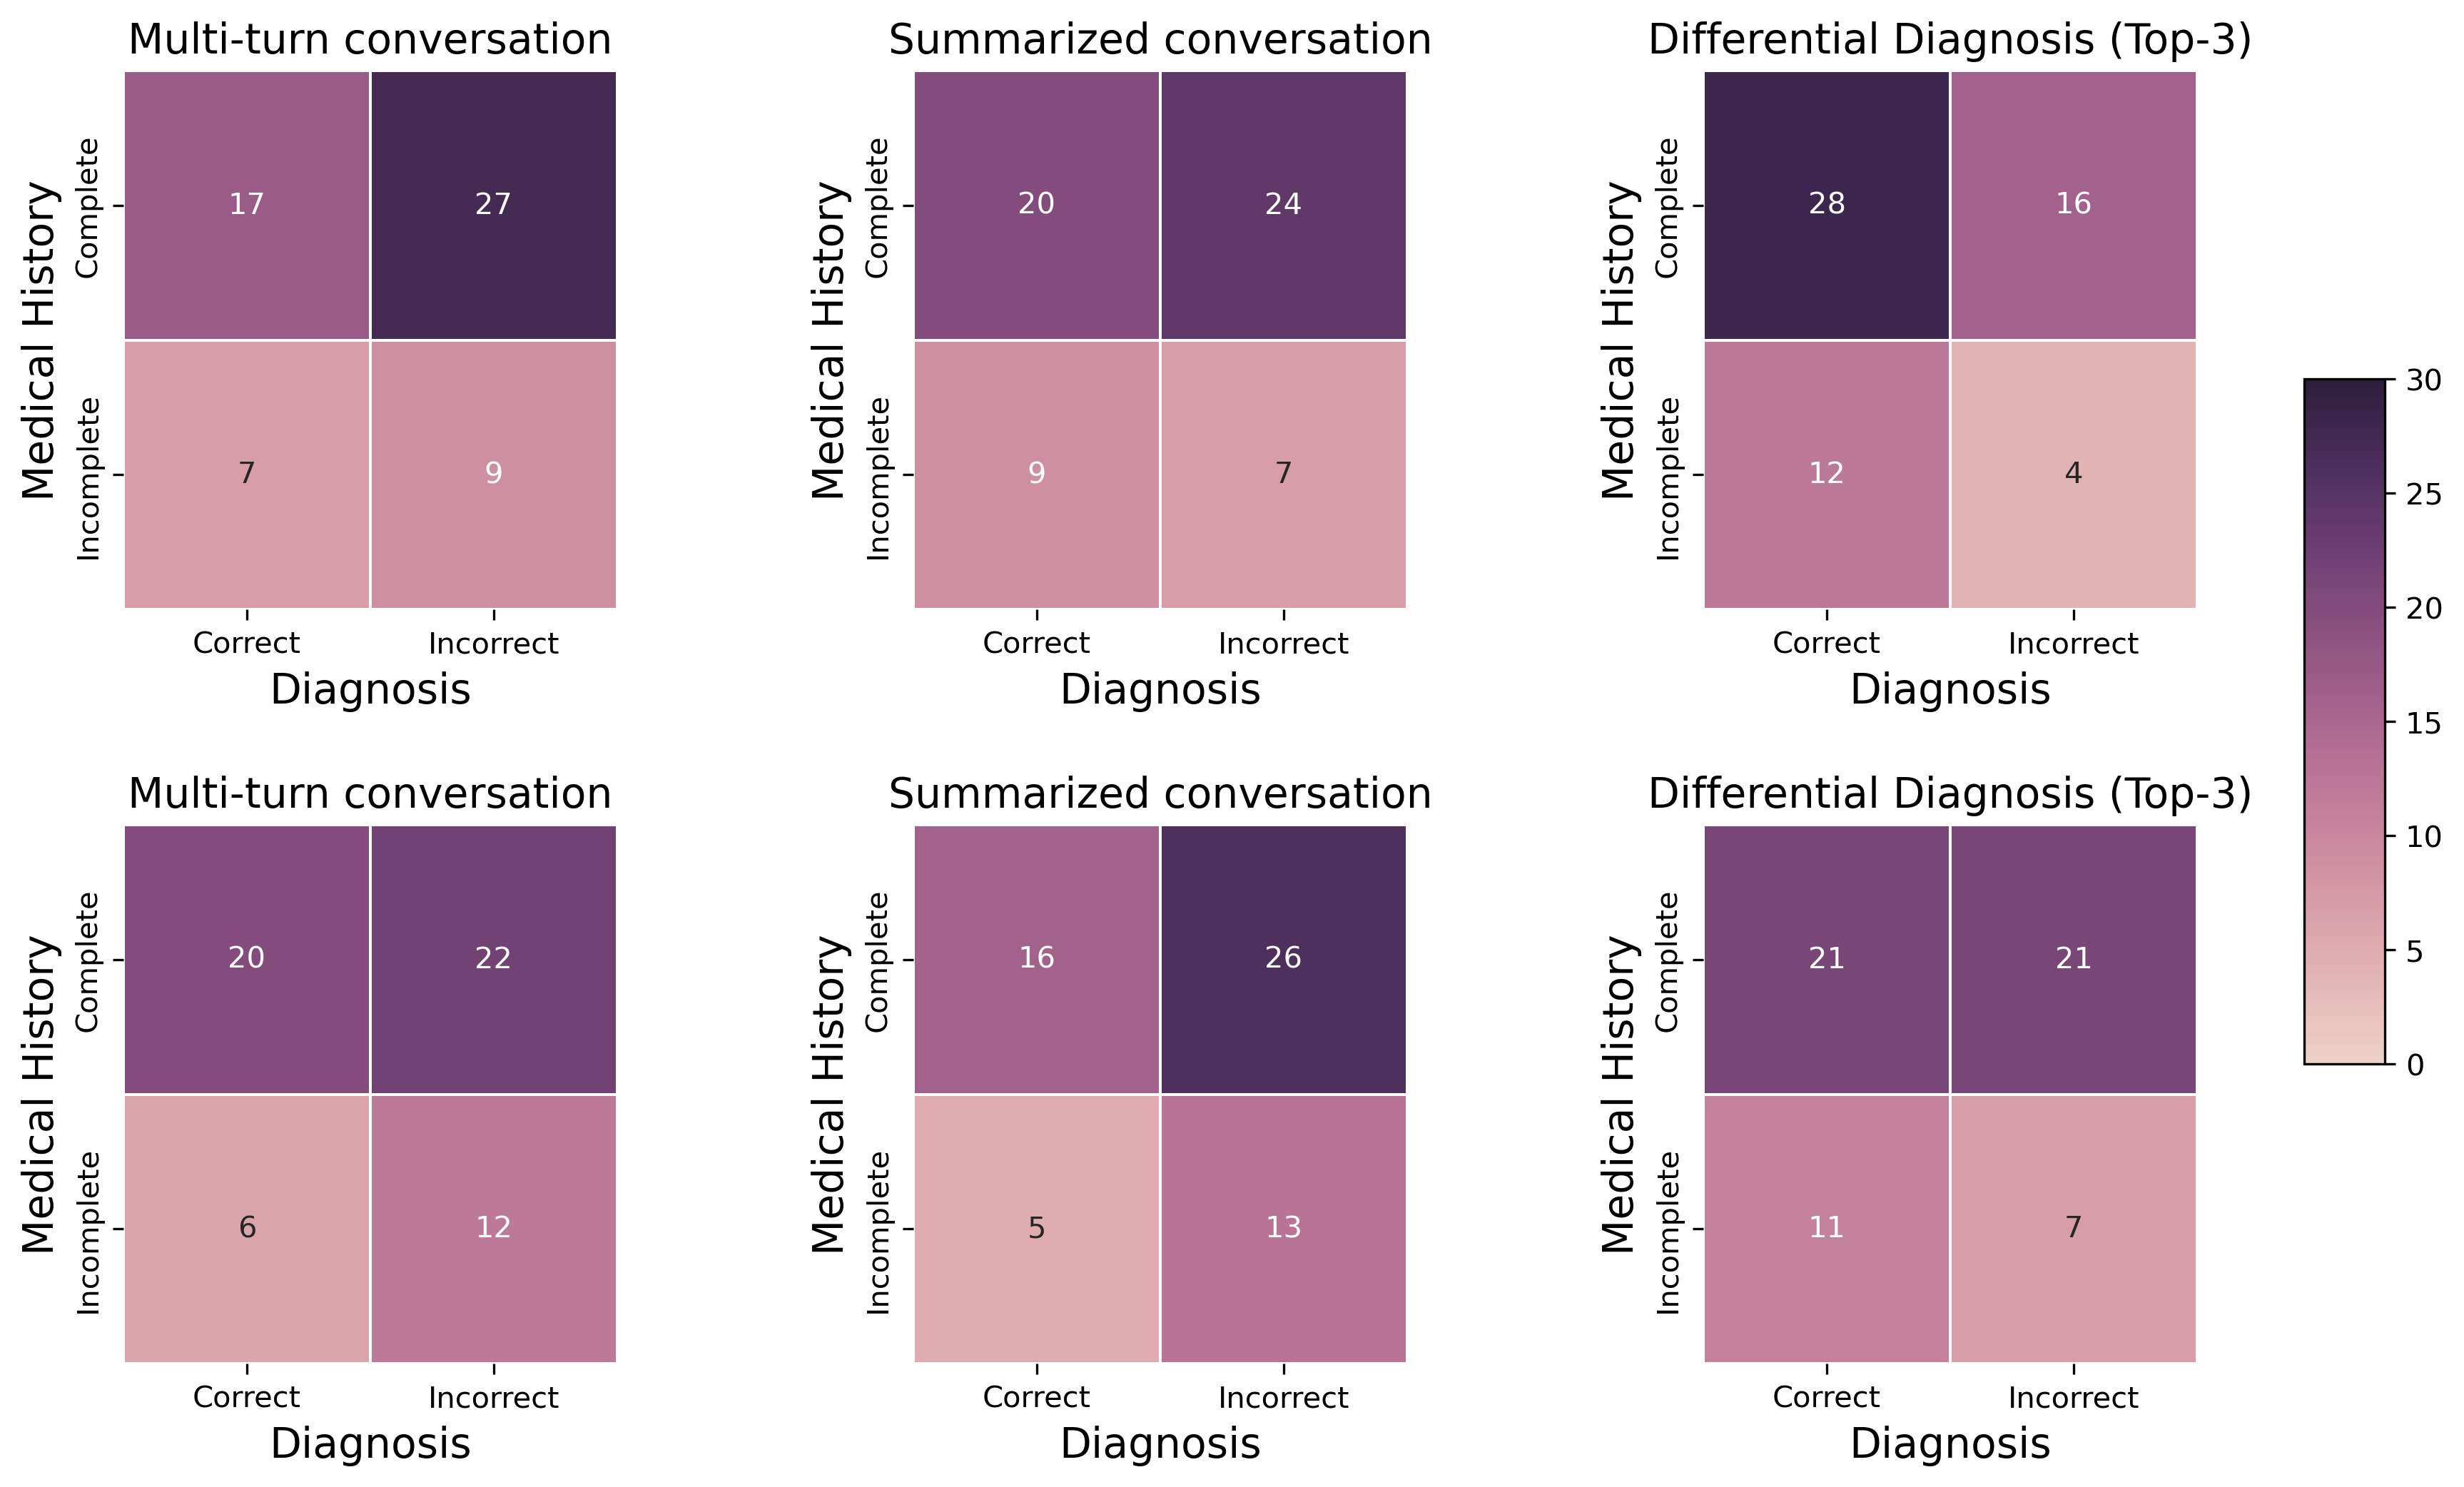

In [71]:
fig, axs = plt.subplots(2,3,figsize=(12.5,8), dpi=300)

exp = ["Multi-turn conversation", "Summarized conversation", "Differential Diagnosis (Top-3)"]
gpt = ["GPT-4", "GPT-3.5"]
cfs = [cfmat1, cfmat3, cfmat5, cfmat2, cfmat4, cfmat6]
cbar_ax = fig.add_axes([0.94, .3, .03, .4])

count=0
for cf in cfs:
    sns.heatmap(cf, annot=True, linewidth=.5, 
                cmap=sns.cubehelix_palette(as_cmap=True), vmax=30, vmin=0, ax=axs[int(count/3)][int(count%3)],
                cbar=False)
#     axs[count%2][int(count/2)].set_title(f"{exp[int(count/2)]} ({gpt[count%2]})", size=14)
    axs[int(count/3)][int(count%3)].set_title(f"{exp[int(count%3)]}", size=14)
    axs[int(count/3)][int(count%3)].set_xticklabels(["Correct", "Incorrect"])
    axs[int(count/3)][int(count%3)].set_xlabel("Diagnosis", size=14)
    axs[int(count/3)][int(count%3)].set_yticklabels(["Complete", "Incomplete"])
    axs[int(count/3)][int(count%3)].set_ylabel("Medical History", size=14)
    count+=1
    
norm = plt.Normalize(0, 30)
# Use cax parameter to superimpose the colorbar on the defined cbar_ax
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=sns.cubehelix_palette(as_cmap=True)), cax=cbar_ax)
# Set the label for the colorbar
# cbar.set_label('Frequency', size=14)

fig.subplots_adjust(wspace=0.6, hspace=0.4)

# Figure 4

### Single-answer evaluations

In [72]:
x1 = pd.concat([convo_noPE_mcq_public_gpt3_df.mean(), 
                convo_noPE_mcq_private_gpt3_df.mean()])
x2 = pd.concat([convo_noPE_mcqall_public_gpt3_df.mean(), 
                convo_noPE_mcqall_private_gpt3_df.mean()])
x3 = pd.concat([convo_noPE_frq_public_gpt3_df.mean(), 
                convo_noPE_frq_private_gpt3_df.mean()])

x4 = pd.concat([convo_noPE_mcq_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_noPE_mcq_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])
x5 = pd.concat([convo_noPE_mcqall_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_noPE_mcqall_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])
x6 = pd.concat([convo_noPE_frq_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_noPE_frq_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])


plot_df_convo_noPE = pd.DataFrame([x1, x2, x3, x4, x5, x6],
                                   index=["gpt3_multiturn_MCQ",
                                          "gpt3_multiturn_MCQall",
                                          "gpt3_multiturn_FRQ",
                                          "gpt4_multiturn_MCQ",
                                          "gpt4_multiturn_MCQall",
                                          "gpt4_multiturn_FRQ",
                                          ]).T

In [73]:
plot_df_convo_noPE_df = pd.DataFrame(plot_df_convo_noPE.stack()).reset_index()
plot_df_convo_noPE_df.columns = ["case_id", "experiment", "Accuracy"]
plot_df_convo_noPE_df["GPT_model"] = plot_df_convo_noPE_df.experiment.apply(lambda x: x.split("_")[0])
plot_df_convo_noPE_df["Experiment_name"] = plot_df_convo_noPE_df.experiment.apply(lambda x: "_".join(x.split("_")[1:]))
plot_df_convo_noPE_df.columns = ["case_id", "experiment", "Accuracy", "GPT_model", "Experiment_name"]

mapper1 = {"gpt3":"GPT-3.5", "gpt4":"GPT-4"}
mapper2 = {"multiturn_MCQ": "4-choice MCQ",
          "multiturn_MCQall": "Many-choice MCQ",
          "multiturn_FRQ": "FRQ"}

plot_df_convo_noPE_df["GPT_model"] = plot_df_convo_noPE_df.GPT_model.map(mapper1)
plot_df_convo_noPE_df["Experiment_name"] = plot_df_convo_noPE_df.Experiment_name.map(mapper2)
plot_df_convo_noPE_df

,case_id,experiment,Accuracy,GPT_model,Experiment_name
0,public_case01,gpt3_multiturn_MCQ,0.4,GPT-3.5,4-choice MCQ
1,public_case01,gpt3_multiturn_MCQall,0.0,GPT-3.5,Many-choice MCQ
2,public_case01,gpt3_multiturn_FRQ,0.0,GPT-3.5,FRQ
3,public_case01,gpt4_multiturn_MCQ,0.6,GPT-4,4-choice MCQ
4,public_case01,gpt4_multiturn_MCQall,0.2,GPT-4,Many-choice MCQ
...,...,...,...,...,...
835,private_case40,gpt3_multiturn_MCQall,0.1,GPT-3.5,Many-choice MCQ
836,private_case40,gpt3_multiturn_FRQ,0.3,GPT-3.5,FRQ
837,private_case40,gpt4_multiturn_MCQ,1.0,GPT-4,4-choice MCQ
838,private_case40,gpt4_multiturn_MCQall,1.0,GPT-4,Many-choice MCQ


/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/1255716404.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticklabels(),size=12);
/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/1255716404.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticklabels(),size=12);


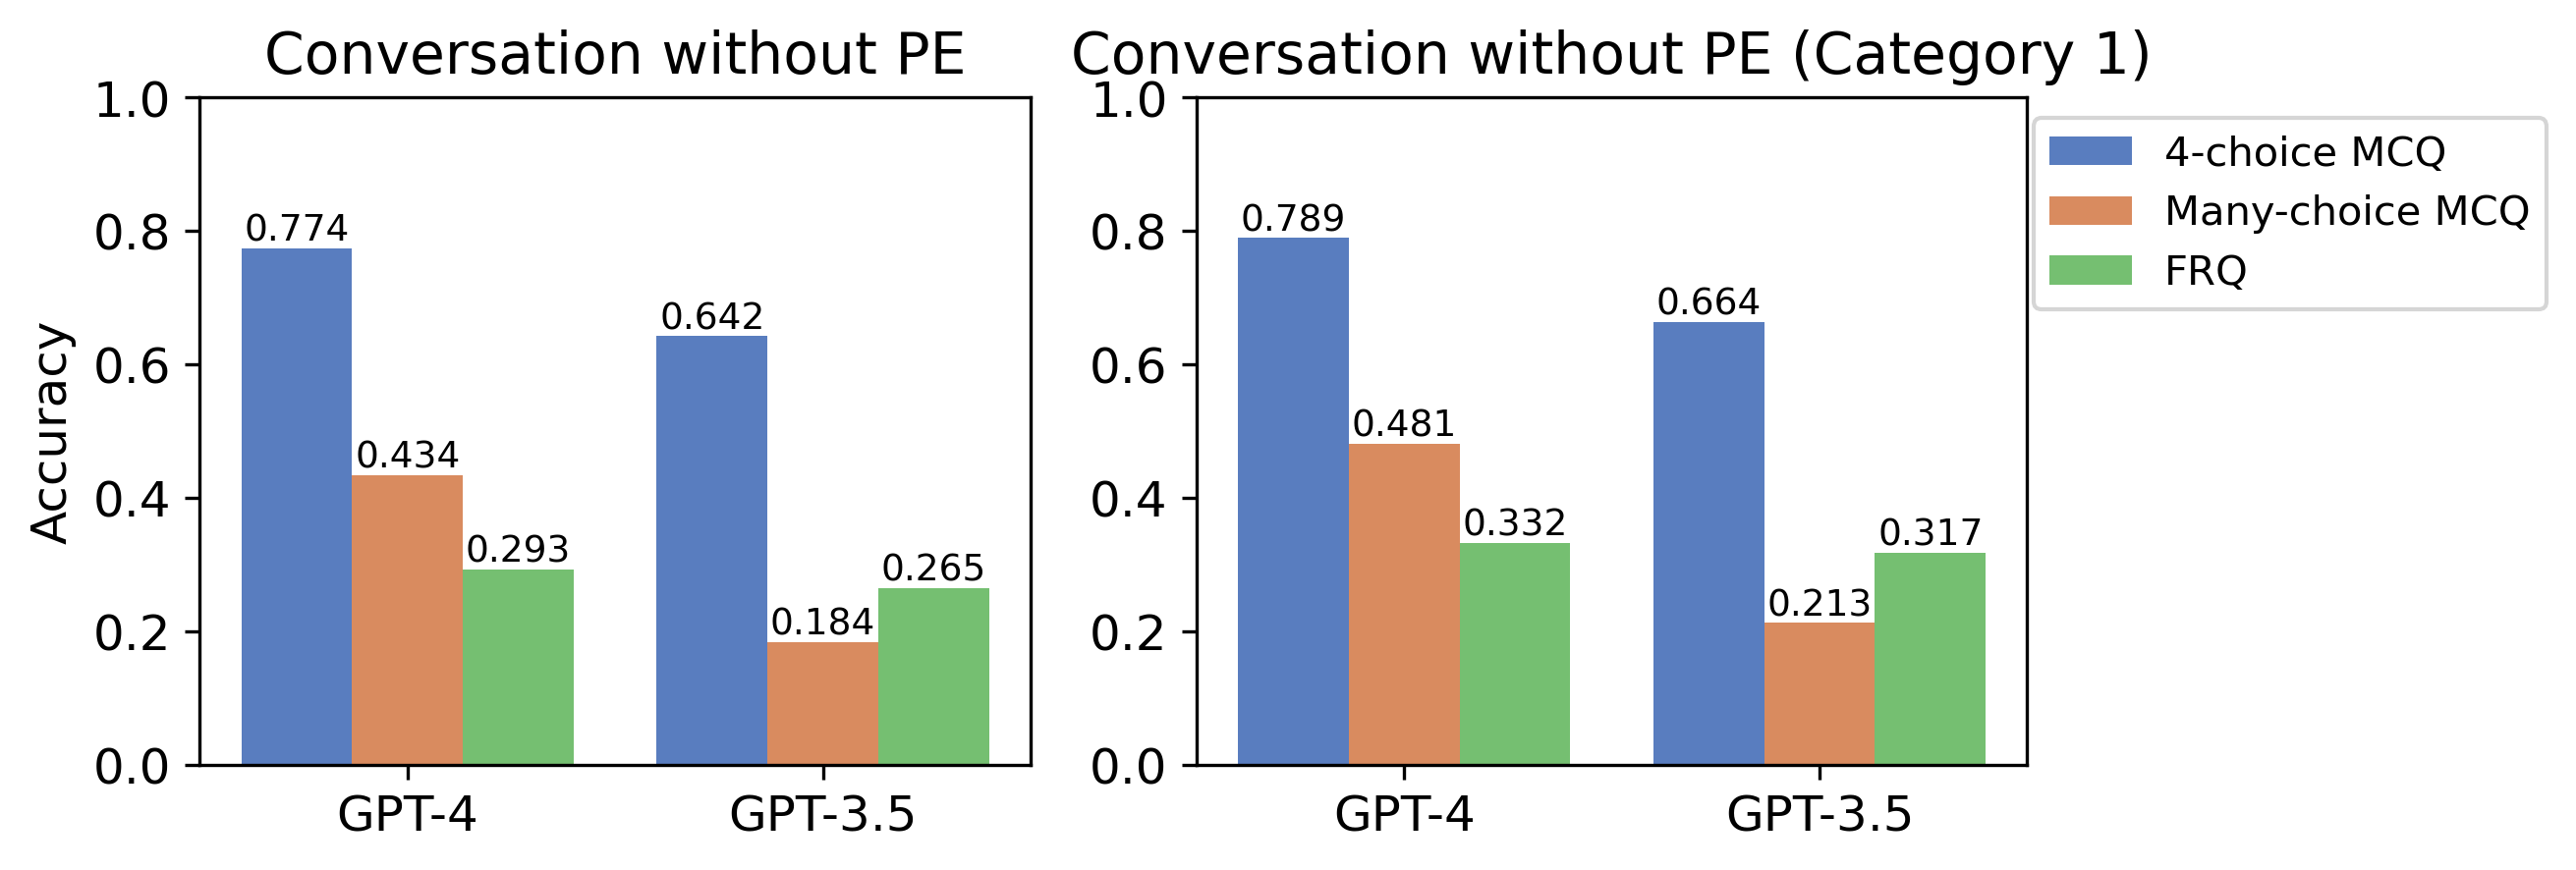

In [74]:
fig, axs = plt.subplots(1,2,figsize=(8,3), dpi=300)

exp_order = ["4-choice MCQ", "Many-choice MCQ", "FRQ"]
gpt_order = ["GPT-4", "GPT-3.5"]
sns.barplot(data = plot_df_convo_noPE_df, x="GPT_model", y = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette="muted", errorbar=None, ax=axs[0])
for i in range(len(exp_order)):
    axs[0].bar_label(axs[0].containers[i], fmt='%.3f', size=9)
axs[0].get_legend().remove()
axs[0].set_title("Conversation without PE", size=14)
axs[0].set_xlabel("")
axs[0].set_ylabel("Accuracy", size=12)
axs[0].set_ylim(0,1)
axs[0].set_xticklabels(axs[0].get_xticklabels(),size=12)
axs[0].set_yticklabels(axs[0].get_yticklabels(),size=12);

exp_order = ["4-choice MCQ", "Many-choice MCQ", "FRQ"]
gpt_order = ["GPT-4", "GPT-3.5"]
sns.barplot(data = plot_df_convo_noPE_df[plot_df_convo_noPE_df.case_id.isin(dmap1["category1"])],
            x="GPT_model", y = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette="muted", errorbar=None, ax=axs[1])
for i in range(len(exp_order)):
    axs[1].bar_label(axs[1].containers[i], fmt='%.3f', size=9)
axs[1].legend(bbox_to_anchor=(1.65,1))
axs[1].set_title("Conversation without PE (Category 1)", size=14)
axs[1].set_xlabel("")
axs[1].set_ylabel("")
axs[1].set_ylim(0,1)
axs[1].set_xticklabels(axs[1].get_xticklabels(),size=12)
axs[1].set_yticklabels(axs[1].get_yticklabels(),size=12);

### Multiple answer evaluations

In [75]:
x1 = pd.concat([convo_noPE_mcq_public_gpt3_df.mean(), 
                convo_noPE_mcq_private_gpt3_df.mean()])
x2 = pd.concat([convo_noPE_mcqall_public_gpt3_df_multiple.mean(), 
                convo_noPE_mcqall_private_gpt3_df_multiple.mean()])
x3 = pd.concat([convo_noPE_frq_public_gpt3_df_multiple.mean(), 
                convo_noPE_frq_private_gpt3_df_multiple.mean()])

x4 = pd.concat([convo_noPE_mcq_public_gpt4_df.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_noPE_mcq_private_gpt4_df.sum()/(count_full[public_dataset.shape[0]:])])
x5 = pd.concat([convo_noPE_mcqall_public_gpt4_df_multiple.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_noPE_mcqall_private_gpt4_df_multiple.sum()/(count_full[public_dataset.shape[0]:])])
x6 = pd.concat([convo_noPE_frq_public_gpt4_df_multiple.sum()/(count_full[:public_dataset.shape[0]]), 
                convo_noPE_frq_private_gpt4_df_multiple.sum()/(count_full[public_dataset.shape[0]:])])


plot_df_convo_noPE = pd.DataFrame([x1, x2, x3, x4, x5, x6],
                       index=["gpt3_multiturn_MCQ",
                              "gpt3_multiturn_MCQall",
                              "gpt3_multiturn_FRQ",
                              "gpt4_multiturn_MCQ",
                              "gpt4_multiturn_MCQall",
                              "gpt4_multiturn_FRQ",
                              ]).T

In [76]:
plot_df_convo_noPE_df = pd.DataFrame(plot_df_convo_noPE.stack()).reset_index()
plot_df_convo_noPE_df.columns = ["case_id", "experiment", "Accuracy"]
plot_df_convo_noPE_df["GPT_model"] = plot_df_convo_noPE_df.experiment.apply(lambda x: x.split("_")[0])
plot_df_convo_noPE_df["Experiment_name"] = plot_df_convo_noPE_df.experiment.apply(lambda x: "_".join(x.split("_")[1:]))
plot_df_convo_noPE_df.columns = ["case_id", "experiment", "Accuracy", "GPT_model", "Experiment_name"]

mapper1 = {"gpt3":"GPT-3.5", "gpt4":"GPT-4"}
mapper2 = {"multiturn_MCQ": "4-choice MCQ",
          "multiturn_MCQall": "Many-choice MCQ",
          "multiturn_FRQ": "FRQ"}

plot_df_convo_noPE_df["GPT_model"] = plot_df_convo_noPE_df.GPT_model.map(mapper1)
plot_df_convo_noPE_df["Experiment_name"] = plot_df_convo_noPE_df.Experiment_name.map(mapper2)
plot_df_convo_noPE_df

,case_id,experiment,Accuracy,GPT_model,Experiment_name
0,public_case01,gpt3_multiturn_MCQ,0.4,GPT-3.5,4-choice MCQ
1,public_case01,gpt3_multiturn_MCQall,0.0,GPT-3.5,Many-choice MCQ
2,public_case01,gpt3_multiturn_FRQ,0.0,GPT-3.5,FRQ
3,public_case01,gpt4_multiturn_MCQ,0.6,GPT-4,4-choice MCQ
4,public_case01,gpt4_multiturn_MCQall,0.2,GPT-4,Many-choice MCQ
...,...,...,...,...,...
835,private_case40,gpt3_multiturn_MCQall,0.1,GPT-3.5,Many-choice MCQ
836,private_case40,gpt3_multiturn_FRQ,0.3,GPT-3.5,FRQ
837,private_case40,gpt4_multiturn_MCQ,1.0,GPT-4,4-choice MCQ
838,private_case40,gpt4_multiturn_MCQall,1.0,GPT-4,Many-choice MCQ


/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/1255716404.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticklabels(),size=12);
/var/folders/wb/ngnmrvpx1tsgkx3x8tmgtlkr0000gq/T/ipykernel_39950/1255716404.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticklabels(),size=12);


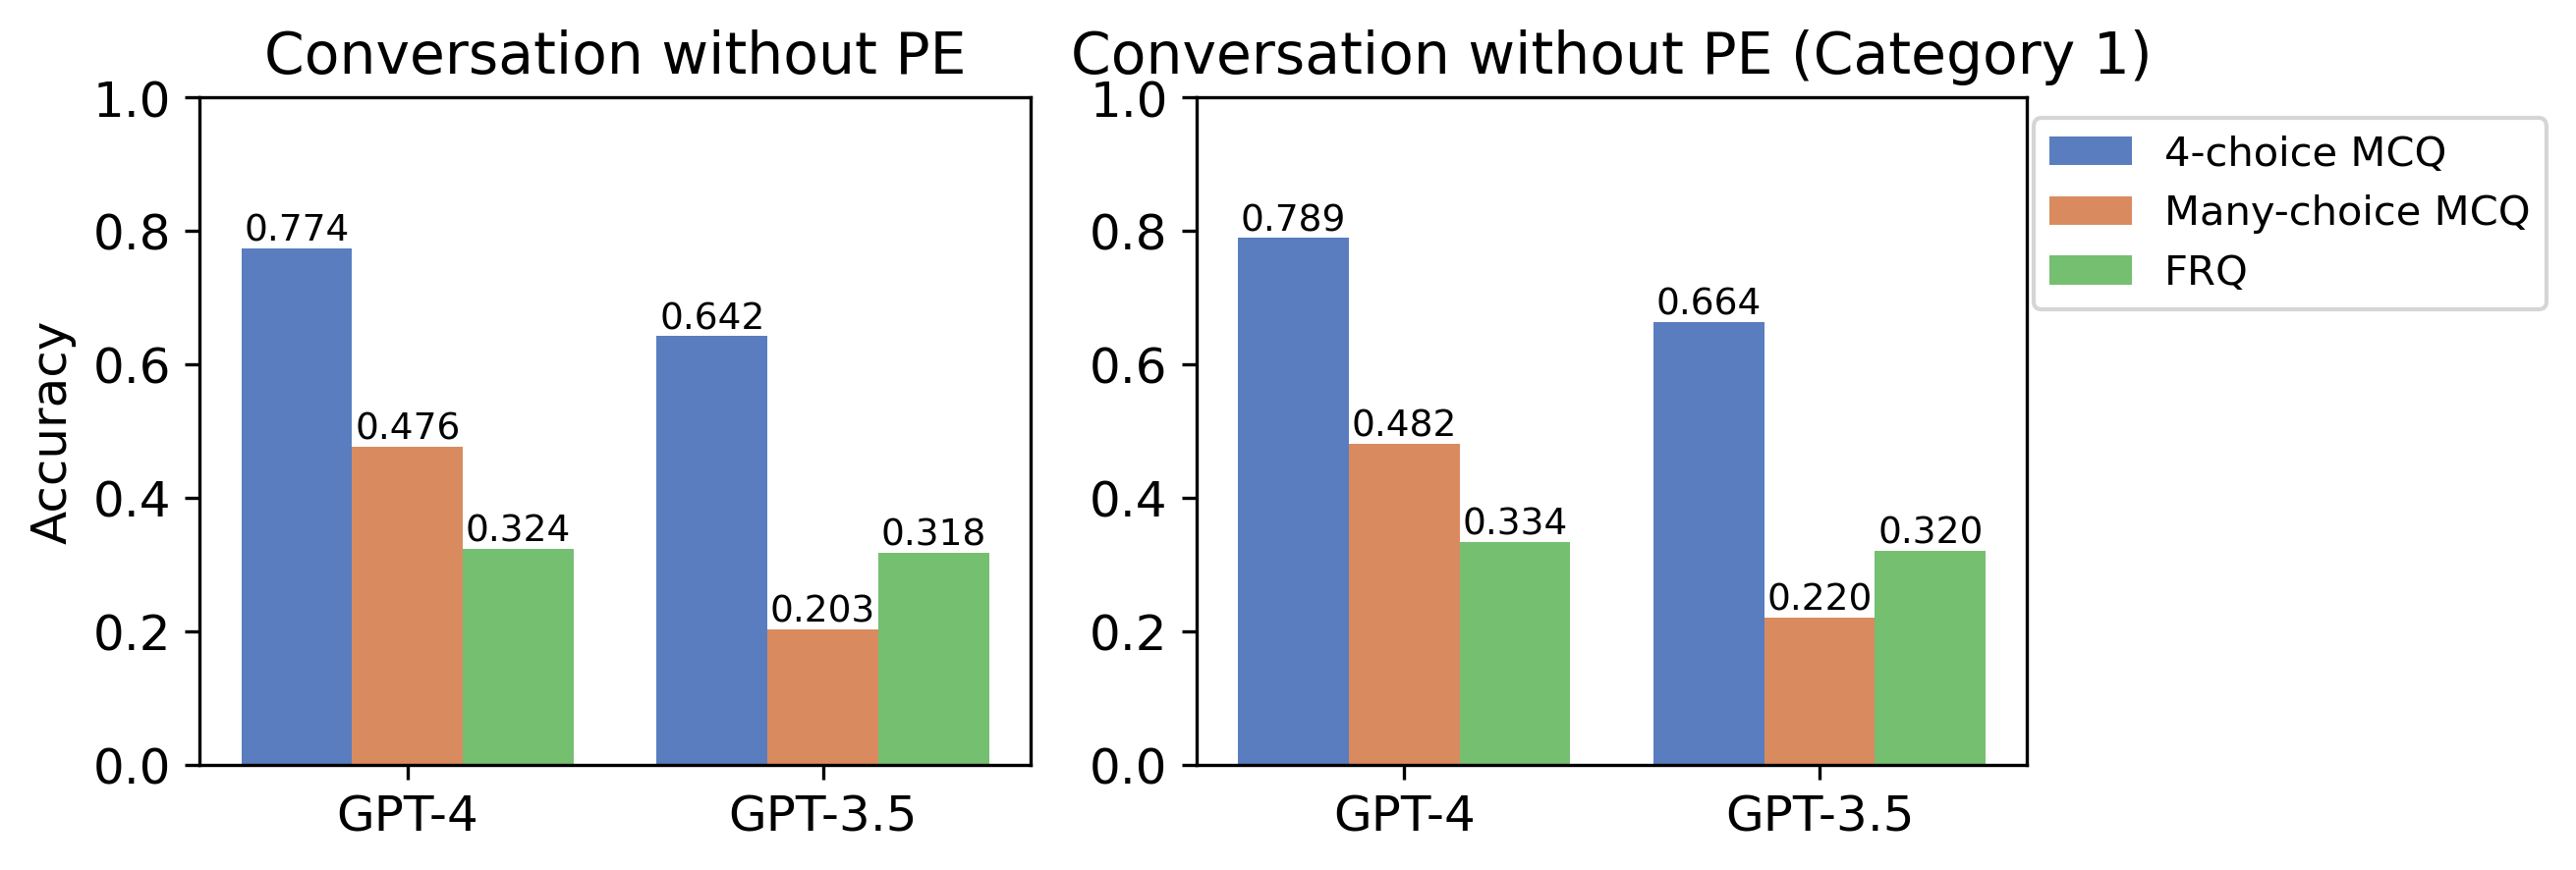

In [77]:
fig, axs = plt.subplots(1,2,figsize=(8,3), dpi=300)

exp_order = ["4-choice MCQ", "Many-choice MCQ", "FRQ"]
gpt_order = ["GPT-4", "GPT-3.5"]
sns.barplot(data = plot_df_convo_noPE_df, x="GPT_model", y = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette="muted", errorbar=None, ax=axs[0])
for i in range(len(exp_order)):
    axs[0].bar_label(axs[0].containers[i], fmt='%.3f', size=9)
axs[0].get_legend().remove()
axs[0].set_title("Conversation without PE", size=14)
axs[0].set_xlabel("")
axs[0].set_ylabel("Accuracy", size=12)
axs[0].set_ylim(0,1)
axs[0].set_xticklabels(axs[0].get_xticklabels(),size=12)
axs[0].set_yticklabels(axs[0].get_yticklabels(),size=12);

exp_order = ["4-choice MCQ", "Many-choice MCQ", "FRQ"]
gpt_order = ["GPT-4", "GPT-3.5"]
sns.barplot(data = plot_df_convo_noPE_df[plot_df_convo_noPE_df.case_id.isin(dmap1["category1"])],
            x="GPT_model", y = "Accuracy", order=gpt_order,
            hue = "Experiment_name", hue_order=exp_order, palette="muted", errorbar=None, ax=axs[1])
for i in range(len(exp_order)):
    axs[1].bar_label(axs[1].containers[i], fmt='%.3f', size=9)
axs[1].legend(bbox_to_anchor=(1.65,1))
axs[1].set_title("Conversation without PE (Category 1)", size=14)
axs[1].set_xlabel("")
axs[1].set_ylabel("")
axs[1].set_ylim(0,1)
axs[1].set_xticklabels(axs[1].get_xticklabels(),size=12)
axs[1].set_yticklabels(axs[1].get_yticklabels(),size=12);

In [78]:
plot_convos_compare1 = plot_df_convo_df.copy()
plot_convos_compare1["PE"] = "Present"
plot_convos_compare2 = plot_df_convo_noPE_df.copy()
plot_convos_compare2["PE"] = "Absent"

plot_convos_compare = pd.concat([plot_convos_compare1, plot_convos_compare2])

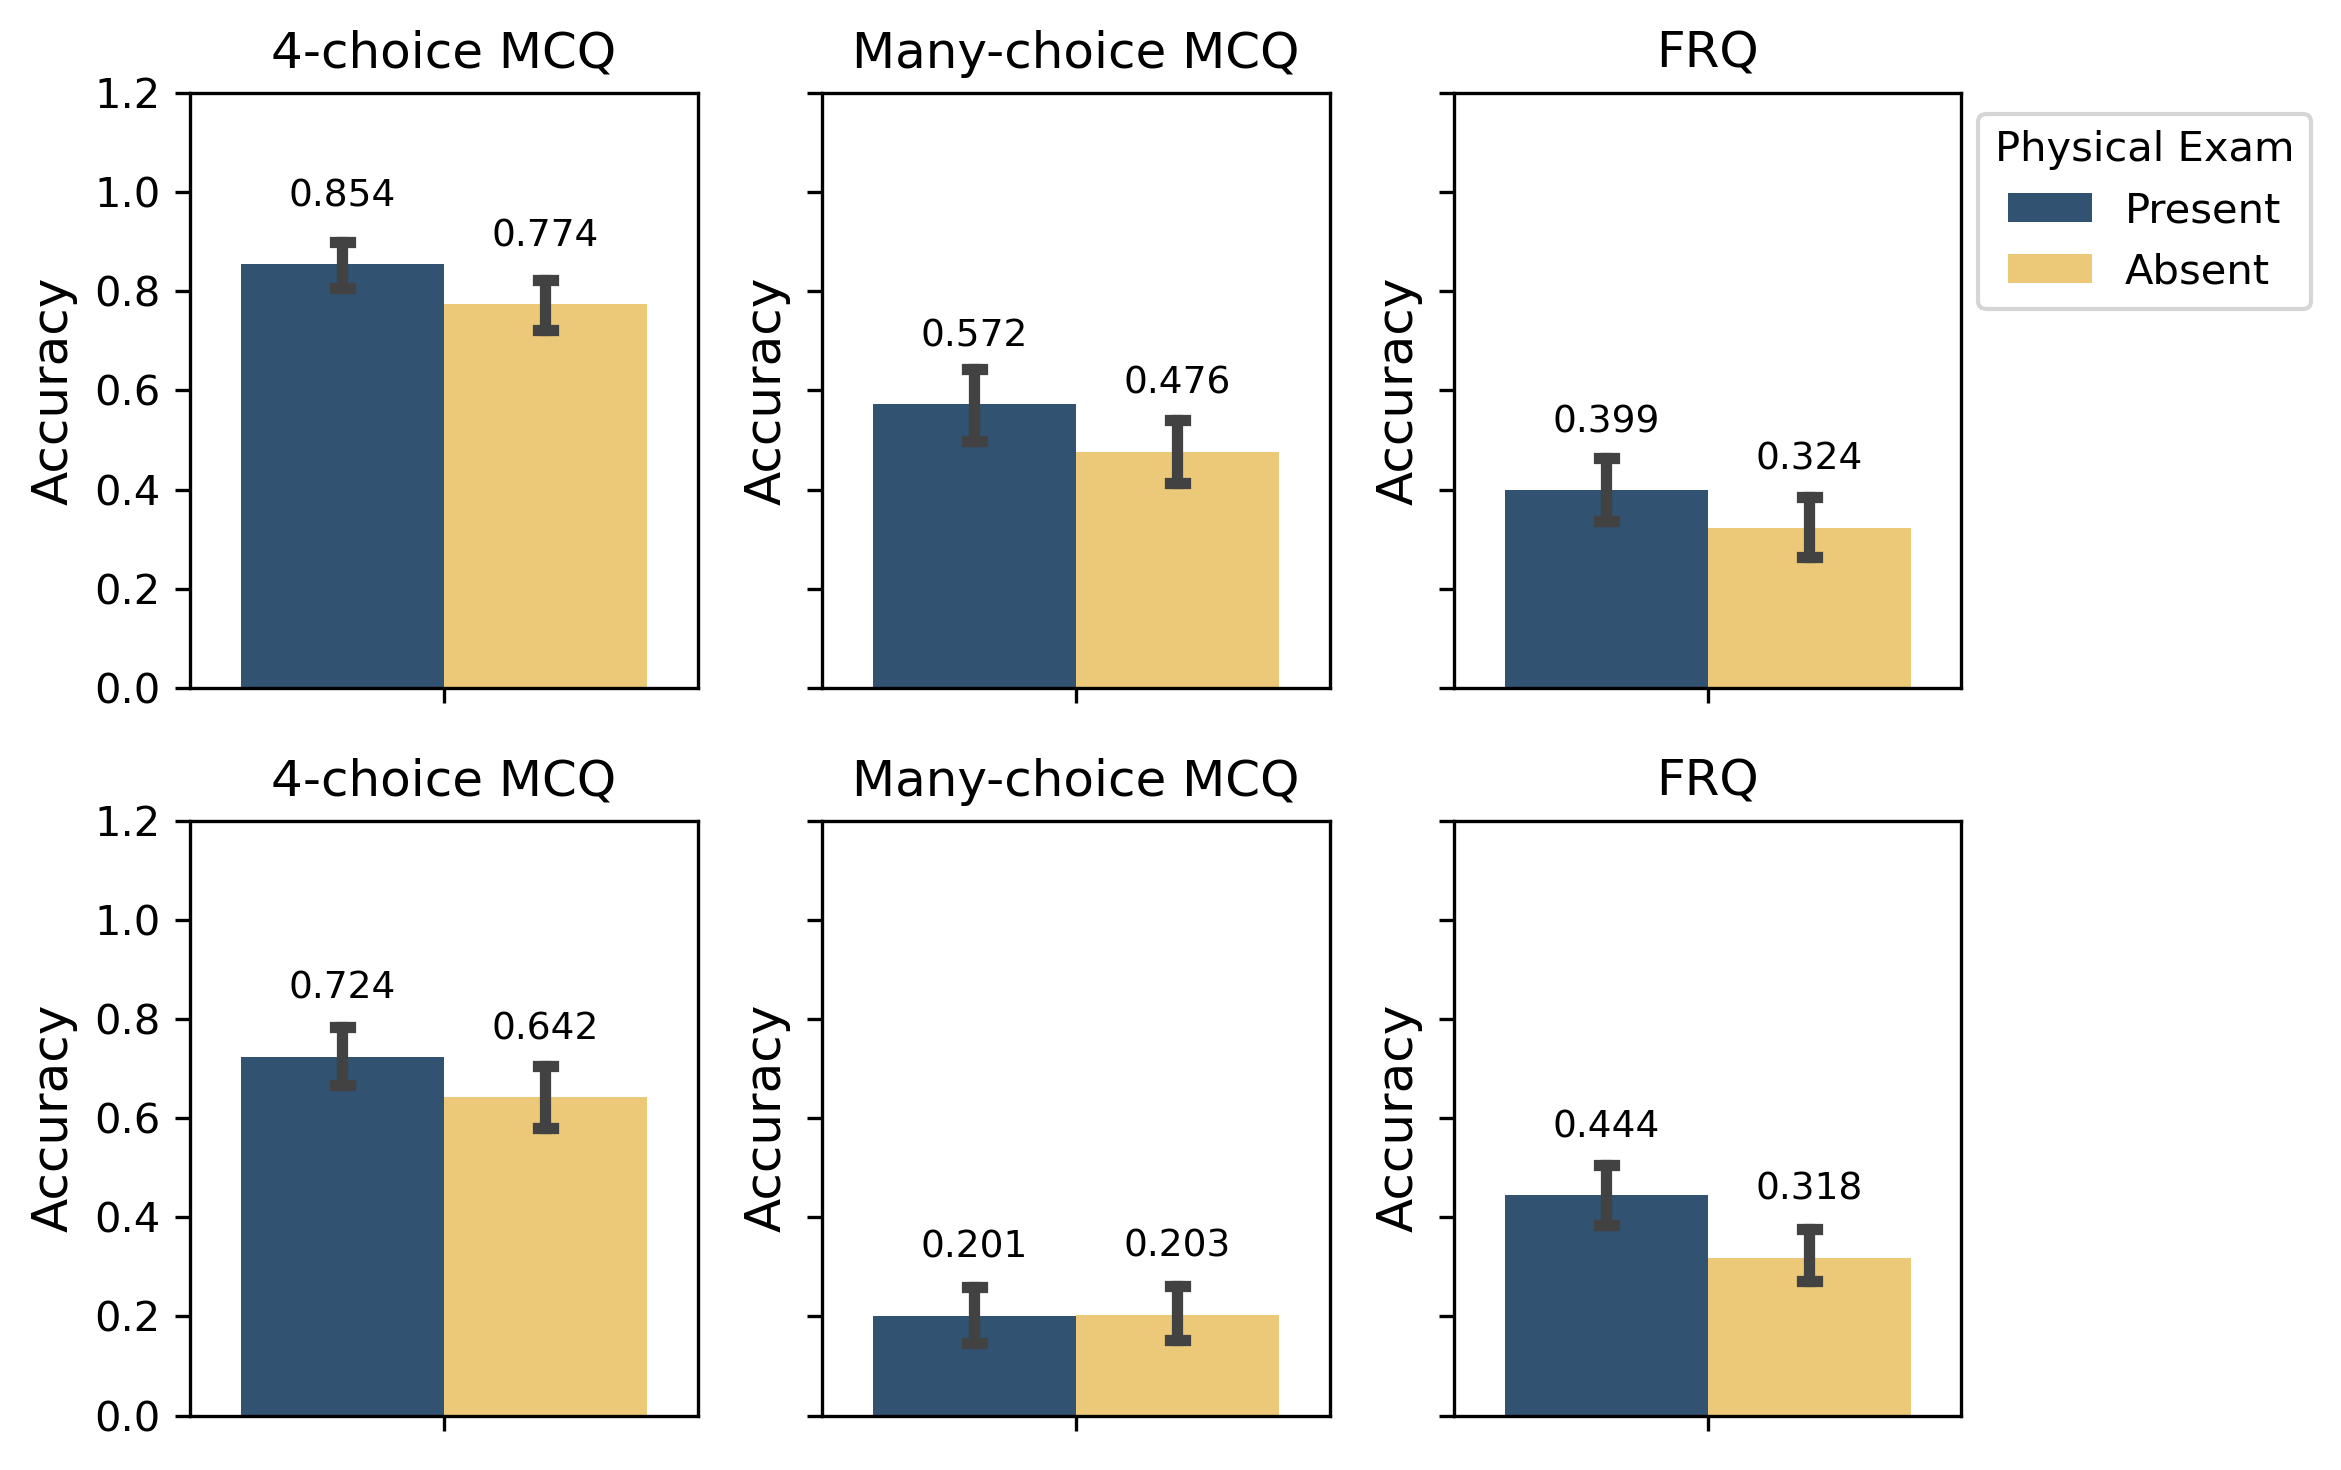

In [79]:
fig, axs = plt.subplots(2,3,figsize=(8,5), dpi=300, sharey=True)

colors = ["#26547c", "#ffd166"]

exp_order = ["4-choice MCQ", "Many-choice MCQ", "FRQ"]
gpt_order = ["GPT-4", "GPT-3.5"]
pe_order = ["Present", "Absent"]

for ig in range(len(gpt_order)):
    for ie in range(len(exp_order)):
        sns.barplot(data = plot_convos_compare[((plot_convos_compare.GPT_model==gpt_order[ig]) & (plot_convos_compare.Experiment_name==exp_order[ie]))], 
                    x="Experiment_name", y = "Accuracy", palette=colors, errorbar='ci', 
                    hue="PE", hue_order=pe_order,
                    capsize=0.03, orient="v", ax=axs[ig][ie])
        for i in range(len(pe_order)):
            axs[ig][ie].bar_label(axs[ig][ie].containers[i], fmt='%.3f', size=9, padding=12)
        axs[ig][ie].set_title(exp_order[ie], size=12)
        axs[ig][ie].set_xlabel("")
        axs[ig][ie].set_ylabel("Accuracy", size=12)
        axs[ig][ie].set_ylim(0,1.2)
        axs[ig][ie].set_xticklabels([])
        if ig==0 and ie==2:
            axs[ig][ie].legend(bbox_to_anchor=(1.73,1), title="Physical Exam")
            
        else:
            axs[ig][ie].get_legend().remove()
fig.tight_layout()

In [80]:
set(plot_convos_compare.experiment)

{'gpt3_multiturn_FRQ',
 'gpt3_multiturn_MCQ',
 'gpt3_multiturn_MCQall',
 'gpt3_multiturn_PE_FRQ',
 'gpt3_multiturn_PE_MCQ',
 'gpt3_multiturn_PE_MCQall',
 'gpt4_multiturn_FRQ',
 'gpt4_multiturn_MCQ',
 'gpt4_multiturn_MCQall',
 'gpt4_multiturn_PE_FRQ',
 'gpt4_multiturn_PE_MCQ',
 'gpt4_multiturn_PE_MCQall'}

In [81]:
tests1= [("gpt4_multiturn_PE_MCQ", "gpt4_multiturn_MCQ"),
        ("gpt4_multiturn_PE_MCQall", "gpt4_multiturn_MCQall"),
        ("gpt4_multiturn_PE_FRQ", "gpt4_multiturn_FRQ")]
tests2= [("gpt3_multiturn_PE_MCQ", "gpt3_multiturn_MCQ"),
        ("gpt3_multiturn_PE_MCQall", "gpt3_multiturn_MCQall"),
        ("gpt3_multiturn_PE_FRQ", "gpt3_multiturn_FRQ")]

In [82]:
# GPT-4
res1 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"multiturn_PE_MCQ": "4-choice MCQ",
          "multiturn_PE_MCQall": "many-choice MCQ",
          "multiturn_PE_FRQ": "FRQ",
          "multiturn_MCQ": "4-choice MCQ (without PE)",
          "multiturn_MCQall": "many-choice MCQ (without PE)",
          "multiturn_FRQ": "FRQ (without PE)"}
count=0
for t in tests1:
    pval = bootstrap_pvalue(plot_convos_compare.loc[plot_convos_compare.experiment==t[0], "Accuracy"].values, 
                     plot_convos_compare.loc[plot_convos_compare.experiment==t[1], "Accuracy"].values)
    gpt_model = t[0].split("_")[0].upper()
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res1.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res1["corrected_pvalue"] = multipletests(res1["pvalue"],alpha=0.05, method='holm')[1]

# GPT-3.5
res2 = pd.DataFrame(columns = ["Experiment1", "Experiment2", "GPT_model", "pvalue"])

mapper2 = {"multiturn_PE_MCQ": "4-choice MCQ",
          "multiturn_PE_MCQall": "many-choice MCQ",
          "multiturn_PE_FRQ": "FRQ",
          "multiturn_MCQ": "4-choice MCQ (without PE)",
          "multiturn_MCQall": "many-choice MCQ (without PE)",
          "multiturn_FRQ": "FRQ (without PE)"}
count=0
for t in tests2:
    pval = bootstrap_pvalue(plot_convos_compare.loc[plot_convos_compare.experiment==t[0], "Accuracy"].values, 
                     plot_convos_compare.loc[plot_convos_compare.experiment==t[1], "Accuracy"].values)
    gpt_model = "GPT-3.5"
    exp1 = mapper2[t[0][5:]]
    exp2 = mapper2[t[1][5:]]
    res2.loc[count,:] = [exp1, exp2, gpt_model, pval]
    count+=1
res2["corrected_pvalue"] = multipletests(res2["pvalue"],alpha=0.05, method='holm')[1]

res = pd.concat([res1,res2])
res.to_csv("./results/statistics/fig4c_stats.tsv", sep="\t")